In [1]:
import pandas as pd
import numpy as np

import sys
import re
import os
project_path = os.getcwd()

# 建模

## 读入数据

In [217]:
df_model =pd.read_excel(project_path +'/data/2_auc_df_model_data_forward.xlsx')
if 'Unnamed: 0' in df_model.columns:
    df_model = df_model.drop(['Unnamed: 0'], axis=1)

In [218]:
df_model.shape

(164, 8)

In [219]:
# 查看共线性
df_model.corr()

,日剂量,test_result,大型血小板比值,血小板分布宽度,血红蛋白测定,抗精神病药,红细胞比积测定,间接胆红素
日剂量,1.000000,-0.462038,0.198163,0.281110,-0.075433,-0.165737,-0.056175,-0.126263
test_result,-0.462038,1.000000,-0.113223,-0.185932,-0.178374,0.099215,-0.193047,-0.048108
大型血小板比值,0.198163,-0.113223,1.000000,0.242416,0.135869,-0.072207,0.144618,0.111321
血小板分布宽度,0.281110,-0.185932,0.242416,1.000000,0.209518,-0.222885,0.275838,0.012506
血红蛋白测定,-0.075433,-0.178374,0.135869,0.209518,1.000000,0.159145,0.973677,0.319872
抗精神病药,-0.165737,0.099215,-0.072207,-0.222885,0.159145,1.000000,0.116246,0.034080
红细胞比积测定,-0.056175,-0.193047,0.144618,0.275838,0.973677,0.116246,1.000000,0.286833
间接胆红素,-0.126263,-0.048108,0.111321,0.012506,0.319872,0.034080,0.286833,1.000000


In [220]:
df_model.corr()[df_model.corr()>0.5]

,日剂量,test_result,大型血小板比值,血小板分布宽度,血红蛋白测定,抗精神病药,红细胞比积测定,间接胆红素
日剂量,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
test_result,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
大型血小板比值,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
血小板分布宽度,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
血红蛋白测定,NaN,NaN,NaN,NaN,1.000000,NaN,0.973677,NaN
抗精神病药,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
红细胞比积测定,NaN,NaN,NaN,NaN,0.973677,NaN,1.000000,NaN
间接胆红素,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [221]:
# # 抽取分类数据
# # 把少数样本
# df_model['日剂量']=df_model['日剂量'].apply(lambda x: 1 if round(float(x),1)==0.5 else
#                                                     0 if round(float(x),1)==1 else 2)

In [222]:
df_model.head()

,日剂量,test_result,大型血小板比值,血小板分布宽度,血红蛋白测定,抗精神病药,红细胞比积测定,间接胆红素
0,0,97.3,NaN,NaN,NaN,1,NaN,NaN
1,0,78.2,26.1,15.7,132.0,0,0.404,7.8
2,0,37.4,23.9,15.8,138.0,0,0.420,7.5
3,1,69.2,15.0,15.5,121.0,0,0.370,3.5
4,0,85.1,44.8,17.8,156.0,0,0.490,3.5


In [223]:
df_model['日剂量'].value_counts()

0    135
1     29
Name: 日剂量, dtype: int64

In [224]:
# 提取分类数据
df_model['日剂量']=df_model['日剂量'].astype('str')
df_model=df_model[df_model['日剂量'].str.contains('0|1')]
df_model['日剂量']=df_model['日剂量'].astype('float')

In [225]:
df_model.shape

(164, 8)

In [226]:
df_model.head()

,日剂量,test_result,大型血小板比值,血小板分布宽度,血红蛋白测定,抗精神病药,红细胞比积测定,间接胆红素
0,0.0,97.3,NaN,NaN,NaN,1,NaN,NaN
1,0.0,78.2,26.1,15.7,132.0,0,0.404,7.8
2,0.0,37.4,23.9,15.8,138.0,0,0.420,7.5
3,1.0,69.2,15.0,15.5,121.0,0,0.370,3.5
4,0.0,85.1,44.8,17.8,156.0,0,0.490,3.5


In [227]:
discrete_col=['行为干预治疗','抗精神病药','抗焦虑药','gender']
continuous_col=[x for x in df_model.columns if x not in discrete_col]
continuous_col.remove('日剂量')

## 数据归一化

In [228]:
# 防止不同维特征数据差距过大，影响建模效果
for i in continuous_col:
    max_value = df_model[i].max()
    df_model[i]=df_model[i].apply(lambda x: round(x/max_value,3))

In [229]:
df_model.columns

Index(['日剂量', 'test_result', '大型血小板比值', '血小板分布宽度', '血红蛋白测定', '抗精神病药',
       '红细胞比积测定', '间接胆红素'],
      dtype='object')

## 插补数据

In [230]:
# 使用随机森林对缺失值进行插补
import pandas as pd
pd.set_option('mode.chained_assignment', None)
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
def missing_value_interpolation(df):
    df = df.reset_index(drop=True)
    # 提取存在缺失值的列名
    missing_list = []
    for i in df.columns:
        if df[i].isnull().sum() > 0:
            missing_list.append(i)
    missing_list_copy = missing_list.copy()
    # 用该列未缺失的值训练随机森林，然后用训练好的rf预测缺失值
    for i in range(len(missing_list)):
        name=missing_list[0]
        df_missing = df[missing_list_copy]
        # 将其他列的缺失值用0表示。
        missing_list.remove(name)
        for j in missing_list:
            df_missing[j]=df_missing[j].astype('str').apply(lambda x: 0 if x=='nan' else x)
        df_missing_is = df_missing[df_missing[name].isnull()]
        df_missing_not = df_missing[df_missing[name].notnull()]
        y = df_missing_not[name]
        x = df_missing_not.drop([name],axis=1)

        rfr = RandomForestRegressor(n_estimators=300,
                                    random_state=3)
        rfr.fit(x, y)
        #预测缺失值
        predict = rfr.predict(df_missing_is.drop([name],axis=1))
        #填补缺失值
        df.loc[df[name].isnull(),name] = predict
    return df

In [233]:
# 插补建模数据
df_model_cb=missing_value_interpolation(df_model)
# df_model_cb=df_model

In [234]:
df_model_cb.shape

(164, 8)

In [235]:
# 保存插补数据
writer = pd.ExcelWriter(project_path + '/data/df_model_data_插补.xlsx')
df_model_cb.to_excel(writer)
writer.save()

## 划分数据集

### 计算随机数种子

In [236]:
from auto_ml.utils_models import load_ml_model
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score,average_precision_score,precision_recall_curve
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,accuracy_score

# 划分训练集和测试集，比例为8:2
x = df_model_cb.drop(['日剂量'],axis=1)
y = df_model_cb['日剂量']

seeds_list=[]
cat_f1_list=[]
for i in range(101):
    
    tran_x, test_x, tran_y, test_y = train_test_split(x, y, test_size=0.2, random_state=i)
    
    # 分类数据过采样
    from imblearn.over_sampling import SMOTE,ADASYN 
    sm = SMOTE(random_state=0)
    tran_x_sm,tran_y_sm = sm.fit_resample(tran_x,tran_y)
#     tran_x_sm,tran_y_sm = tran_x,tran_y
    
    import catboost,xgboost
    # CatBoost模型
    cat_model=catboost.CatBoostClassifier(iterations=300, 
                                          learning_rate=0.2, 
                                          depth=6,
                                          l2_leaf_reg=2,
                                          subsample=1,
                                          loss_function='CrossEntropy', # 'RMSE',  #
                                          random_state=3)
    # 分类模型
    cat_model.fit(tran_x_sm,tran_y_sm)
    cat_predictions=cat_model.predict(test_x)
    cat_f1=f1_score(test_y,cat_predictions)
    # 防止分类数据的测试集划分不平衡
    if not (6 >=(test_y.value_counts().values[-2])/(test_y.value_counts().values[-1]) >=4):
        continue
#     # 回归模型
#     cat_model.fit(tran_x,tran_y)
#     cat_predictions=cat_model.predict(test_x)
#     cat_f1=r2_score(test_y,cat_predictions)
    
    seeds_list.append(i)
    cat_f1_list.append(cat_f1)

0:	learn: 0.4679470	total: 1.29ms	remaining: 387ms
1:	learn: 0.3317004	total: 2.64ms	remaining: 393ms
2:	learn: 0.2485802	total: 3.74ms	remaining: 370ms
3:	learn: 0.2072951	total: 4.69ms	remaining: 347ms
4:	learn: 0.1775537	total: 5.82ms	remaining: 344ms
5:	learn: 0.1521526	total: 6.77ms	remaining: 332ms
6:	learn: 0.1322070	total: 7.92ms	remaining: 331ms
7:	learn: 0.1220985	total: 8.96ms	remaining: 327ms
8:	learn: 0.1133283	total: 10ms	remaining: 324ms
9:	learn: 0.0971179	total: 11ms	remaining: 320ms
10:	learn: 0.0893652	total: 12.1ms	remaining: 318ms
11:	learn: 0.0720684	total: 13.4ms	remaining: 322ms
12:	learn: 0.0672889	total: 14.4ms	remaining: 317ms
13:	learn: 0.0608304	total: 15.3ms	remaining: 312ms
14:	learn: 0.0568077	total: 16.2ms	remaining: 307ms
15:	learn: 0.0500099	total: 17.1ms	remaining: 303ms
16:	learn: 0.0454701	total: 18.1ms	remaining: 302ms
17:	learn: 0.0444508	total: 18.8ms	remaining: 295ms
18:	learn: 0.0409999	total: 19.8ms	remaining: 293ms
19:	learn: 0.0387143	total

200:	learn: 0.0021480	total: 185ms	remaining: 90.9ms
201:	learn: 0.0021480	total: 185ms	remaining: 90ms
202:	learn: 0.0021480	total: 186ms	remaining: 89ms
203:	learn: 0.0021480	total: 187ms	remaining: 88ms
204:	learn: 0.0021480	total: 188ms	remaining: 87ms
205:	learn: 0.0021480	total: 188ms	remaining: 86ms
206:	learn: 0.0021480	total: 189ms	remaining: 85ms
207:	learn: 0.0021480	total: 190ms	remaining: 84ms
208:	learn: 0.0021480	total: 191ms	remaining: 83ms
209:	learn: 0.0021480	total: 192ms	remaining: 82.4ms
210:	learn: 0.0021480	total: 193ms	remaining: 81.4ms
211:	learn: 0.0021480	total: 194ms	remaining: 80.4ms
212:	learn: 0.0021480	total: 195ms	remaining: 79.4ms
213:	learn: 0.0021480	total: 195ms	remaining: 78.5ms
214:	learn: 0.0021480	total: 196ms	remaining: 77.6ms
215:	learn: 0.0021480	total: 197ms	remaining: 76.6ms
216:	learn: 0.0021480	total: 198ms	remaining: 75.6ms
217:	learn: 0.0021480	total: 199ms	remaining: 74.7ms
218:	learn: 0.0021480	total: 199ms	remaining: 73.8ms
219:	lear

102:	learn: 0.0125307	total: 100ms	remaining: 192ms
103:	learn: 0.0124552	total: 101ms	remaining: 191ms
104:	learn: 0.0124125	total: 102ms	remaining: 190ms
105:	learn: 0.0122772	total: 103ms	remaining: 189ms
106:	learn: 0.0121368	total: 104ms	remaining: 188ms
107:	learn: 0.0120207	total: 105ms	remaining: 186ms
108:	learn: 0.0119622	total: 106ms	remaining: 185ms
109:	learn: 0.0118480	total: 107ms	remaining: 184ms
110:	learn: 0.0117209	total: 107ms	remaining: 183ms
111:	learn: 0.0116224	total: 108ms	remaining: 182ms
112:	learn: 0.0113008	total: 109ms	remaining: 181ms
113:	learn: 0.0112623	total: 110ms	remaining: 179ms
114:	learn: 0.0111798	total: 111ms	remaining: 179ms
115:	learn: 0.0110917	total: 112ms	remaining: 177ms
116:	learn: 0.0110180	total: 113ms	remaining: 176ms
117:	learn: 0.0107464	total: 114ms	remaining: 175ms
118:	learn: 0.0106310	total: 115ms	remaining: 174ms
119:	learn: 0.0105524	total: 116ms	remaining: 173ms
120:	learn: 0.0104064	total: 116ms	remaining: 172ms
121:	learn: 

266:	learn: 0.0047216	total: 251ms	remaining: 31ms
267:	learn: 0.0047216	total: 252ms	remaining: 30.1ms
268:	learn: 0.0047216	total: 253ms	remaining: 29.1ms
269:	learn: 0.0047216	total: 253ms	remaining: 28.2ms
270:	learn: 0.0047216	total: 254ms	remaining: 27.2ms
271:	learn: 0.0047216	total: 255ms	remaining: 26.3ms
272:	learn: 0.0047216	total: 256ms	remaining: 25.3ms
273:	learn: 0.0047216	total: 257ms	remaining: 24.3ms
274:	learn: 0.0047216	total: 257ms	remaining: 23.4ms
275:	learn: 0.0047216	total: 258ms	remaining: 22.4ms
276:	learn: 0.0047216	total: 259ms	remaining: 21.5ms
277:	learn: 0.0047216	total: 260ms	remaining: 20.6ms
278:	learn: 0.0047216	total: 261ms	remaining: 19.6ms
279:	learn: 0.0047216	total: 262ms	remaining: 18.7ms
280:	learn: 0.0047216	total: 263ms	remaining: 17.8ms
281:	learn: 0.0047216	total: 264ms	remaining: 16.9ms
282:	learn: 0.0047216	total: 265ms	remaining: 15.9ms
283:	learn: 0.0047216	total: 266ms	remaining: 15ms
284:	learn: 0.0047216	total: 266ms	remaining: 14ms

158:	learn: 0.0081971	total: 148ms	remaining: 131ms
159:	learn: 0.0081971	total: 149ms	remaining: 130ms
160:	learn: 0.0081959	total: 150ms	remaining: 129ms
161:	learn: 0.0081953	total: 150ms	remaining: 128ms
162:	learn: 0.0081844	total: 151ms	remaining: 127ms
163:	learn: 0.0081845	total: 152ms	remaining: 126ms
164:	learn: 0.0081844	total: 153ms	remaining: 125ms
165:	learn: 0.0081821	total: 154ms	remaining: 124ms
166:	learn: 0.0080994	total: 155ms	remaining: 123ms
167:	learn: 0.0080589	total: 155ms	remaining: 122ms
168:	learn: 0.0079784	total: 156ms	remaining: 121ms
169:	learn: 0.0079784	total: 157ms	remaining: 120ms
170:	learn: 0.0079779	total: 159ms	remaining: 120ms
171:	learn: 0.0079776	total: 160ms	remaining: 119ms
172:	learn: 0.0079775	total: 161ms	remaining: 118ms
173:	learn: 0.0079771	total: 162ms	remaining: 117ms
174:	learn: 0.0079772	total: 162ms	remaining: 116ms
175:	learn: 0.0079772	total: 163ms	remaining: 115ms
176:	learn: 0.0079770	total: 164ms	remaining: 114ms
177:	learn: 

27:	learn: 0.0652686	total: 25.7ms	remaining: 250ms
28:	learn: 0.0637350	total: 26.7ms	remaining: 250ms
29:	learn: 0.0613164	total: 27.6ms	remaining: 249ms
30:	learn: 0.0605395	total: 28.5ms	remaining: 248ms
31:	learn: 0.0568254	total: 29.4ms	remaining: 246ms
32:	learn: 0.0540649	total: 30.3ms	remaining: 245ms
33:	learn: 0.0507389	total: 31.2ms	remaining: 244ms
34:	learn: 0.0497588	total: 32.2ms	remaining: 244ms
35:	learn: 0.0469914	total: 33.1ms	remaining: 242ms
36:	learn: 0.0453307	total: 34ms	remaining: 242ms
37:	learn: 0.0435974	total: 35.2ms	remaining: 243ms
38:	learn: 0.0423283	total: 36.1ms	remaining: 242ms
39:	learn: 0.0405938	total: 37ms	remaining: 241ms
40:	learn: 0.0400747	total: 37.9ms	remaining: 239ms
41:	learn: 0.0396923	total: 39.1ms	remaining: 240ms
42:	learn: 0.0374422	total: 40.1ms	remaining: 239ms
43:	learn: 0.0371445	total: 41ms	remaining: 238ms
44:	learn: 0.0362244	total: 41.9ms	remaining: 238ms
45:	learn: 0.0356068	total: 42.8ms	remaining: 237ms
46:	learn: 0.03424

185:	learn: 0.0079226	total: 176ms	remaining: 108ms
186:	learn: 0.0079226	total: 177ms	remaining: 107ms
187:	learn: 0.0079226	total: 177ms	remaining: 106ms
188:	learn: 0.0079226	total: 178ms	remaining: 105ms
189:	learn: 0.0079226	total: 179ms	remaining: 104ms
190:	learn: 0.0079226	total: 180ms	remaining: 103ms
191:	learn: 0.0079226	total: 181ms	remaining: 102ms
192:	learn: 0.0079226	total: 182ms	remaining: 101ms
193:	learn: 0.0079226	total: 182ms	remaining: 99.6ms
194:	learn: 0.0079226	total: 183ms	remaining: 98.6ms
195:	learn: 0.0079226	total: 184ms	remaining: 97.6ms
196:	learn: 0.0079226	total: 185ms	remaining: 96.6ms
197:	learn: 0.0079226	total: 185ms	remaining: 95.5ms
198:	learn: 0.0079226	total: 186ms	remaining: 94.5ms
199:	learn: 0.0079226	total: 187ms	remaining: 93.4ms
200:	learn: 0.0079226	total: 188ms	remaining: 92.6ms
201:	learn: 0.0079226	total: 189ms	remaining: 91.7ms
202:	learn: 0.0079226	total: 190ms	remaining: 90.6ms
203:	learn: 0.0079226	total: 190ms	remaining: 89.6ms
2

108:	learn: 0.0103511	total: 102ms	remaining: 179ms
109:	learn: 0.0102929	total: 104ms	remaining: 179ms
110:	learn: 0.0101079	total: 105ms	remaining: 178ms
111:	learn: 0.0100153	total: 106ms	remaining: 177ms
112:	learn: 0.0099308	total: 107ms	remaining: 176ms
113:	learn: 0.0098267	total: 107ms	remaining: 175ms
114:	learn: 0.0097120	total: 108ms	remaining: 174ms
115:	learn: 0.0095247	total: 109ms	remaining: 173ms
116:	learn: 0.0094663	total: 110ms	remaining: 172ms
117:	learn: 0.0093910	total: 111ms	remaining: 171ms
118:	learn: 0.0092914	total: 112ms	remaining: 170ms
119:	learn: 0.0092292	total: 113ms	remaining: 169ms
120:	learn: 0.0091544	total: 114ms	remaining: 168ms
121:	learn: 0.0091080	total: 115ms	remaining: 167ms
122:	learn: 0.0088973	total: 116ms	remaining: 166ms
123:	learn: 0.0087942	total: 117ms	remaining: 166ms
124:	learn: 0.0087227	total: 118ms	remaining: 165ms
125:	learn: 0.0086411	total: 119ms	remaining: 164ms
126:	learn: 0.0085554	total: 119ms	remaining: 163ms
127:	learn: 

280:	learn: 0.0058028	total: 252ms	remaining: 17ms
281:	learn: 0.0058028	total: 253ms	remaining: 16.1ms
282:	learn: 0.0058028	total: 254ms	remaining: 15.2ms
283:	learn: 0.0058028	total: 255ms	remaining: 14.4ms
284:	learn: 0.0058028	total: 256ms	remaining: 13.5ms
285:	learn: 0.0058028	total: 257ms	remaining: 12.6ms
286:	learn: 0.0058028	total: 258ms	remaining: 11.7ms
287:	learn: 0.0058028	total: 258ms	remaining: 10.8ms
288:	learn: 0.0058028	total: 259ms	remaining: 9.86ms
289:	learn: 0.0058028	total: 260ms	remaining: 8.96ms
290:	learn: 0.0058028	total: 261ms	remaining: 8.06ms
291:	learn: 0.0058028	total: 261ms	remaining: 7.16ms
292:	learn: 0.0058028	total: 262ms	remaining: 6.27ms
293:	learn: 0.0058028	total: 263ms	remaining: 5.37ms
294:	learn: 0.0058028	total: 264ms	remaining: 4.47ms
295:	learn: 0.0058028	total: 265ms	remaining: 3.58ms
296:	learn: 0.0058028	total: 266ms	remaining: 2.69ms
297:	learn: 0.0058028	total: 267ms	remaining: 1.79ms
298:	learn: 0.0058028	total: 268ms	remaining: 89

180:	learn: 0.0067860	total: 162ms	remaining: 107ms
181:	learn: 0.0067221	total: 163ms	remaining: 106ms
182:	learn: 0.0066433	total: 164ms	remaining: 105ms
183:	learn: 0.0066432	total: 165ms	remaining: 104ms
184:	learn: 0.0066425	total: 166ms	remaining: 103ms
185:	learn: 0.0066211	total: 167ms	remaining: 102ms
186:	learn: 0.0066210	total: 168ms	remaining: 101ms
187:	learn: 0.0066207	total: 168ms	remaining: 100ms
188:	learn: 0.0066207	total: 169ms	remaining: 99.4ms
189:	learn: 0.0066207	total: 170ms	remaining: 98.4ms
190:	learn: 0.0066206	total: 171ms	remaining: 97.4ms
191:	learn: 0.0066202	total: 172ms	remaining: 96.5ms
192:	learn: 0.0066202	total: 172ms	remaining: 95.5ms
193:	learn: 0.0066202	total: 173ms	remaining: 94.6ms
194:	learn: 0.0066202	total: 174ms	remaining: 93.6ms
195:	learn: 0.0066202	total: 175ms	remaining: 92.6ms
196:	learn: 0.0066202	total: 175ms	remaining: 91.7ms
197:	learn: 0.0066202	total: 176ms	remaining: 90.7ms
198:	learn: 0.0066202	total: 177ms	remaining: 89.8ms
1

55:	learn: 0.0253933	total: 51.6ms	remaining: 225ms
56:	learn: 0.0249352	total: 52.9ms	remaining: 225ms
57:	learn: 0.0245504	total: 53.8ms	remaining: 224ms
58:	learn: 0.0238081	total: 54.8ms	remaining: 224ms
59:	learn: 0.0233669	total: 55.7ms	remaining: 223ms
60:	learn: 0.0227710	total: 56.6ms	remaining: 222ms
61:	learn: 0.0220518	total: 57.5ms	remaining: 221ms
62:	learn: 0.0211393	total: 58.4ms	remaining: 220ms
63:	learn: 0.0207802	total: 59.3ms	remaining: 219ms
64:	learn: 0.0206206	total: 60.2ms	remaining: 218ms
65:	learn: 0.0200827	total: 61ms	remaining: 216ms
66:	learn: 0.0197927	total: 61.9ms	remaining: 215ms
67:	learn: 0.0191707	total: 62.8ms	remaining: 214ms
68:	learn: 0.0188473	total: 63.7ms	remaining: 213ms
69:	learn: 0.0186931	total: 64.6ms	remaining: 212ms
70:	learn: 0.0185319	total: 65.4ms	remaining: 211ms
71:	learn: 0.0181863	total: 66.5ms	remaining: 210ms
72:	learn: 0.0177030	total: 67.7ms	remaining: 211ms
73:	learn: 0.0175701	total: 68.7ms	remaining: 210ms
74:	learn: 0.0

221:	learn: 0.0054315	total: 203ms	remaining: 71.4ms
222:	learn: 0.0054315	total: 204ms	remaining: 70.4ms
223:	learn: 0.0054315	total: 205ms	remaining: 69.5ms
224:	learn: 0.0054315	total: 206ms	remaining: 68.5ms
225:	learn: 0.0054315	total: 206ms	remaining: 67.6ms
226:	learn: 0.0054315	total: 207ms	remaining: 66.6ms
227:	learn: 0.0054315	total: 208ms	remaining: 65.7ms
228:	learn: 0.0054315	total: 209ms	remaining: 64.8ms
229:	learn: 0.0054315	total: 210ms	remaining: 63.8ms
230:	learn: 0.0054315	total: 210ms	remaining: 62.9ms
231:	learn: 0.0054315	total: 211ms	remaining: 61.9ms
232:	learn: 0.0054315	total: 212ms	remaining: 61ms
233:	learn: 0.0054315	total: 213ms	remaining: 60ms
234:	learn: 0.0054315	total: 214ms	remaining: 59.1ms
235:	learn: 0.0054315	total: 215ms	remaining: 58.2ms
236:	learn: 0.0054315	total: 215ms	remaining: 57.3ms
237:	learn: 0.0054315	total: 216ms	remaining: 56.3ms
238:	learn: 0.0054315	total: 217ms	remaining: 55.4ms
239:	learn: 0.0054315	total: 218ms	remaining: 54.4

147:	learn: 0.0087810	total: 147ms	remaining: 151ms
148:	learn: 0.0087492	total: 148ms	remaining: 150ms
149:	learn: 0.0085850	total: 149ms	remaining: 149ms
150:	learn: 0.0085334	total: 150ms	remaining: 148ms
151:	learn: 0.0083323	total: 151ms	remaining: 147ms
152:	learn: 0.0083323	total: 151ms	remaining: 146ms
153:	learn: 0.0083322	total: 152ms	remaining: 144ms
154:	learn: 0.0083323	total: 153ms	remaining: 143ms
155:	learn: 0.0083319	total: 154ms	remaining: 142ms
156:	learn: 0.0083307	total: 155ms	remaining: 141ms
157:	learn: 0.0082489	total: 156ms	remaining: 140ms
158:	learn: 0.0082303	total: 157ms	remaining: 139ms
159:	learn: 0.0081588	total: 158ms	remaining: 138ms
160:	learn: 0.0081460	total: 159ms	remaining: 137ms
161:	learn: 0.0080909	total: 160ms	remaining: 136ms
162:	learn: 0.0079226	total: 161ms	remaining: 135ms
163:	learn: 0.0078442	total: 162ms	remaining: 134ms
164:	learn: 0.0077819	total: 163ms	remaining: 133ms
165:	learn: 0.0077287	total: 163ms	remaining: 132ms
166:	learn: 

37:	learn: 0.0574868	total: 34.9ms	remaining: 240ms
38:	learn: 0.0560023	total: 35.8ms	remaining: 240ms
39:	learn: 0.0543448	total: 36.7ms	remaining: 239ms
40:	learn: 0.0536433	total: 37.6ms	remaining: 238ms
41:	learn: 0.0515603	total: 38.5ms	remaining: 237ms
42:	learn: 0.0499742	total: 39.4ms	remaining: 236ms
43:	learn: 0.0486207	total: 40.3ms	remaining: 234ms
44:	learn: 0.0453805	total: 41.2ms	remaining: 233ms
45:	learn: 0.0428890	total: 42.1ms	remaining: 232ms
46:	learn: 0.0420079	total: 42.9ms	remaining: 231ms
47:	learn: 0.0407767	total: 43.8ms	remaining: 230ms
48:	learn: 0.0385564	total: 44.8ms	remaining: 229ms
49:	learn: 0.0370006	total: 45.7ms	remaining: 228ms
50:	learn: 0.0356916	total: 46.6ms	remaining: 227ms
51:	learn: 0.0342593	total: 47.5ms	remaining: 226ms
52:	learn: 0.0332140	total: 60.8ms	remaining: 283ms
53:	learn: 0.0321215	total: 61.9ms	remaining: 282ms
54:	learn: 0.0314347	total: 62.8ms	remaining: 280ms
55:	learn: 0.0307338	total: 63.9ms	remaining: 279ms
56:	learn: 0

195:	learn: 0.0049596	total: 192ms	remaining: 102ms
196:	learn: 0.0049338	total: 193ms	remaining: 101ms
197:	learn: 0.0049118	total: 194ms	remaining: 99.8ms
198:	learn: 0.0048948	total: 195ms	remaining: 98.8ms
199:	learn: 0.0048787	total: 196ms	remaining: 97.8ms
200:	learn: 0.0048634	total: 196ms	remaining: 96.8ms
201:	learn: 0.0048404	total: 197ms	remaining: 95.8ms
202:	learn: 0.0047766	total: 198ms	remaining: 94.8ms
203:	learn: 0.0047172	total: 199ms	remaining: 93.7ms
204:	learn: 0.0046747	total: 200ms	remaining: 92.7ms
205:	learn: 0.0046250	total: 201ms	remaining: 91.7ms
206:	learn: 0.0045706	total: 202ms	remaining: 90.8ms
207:	learn: 0.0045249	total: 203ms	remaining: 89.8ms
208:	learn: 0.0044879	total: 204ms	remaining: 88.8ms
209:	learn: 0.0044420	total: 205ms	remaining: 87.8ms
210:	learn: 0.0043941	total: 206ms	remaining: 86.8ms
211:	learn: 0.0043671	total: 207ms	remaining: 85.8ms
212:	learn: 0.0043347	total: 208ms	remaining: 84.8ms
213:	learn: 0.0043346	total: 208ms	remaining: 83

56:	learn: 0.0115796	total: 56.2ms	remaining: 240ms
57:	learn: 0.0113238	total: 57.2ms	remaining: 239ms
58:	learn: 0.0110923	total: 58.1ms	remaining: 237ms
59:	learn: 0.0108504	total: 59ms	remaining: 236ms
60:	learn: 0.0104272	total: 60.1ms	remaining: 236ms
61:	learn: 0.0102534	total: 61.1ms	remaining: 234ms
62:	learn: 0.0099618	total: 62ms	remaining: 233ms
63:	learn: 0.0098945	total: 62.9ms	remaining: 232ms
64:	learn: 0.0097802	total: 63.8ms	remaining: 231ms
65:	learn: 0.0095437	total: 64.7ms	remaining: 229ms
66:	learn: 0.0092893	total: 65.7ms	remaining: 228ms
67:	learn: 0.0089558	total: 66.6ms	remaining: 227ms
68:	learn: 0.0088148	total: 67.5ms	remaining: 226ms
69:	learn: 0.0086608	total: 68.4ms	remaining: 225ms
70:	learn: 0.0085958	total: 69.4ms	remaining: 224ms
71:	learn: 0.0085385	total: 70.3ms	remaining: 223ms
72:	learn: 0.0083031	total: 71.1ms	remaining: 221ms
73:	learn: 0.0081184	total: 72.1ms	remaining: 220ms
74:	learn: 0.0079927	total: 73.1ms	remaining: 219ms
75:	learn: 0.007

224:	learn: 0.0049205	total: 206ms	remaining: 68.6ms
225:	learn: 0.0049205	total: 207ms	remaining: 67.7ms
226:	learn: 0.0049204	total: 208ms	remaining: 66.7ms
227:	learn: 0.0049204	total: 208ms	remaining: 65.8ms
228:	learn: 0.0049203	total: 209ms	remaining: 64.8ms
229:	learn: 0.0049203	total: 210ms	remaining: 63.9ms
230:	learn: 0.0049204	total: 211ms	remaining: 63ms
231:	learn: 0.0049204	total: 212ms	remaining: 62.1ms
232:	learn: 0.0049202	total: 213ms	remaining: 61.3ms
233:	learn: 0.0049201	total: 214ms	remaining: 60.4ms
234:	learn: 0.0049202	total: 215ms	remaining: 59.4ms
235:	learn: 0.0049199	total: 216ms	remaining: 58.5ms
236:	learn: 0.0049200	total: 217ms	remaining: 57.6ms
237:	learn: 0.0049199	total: 218ms	remaining: 56.8ms
238:	learn: 0.0049199	total: 219ms	remaining: 55.9ms
239:	learn: 0.0049199	total: 220ms	remaining: 55ms
240:	learn: 0.0049199	total: 221ms	remaining: 54.2ms
241:	learn: 0.0049199	total: 222ms	remaining: 53.2ms
242:	learn: 0.0049198	total: 223ms	remaining: 52.3

154:	learn: 0.0086947	total: 144ms	remaining: 135ms
155:	learn: 0.0085900	total: 145ms	remaining: 134ms
156:	learn: 0.0085860	total: 145ms	remaining: 132ms
157:	learn: 0.0085239	total: 146ms	remaining: 131ms
158:	learn: 0.0084383	total: 147ms	remaining: 130ms
159:	learn: 0.0083454	total: 148ms	remaining: 129ms
160:	learn: 0.0082708	total: 149ms	remaining: 128ms
161:	learn: 0.0082137	total: 150ms	remaining: 128ms
162:	learn: 0.0081474	total: 151ms	remaining: 127ms
163:	learn: 0.0080946	total: 152ms	remaining: 126ms
164:	learn: 0.0080120	total: 153ms	remaining: 125ms
165:	learn: 0.0078954	total: 154ms	remaining: 124ms
166:	learn: 0.0078913	total: 154ms	remaining: 123ms
167:	learn: 0.0078880	total: 155ms	remaining: 122ms
168:	learn: 0.0078840	total: 155ms	remaining: 121ms
169:	learn: 0.0077752	total: 156ms	remaining: 120ms
170:	learn: 0.0077753	total: 157ms	remaining: 118ms
171:	learn: 0.0077664	total: 158ms	remaining: 117ms
172:	learn: 0.0077661	total: 158ms	remaining: 116ms
173:	learn: 

33:	learn: 0.0286983	total: 33.9ms	remaining: 265ms
34:	learn: 0.0272279	total: 34.9ms	remaining: 264ms
35:	learn: 0.0261097	total: 35.8ms	remaining: 263ms
36:	learn: 0.0254683	total: 36.7ms	remaining: 261ms
37:	learn: 0.0243332	total: 37.6ms	remaining: 259ms
38:	learn: 0.0228699	total: 38.5ms	remaining: 258ms
39:	learn: 0.0213645	total: 39.6ms	remaining: 257ms
40:	learn: 0.0209503	total: 40.7ms	remaining: 257ms
41:	learn: 0.0195952	total: 41.7ms	remaining: 256ms
42:	learn: 0.0190633	total: 42.7ms	remaining: 255ms
43:	learn: 0.0186732	total: 43.9ms	remaining: 255ms
44:	learn: 0.0183173	total: 44.8ms	remaining: 254ms
45:	learn: 0.0175559	total: 45.4ms	remaining: 251ms
46:	learn: 0.0168820	total: 46.4ms	remaining: 250ms
47:	learn: 0.0159168	total: 47.3ms	remaining: 248ms
48:	learn: 0.0153587	total: 48.1ms	remaining: 247ms
49:	learn: 0.0148610	total: 48.8ms	remaining: 244ms
50:	learn: 0.0145280	total: 49.7ms	remaining: 243ms
51:	learn: 0.0139812	total: 50.6ms	remaining: 241ms
52:	learn: 0

201:	learn: 0.0047575	total: 185ms	remaining: 89.5ms
202:	learn: 0.0047575	total: 186ms	remaining: 88.8ms
203:	learn: 0.0047575	total: 187ms	remaining: 87.9ms
204:	learn: 0.0047575	total: 188ms	remaining: 86.9ms
205:	learn: 0.0047575	total: 188ms	remaining: 85.9ms
206:	learn: 0.0047575	total: 189ms	remaining: 85ms
207:	learn: 0.0047575	total: 190ms	remaining: 84ms
208:	learn: 0.0047575	total: 191ms	remaining: 83.1ms
209:	learn: 0.0047575	total: 192ms	remaining: 82.1ms
210:	learn: 0.0047575	total: 192ms	remaining: 81.1ms
211:	learn: 0.0047575	total: 193ms	remaining: 80.2ms
212:	learn: 0.0047575	total: 194ms	remaining: 79.2ms
213:	learn: 0.0047575	total: 195ms	remaining: 78.2ms
214:	learn: 0.0047575	total: 196ms	remaining: 77.5ms
215:	learn: 0.0047575	total: 197ms	remaining: 76.5ms
216:	learn: 0.0047575	total: 198ms	remaining: 75.6ms
217:	learn: 0.0047575	total: 199ms	remaining: 74.7ms
218:	learn: 0.0047575	total: 199ms	remaining: 73.8ms
219:	learn: 0.0047575	total: 200ms	remaining: 72.8

85:	learn: 0.0205444	total: 78.6ms	remaining: 196ms
86:	learn: 0.0205142	total: 79.7ms	remaining: 195ms
87:	learn: 0.0204869	total: 80.4ms	remaining: 194ms
88:	learn: 0.0198341	total: 81.3ms	remaining: 193ms
89:	learn: 0.0195745	total: 82.1ms	remaining: 192ms
90:	learn: 0.0195451	total: 83ms	remaining: 191ms
91:	learn: 0.0195171	total: 83.9ms	remaining: 190ms
92:	learn: 0.0191776	total: 84.8ms	remaining: 189ms
93:	learn: 0.0188625	total: 85.6ms	remaining: 188ms
94:	learn: 0.0185754	total: 86.5ms	remaining: 187ms
95:	learn: 0.0181521	total: 87.4ms	remaining: 186ms
96:	learn: 0.0181314	total: 88ms	remaining: 184ms
97:	learn: 0.0179383	total: 88.9ms	remaining: 183ms
98:	learn: 0.0176704	total: 89.8ms	remaining: 182ms
99:	learn: 0.0174145	total: 90.7ms	remaining: 181ms
100:	learn: 0.0172638	total: 92.1ms	remaining: 181ms
101:	learn: 0.0171102	total: 93ms	remaining: 181ms
102:	learn: 0.0170906	total: 93.9ms	remaining: 180ms
103:	learn: 0.0170721	total: 94.7ms	remaining: 179ms
104:	learn: 0.

260:	learn: 0.0084702	total: 229ms	remaining: 34.3ms
261:	learn: 0.0084702	total: 231ms	remaining: 33.5ms
262:	learn: 0.0084702	total: 232ms	remaining: 32.6ms
263:	learn: 0.0084702	total: 232ms	remaining: 31.7ms
264:	learn: 0.0084702	total: 233ms	remaining: 30.8ms
265:	learn: 0.0084702	total: 234ms	remaining: 29.9ms
266:	learn: 0.0084702	total: 235ms	remaining: 29ms
267:	learn: 0.0084702	total: 235ms	remaining: 28.1ms
268:	learn: 0.0084702	total: 236ms	remaining: 27.2ms
269:	learn: 0.0084702	total: 237ms	remaining: 26.3ms
270:	learn: 0.0084702	total: 238ms	remaining: 25.4ms
271:	learn: 0.0084702	total: 238ms	remaining: 24.5ms
272:	learn: 0.0084702	total: 240ms	remaining: 23.7ms
273:	learn: 0.0084702	total: 240ms	remaining: 22.8ms
274:	learn: 0.0084702	total: 241ms	remaining: 21.9ms
275:	learn: 0.0084702	total: 242ms	remaining: 21ms
276:	learn: 0.0084702	total: 243ms	remaining: 20.2ms
277:	learn: 0.0084702	total: 244ms	remaining: 19.3ms
278:	learn: 0.0084702	total: 245ms	remaining: 18.4

122:	learn: 0.0049315	total: 116ms	remaining: 167ms
123:	learn: 0.0049315	total: 117ms	remaining: 166ms
124:	learn: 0.0049313	total: 118ms	remaining: 166ms
125:	learn: 0.0048862	total: 119ms	remaining: 165ms
126:	learn: 0.0047993	total: 120ms	remaining: 164ms
127:	learn: 0.0047251	total: 121ms	remaining: 163ms
128:	learn: 0.0046068	total: 122ms	remaining: 162ms
129:	learn: 0.0045408	total: 123ms	remaining: 161ms
130:	learn: 0.0044775	total: 124ms	remaining: 160ms
131:	learn: 0.0044260	total: 125ms	remaining: 159ms
132:	learn: 0.0043485	total: 126ms	remaining: 158ms
133:	learn: 0.0042900	total: 127ms	remaining: 157ms
134:	learn: 0.0042207	total: 128ms	remaining: 156ms
135:	learn: 0.0041663	total: 129ms	remaining: 155ms
136:	learn: 0.0041164	total: 130ms	remaining: 154ms
137:	learn: 0.0040241	total: 131ms	remaining: 153ms
138:	learn: 0.0039512	total: 132ms	remaining: 153ms
139:	learn: 0.0038988	total: 133ms	remaining: 152ms
140:	learn: 0.0038497	total: 134ms	remaining: 151ms
141:	learn: 

292:	learn: 0.0025433	total: 266ms	remaining: 6.36ms
293:	learn: 0.0025433	total: 267ms	remaining: 5.45ms
294:	learn: 0.0025433	total: 268ms	remaining: 4.54ms
295:	learn: 0.0025433	total: 268ms	remaining: 3.63ms
296:	learn: 0.0025433	total: 269ms	remaining: 2.72ms
297:	learn: 0.0025433	total: 270ms	remaining: 1.81ms
298:	learn: 0.0025433	total: 272ms	remaining: 908us
299:	learn: 0.0025433	total: 272ms	remaining: 0us
0:	learn: 0.5079610	total: 1.12ms	remaining: 334ms
1:	learn: 0.4082613	total: 1.98ms	remaining: 294ms
2:	learn: 0.3238745	total: 2.89ms	remaining: 286ms
3:	learn: 0.2785233	total: 3.72ms	remaining: 275ms
4:	learn: 0.2516300	total: 4.58ms	remaining: 270ms
5:	learn: 0.2248948	total: 5.51ms	remaining: 270ms
6:	learn: 0.2079092	total: 6.41ms	remaining: 268ms
7:	learn: 0.1951162	total: 7.28ms	remaining: 266ms
8:	learn: 0.1861782	total: 8.21ms	remaining: 266ms
9:	learn: 0.1802520	total: 9.12ms	remaining: 264ms
10:	learn: 0.1661680	total: 9.96ms	remaining: 262ms
11:	learn: 0.15980

234:	learn: 0.0046351	total: 208ms	remaining: 57.4ms
235:	learn: 0.0046351	total: 208ms	remaining: 56.5ms
236:	learn: 0.0046351	total: 209ms	remaining: 55.6ms
237:	learn: 0.0046351	total: 210ms	remaining: 54.7ms
238:	learn: 0.0046351	total: 211ms	remaining: 53.7ms
239:	learn: 0.0046351	total: 212ms	remaining: 52.9ms
240:	learn: 0.0046351	total: 212ms	remaining: 52ms
241:	learn: 0.0046351	total: 213ms	remaining: 51.1ms
242:	learn: 0.0046351	total: 214ms	remaining: 50.2ms
243:	learn: 0.0046351	total: 215ms	remaining: 49.3ms
244:	learn: 0.0046351	total: 216ms	remaining: 48.4ms
245:	learn: 0.0046351	total: 216ms	remaining: 47.5ms
246:	learn: 0.0046351	total: 217ms	remaining: 46.6ms
247:	learn: 0.0046351	total: 218ms	remaining: 45.7ms
248:	learn: 0.0046351	total: 219ms	remaining: 44.8ms
249:	learn: 0.0046351	total: 220ms	remaining: 43.9ms
250:	learn: 0.0046351	total: 220ms	remaining: 43ms
251:	learn: 0.0046351	total: 221ms	remaining: 42.1ms
252:	learn: 0.0046351	total: 222ms	remaining: 41.2

114:	learn: 0.0134183	total: 105ms	remaining: 169ms
115:	learn: 0.0134180	total: 106ms	remaining: 167ms
116:	learn: 0.0134179	total: 106ms	remaining: 166ms
117:	learn: 0.0134171	total: 107ms	remaining: 165ms
118:	learn: 0.0134172	total: 108ms	remaining: 164ms
119:	learn: 0.0134036	total: 109ms	remaining: 163ms
120:	learn: 0.0130718	total: 110ms	remaining: 163ms
121:	learn: 0.0128929	total: 111ms	remaining: 162ms
122:	learn: 0.0128203	total: 112ms	remaining: 161ms
123:	learn: 0.0127936	total: 113ms	remaining: 160ms
124:	learn: 0.0126051	total: 114ms	remaining: 159ms
125:	learn: 0.0124710	total: 115ms	remaining: 158ms
126:	learn: 0.0124106	total: 115ms	remaining: 157ms
127:	learn: 0.0123326	total: 116ms	remaining: 156ms
128:	learn: 0.0122761	total: 117ms	remaining: 155ms
129:	learn: 0.0121037	total: 118ms	remaining: 154ms
130:	learn: 0.0119419	total: 119ms	remaining: 153ms
131:	learn: 0.0119073	total: 120ms	remaining: 152ms
132:	learn: 0.0118756	total: 121ms	remaining: 151ms
133:	learn: 

279:	learn: 0.0089892	total: 257ms	remaining: 18.4ms
280:	learn: 0.0089892	total: 258ms	remaining: 17.5ms
281:	learn: 0.0089892	total: 259ms	remaining: 16.5ms
282:	learn: 0.0089892	total: 260ms	remaining: 15.6ms
283:	learn: 0.0089892	total: 260ms	remaining: 14.7ms
284:	learn: 0.0089892	total: 261ms	remaining: 13.8ms
285:	learn: 0.0089892	total: 262ms	remaining: 12.8ms
286:	learn: 0.0089892	total: 263ms	remaining: 11.9ms
287:	learn: 0.0089892	total: 264ms	remaining: 11ms
288:	learn: 0.0089892	total: 265ms	remaining: 10.1ms
289:	learn: 0.0089892	total: 266ms	remaining: 9.17ms
290:	learn: 0.0089892	total: 267ms	remaining: 8.24ms
291:	learn: 0.0089892	total: 267ms	remaining: 7.32ms
292:	learn: 0.0089892	total: 268ms	remaining: 6.4ms
293:	learn: 0.0089892	total: 269ms	remaining: 5.49ms
294:	learn: 0.0089892	total: 270ms	remaining: 4.57ms
295:	learn: 0.0089892	total: 270ms	remaining: 3.65ms
296:	learn: 0.0089892	total: 271ms	remaining: 2.74ms
297:	learn: 0.0089892	total: 272ms	remaining: 1.8

172:	learn: 0.0029134	total: 158ms	remaining: 116ms
173:	learn: 0.0029134	total: 159ms	remaining: 115ms
174:	learn: 0.0029134	total: 160ms	remaining: 114ms
175:	learn: 0.0029134	total: 160ms	remaining: 113ms
176:	learn: 0.0029134	total: 161ms	remaining: 112ms
177:	learn: 0.0029134	total: 162ms	remaining: 111ms
178:	learn: 0.0029134	total: 163ms	remaining: 110ms
179:	learn: 0.0029134	total: 164ms	remaining: 109ms
180:	learn: 0.0029134	total: 164ms	remaining: 108ms
181:	learn: 0.0029134	total: 165ms	remaining: 107ms
182:	learn: 0.0029134	total: 166ms	remaining: 106ms
183:	learn: 0.0029134	total: 167ms	remaining: 105ms
184:	learn: 0.0029134	total: 167ms	remaining: 104ms
185:	learn: 0.0029134	total: 168ms	remaining: 103ms
186:	learn: 0.0029134	total: 169ms	remaining: 102ms
187:	learn: 0.0029134	total: 170ms	remaining: 101ms
188:	learn: 0.0029134	total: 171ms	remaining: 100ms
189:	learn: 0.0029134	total: 171ms	remaining: 99.3ms
190:	learn: 0.0029134	total: 172ms	remaining: 98.3ms
191:	learn

84:	learn: 0.0206567	total: 81.1ms	remaining: 205ms
85:	learn: 0.0204074	total: 82.2ms	remaining: 204ms
86:	learn: 0.0201956	total: 83.1ms	remaining: 203ms
87:	learn: 0.0195020	total: 84ms	remaining: 202ms
88:	learn: 0.0191763	total: 85.1ms	remaining: 202ms
89:	learn: 0.0188235	total: 86.1ms	remaining: 201ms
90:	learn: 0.0186303	total: 87.2ms	remaining: 200ms
91:	learn: 0.0183907	total: 88.1ms	remaining: 199ms
92:	learn: 0.0179872	total: 89ms	remaining: 198ms
93:	learn: 0.0177620	total: 89.9ms	remaining: 197ms
94:	learn: 0.0174517	total: 90.7ms	remaining: 196ms
95:	learn: 0.0170347	total: 91.7ms	remaining: 195ms
96:	learn: 0.0168382	total: 92.5ms	remaining: 194ms
97:	learn: 0.0163746	total: 93.4ms	remaining: 193ms
98:	learn: 0.0161583	total: 94.8ms	remaining: 192ms
99:	learn: 0.0159902	total: 95.7ms	remaining: 191ms
100:	learn: 0.0157732	total: 96.6ms	remaining: 190ms
101:	learn: 0.0154421	total: 97.5ms	remaining: 189ms
102:	learn: 0.0153260	total: 98.6ms	remaining: 189ms
103:	learn: 0

246:	learn: 0.0047260	total: 234ms	remaining: 50.1ms
247:	learn: 0.0047260	total: 235ms	remaining: 49.2ms
248:	learn: 0.0047260	total: 236ms	remaining: 48.3ms
249:	learn: 0.0047260	total: 236ms	remaining: 47.3ms
250:	learn: 0.0047260	total: 237ms	remaining: 46.3ms
251:	learn: 0.0047260	total: 238ms	remaining: 45.3ms
252:	learn: 0.0047260	total: 239ms	remaining: 44.4ms
253:	learn: 0.0047260	total: 240ms	remaining: 43.4ms
254:	learn: 0.0047260	total: 240ms	remaining: 42.4ms
255:	learn: 0.0047260	total: 241ms	remaining: 41.5ms
256:	learn: 0.0047260	total: 242ms	remaining: 40.5ms
257:	learn: 0.0047260	total: 243ms	remaining: 39.5ms
258:	learn: 0.0047260	total: 244ms	remaining: 38.6ms
259:	learn: 0.0047260	total: 245ms	remaining: 37.6ms
260:	learn: 0.0047260	total: 245ms	remaining: 36.7ms
261:	learn: 0.0047260	total: 246ms	remaining: 35.7ms
262:	learn: 0.0047260	total: 247ms	remaining: 34.7ms
263:	learn: 0.0047260	total: 249ms	remaining: 33.9ms
264:	learn: 0.0047260	total: 249ms	remaining: 

122:	learn: 0.0045116	total: 117ms	remaining: 169ms
123:	learn: 0.0044785	total: 118ms	remaining: 168ms
124:	learn: 0.0044008	total: 119ms	remaining: 167ms
125:	learn: 0.0043320	total: 120ms	remaining: 166ms
126:	learn: 0.0043090	total: 121ms	remaining: 165ms
127:	learn: 0.0042910	total: 122ms	remaining: 164ms
128:	learn: 0.0041891	total: 123ms	remaining: 163ms
129:	learn: 0.0040560	total: 124ms	remaining: 162ms
130:	learn: 0.0040296	total: 125ms	remaining: 161ms
131:	learn: 0.0040056	total: 126ms	remaining: 160ms
132:	learn: 0.0039848	total: 127ms	remaining: 159ms
133:	learn: 0.0039663	total: 128ms	remaining: 158ms
134:	learn: 0.0039175	total: 129ms	remaining: 157ms
135:	learn: 0.0038794	total: 129ms	remaining: 156ms
136:	learn: 0.0038565	total: 131ms	remaining: 155ms
137:	learn: 0.0038414	total: 132ms	remaining: 154ms
138:	learn: 0.0037942	total: 133ms	remaining: 154ms
139:	learn: 0.0037491	total: 134ms	remaining: 153ms
140:	learn: 0.0037280	total: 135ms	remaining: 152ms
141:	learn: 

291:	learn: 0.0029046	total: 265ms	remaining: 7.26ms
292:	learn: 0.0029046	total: 266ms	remaining: 6.35ms
293:	learn: 0.0029046	total: 267ms	remaining: 5.44ms
294:	learn: 0.0029046	total: 267ms	remaining: 4.53ms
295:	learn: 0.0029046	total: 268ms	remaining: 3.62ms
296:	learn: 0.0029046	total: 269ms	remaining: 2.71ms
297:	learn: 0.0029046	total: 270ms	remaining: 1.81ms
298:	learn: 0.0029046	total: 271ms	remaining: 905us
299:	learn: 0.0029046	total: 271ms	remaining: 0us
0:	learn: 0.5453285	total: 1.05ms	remaining: 314ms
1:	learn: 0.4356134	total: 1.92ms	remaining: 286ms
2:	learn: 0.3576088	total: 2.82ms	remaining: 280ms
3:	learn: 0.3160776	total: 3.9ms	remaining: 289ms
4:	learn: 0.2876695	total: 4.87ms	remaining: 287ms
5:	learn: 0.2622858	total: 5.76ms	remaining: 282ms
6:	learn: 0.2404254	total: 6.64ms	remaining: 278ms
7:	learn: 0.2220699	total: 7.53ms	remaining: 275ms
8:	learn: 0.2095989	total: 8.4ms	remaining: 272ms
9:	learn: 0.1999028	total: 9.5ms	remaining: 276ms
10:	learn: 0.1828620

178:	learn: 0.0056446	total: 171ms	remaining: 115ms
179:	learn: 0.0055404	total: 171ms	remaining: 114ms
180:	learn: 0.0055103	total: 172ms	remaining: 113ms
181:	learn: 0.0054593	total: 173ms	remaining: 112ms
182:	learn: 0.0053669	total: 174ms	remaining: 111ms
183:	learn: 0.0053134	total: 175ms	remaining: 110ms
184:	learn: 0.0052861	total: 176ms	remaining: 109ms
185:	learn: 0.0052577	total: 177ms	remaining: 108ms
186:	learn: 0.0052095	total: 178ms	remaining: 108ms
187:	learn: 0.0051301	total: 179ms	remaining: 107ms
188:	learn: 0.0050723	total: 180ms	remaining: 106ms
189:	learn: 0.0050461	total: 181ms	remaining: 105ms
190:	learn: 0.0050174	total: 182ms	remaining: 104ms
191:	learn: 0.0049925	total: 183ms	remaining: 103ms
192:	learn: 0.0049506	total: 184ms	remaining: 102ms
193:	learn: 0.0048883	total: 185ms	remaining: 101ms
194:	learn: 0.0048604	total: 185ms	remaining: 99.9ms
195:	learn: 0.0048343	total: 186ms	remaining: 98.9ms
196:	learn: 0.0048010	total: 187ms	remaining: 97.9ms
197:	lear

73:	learn: 0.0191106	total: 83ms	remaining: 253ms
74:	learn: 0.0187660	total: 83.9ms	remaining: 252ms
75:	learn: 0.0185391	total: 84.8ms	remaining: 250ms
76:	learn: 0.0182299	total: 85.6ms	remaining: 248ms
77:	learn: 0.0176114	total: 86.5ms	remaining: 246ms
78:	learn: 0.0173976	total: 87.4ms	remaining: 245ms
79:	learn: 0.0170170	total: 88.3ms	remaining: 243ms
80:	learn: 0.0166092	total: 89.1ms	remaining: 241ms
81:	learn: 0.0163568	total: 90ms	remaining: 239ms
82:	learn: 0.0161472	total: 90.8ms	remaining: 237ms
83:	learn: 0.0158665	total: 91.7ms	remaining: 236ms
84:	learn: 0.0156067	total: 92.6ms	remaining: 234ms
85:	learn: 0.0153714	total: 93.6ms	remaining: 233ms
86:	learn: 0.0148804	total: 94.6ms	remaining: 232ms
87:	learn: 0.0145264	total: 95.6ms	remaining: 230ms
88:	learn: 0.0143437	total: 96.5ms	remaining: 229ms
89:	learn: 0.0141380	total: 97.4ms	remaining: 227ms
90:	learn: 0.0138742	total: 98.2ms	remaining: 226ms
91:	learn: 0.0135969	total: 99.1ms	remaining: 224ms
92:	learn: 0.013

243:	learn: 0.0052844	total: 234ms	remaining: 53.7ms
244:	learn: 0.0052844	total: 235ms	remaining: 52.7ms
245:	learn: 0.0052844	total: 236ms	remaining: 51.7ms
246:	learn: 0.0052844	total: 236ms	remaining: 50.7ms
247:	learn: 0.0052844	total: 237ms	remaining: 49.7ms
248:	learn: 0.0052844	total: 238ms	remaining: 48.7ms
249:	learn: 0.0052844	total: 239ms	remaining: 47.8ms
250:	learn: 0.0052844	total: 240ms	remaining: 46.8ms
251:	learn: 0.0052844	total: 240ms	remaining: 45.8ms
252:	learn: 0.0052844	total: 241ms	remaining: 44.8ms
253:	learn: 0.0052844	total: 242ms	remaining: 43.9ms
254:	learn: 0.0052844	total: 243ms	remaining: 42.9ms
255:	learn: 0.0052844	total: 244ms	remaining: 41.9ms
256:	learn: 0.0052844	total: 245ms	remaining: 40.9ms
257:	learn: 0.0052844	total: 246ms	remaining: 40ms
258:	learn: 0.0052844	total: 246ms	remaining: 39ms
259:	learn: 0.0052844	total: 247ms	remaining: 38ms
260:	learn: 0.0052844	total: 248ms	remaining: 37ms
261:	learn: 0.0052844	total: 249ms	remaining: 36.1ms
2

123:	learn: 0.0064111	total: 115ms	remaining: 163ms
124:	learn: 0.0063738	total: 116ms	remaining: 162ms
125:	learn: 0.0062933	total: 117ms	remaining: 161ms
126:	learn: 0.0062540	total: 118ms	remaining: 160ms
127:	learn: 0.0061299	total: 118ms	remaining: 159ms
128:	learn: 0.0060621	total: 119ms	remaining: 158ms
129:	learn: 0.0060047	total: 120ms	remaining: 157ms
130:	learn: 0.0058861	total: 121ms	remaining: 156ms
131:	learn: 0.0058853	total: 122ms	remaining: 155ms
132:	learn: 0.0058849	total: 123ms	remaining: 154ms
133:	learn: 0.0058850	total: 124ms	remaining: 153ms
134:	learn: 0.0058850	total: 124ms	remaining: 152ms
135:	learn: 0.0058848	total: 125ms	remaining: 151ms
136:	learn: 0.0058849	total: 126ms	remaining: 150ms
137:	learn: 0.0058848	total: 127ms	remaining: 149ms
138:	learn: 0.0058847	total: 128ms	remaining: 148ms
139:	learn: 0.0058844	total: 128ms	remaining: 147ms
140:	learn: 0.0058843	total: 129ms	remaining: 146ms
141:	learn: 0.0058844	total: 130ms	remaining: 145ms
142:	learn: 

287:	learn: 0.0053093	total: 222ms	remaining: 9.24ms
288:	learn: 0.0053093	total: 222ms	remaining: 8.46ms
289:	learn: 0.0053093	total: 223ms	remaining: 7.69ms
290:	learn: 0.0053093	total: 224ms	remaining: 6.91ms
291:	learn: 0.0053093	total: 224ms	remaining: 6.14ms
292:	learn: 0.0053093	total: 225ms	remaining: 5.37ms
293:	learn: 0.0053093	total: 226ms	remaining: 4.6ms
294:	learn: 0.0053093	total: 226ms	remaining: 3.83ms
295:	learn: 0.0053093	total: 227ms	remaining: 3.06ms
296:	learn: 0.0053093	total: 227ms	remaining: 2.29ms
297:	learn: 0.0053093	total: 228ms	remaining: 1.53ms
298:	learn: 0.0053093	total: 228ms	remaining: 763us
299:	learn: 0.0053093	total: 229ms	remaining: 0us
0:	learn: 0.5219807	total: 1.02ms	remaining: 307ms
1:	learn: 0.4052755	total: 1.93ms	remaining: 288ms
2:	learn: 0.3395349	total: 2.8ms	remaining: 278ms
3:	learn: 0.2974319	total: 3.67ms	remaining: 272ms
4:	learn: 0.2691398	total: 4.71ms	remaining: 278ms
5:	learn: 0.2461001	total: 5.67ms	remaining: 278ms
6:	learn: 0

179:	learn: 0.0039710	total: 160ms	remaining: 107ms
180:	learn: 0.0039622	total: 161ms	remaining: 106ms
181:	learn: 0.0039621	total: 162ms	remaining: 105ms
182:	learn: 0.0039619	total: 163ms	remaining: 104ms
183:	learn: 0.0039619	total: 164ms	remaining: 103ms
184:	learn: 0.0039610	total: 164ms	remaining: 102ms
185:	learn: 0.0039609	total: 165ms	remaining: 101ms
186:	learn: 0.0039609	total: 166ms	remaining: 100ms
187:	learn: 0.0039609	total: 167ms	remaining: 99.5ms
188:	learn: 0.0039608	total: 168ms	remaining: 98.6ms
189:	learn: 0.0039607	total: 169ms	remaining: 97.6ms
190:	learn: 0.0039607	total: 169ms	remaining: 96.6ms
191:	learn: 0.0039607	total: 170ms	remaining: 95.7ms
192:	learn: 0.0039607	total: 171ms	remaining: 94.7ms
193:	learn: 0.0039607	total: 172ms	remaining: 93.8ms
194:	learn: 0.0039607	total: 172ms	remaining: 92.8ms
195:	learn: 0.0039607	total: 173ms	remaining: 91.9ms
196:	learn: 0.0039607	total: 174ms	remaining: 91ms
197:	learn: 0.0039607	total: 175ms	remaining: 90ms
198:	

74:	learn: 0.0195838	total: 74.3ms	remaining: 223ms
75:	learn: 0.0194586	total: 75.3ms	remaining: 222ms
76:	learn: 0.0191863	total: 76.2ms	remaining: 221ms
77:	learn: 0.0185714	total: 77.1ms	remaining: 219ms
78:	learn: 0.0181736	total: 77.9ms	remaining: 218ms
79:	learn: 0.0179276	total: 78.8ms	remaining: 217ms
80:	learn: 0.0175371	total: 79.7ms	remaining: 216ms
81:	learn: 0.0171098	total: 80.6ms	remaining: 214ms
82:	learn: 0.0167298	total: 81.4ms	remaining: 213ms
83:	learn: 0.0166457	total: 82.4ms	remaining: 212ms
84:	learn: 0.0166200	total: 83.2ms	remaining: 211ms
85:	learn: 0.0164488	total: 84.1ms	remaining: 209ms
86:	learn: 0.0161553	total: 85ms	remaining: 208ms
87:	learn: 0.0157010	total: 85.9ms	remaining: 207ms
88:	learn: 0.0152196	total: 86.8ms	remaining: 206ms
89:	learn: 0.0146403	total: 87.9ms	remaining: 205ms
90:	learn: 0.0145234	total: 88.9ms	remaining: 204ms
91:	learn: 0.0140568	total: 89.8ms	remaining: 203ms
92:	learn: 0.0137828	total: 90.7ms	remaining: 202ms
93:	learn: 0.0

250:	learn: 0.0086090	total: 225ms	remaining: 43.9ms
251:	learn: 0.0086090	total: 226ms	remaining: 43ms
252:	learn: 0.0086090	total: 226ms	remaining: 42ms
253:	learn: 0.0086090	total: 227ms	remaining: 41.1ms
254:	learn: 0.0086090	total: 228ms	remaining: 40.2ms
255:	learn: 0.0086090	total: 229ms	remaining: 39.3ms
256:	learn: 0.0086090	total: 229ms	remaining: 38.4ms
257:	learn: 0.0086090	total: 230ms	remaining: 37.5ms
258:	learn: 0.0086090	total: 231ms	remaining: 36.5ms
259:	learn: 0.0086090	total: 232ms	remaining: 35.6ms
260:	learn: 0.0086090	total: 232ms	remaining: 34.7ms
261:	learn: 0.0086090	total: 233ms	remaining: 33.8ms
262:	learn: 0.0086090	total: 234ms	remaining: 32.9ms
263:	learn: 0.0086090	total: 235ms	remaining: 32.1ms
264:	learn: 0.0086090	total: 236ms	remaining: 31.2ms
265:	learn: 0.0086090	total: 237ms	remaining: 30.3ms
266:	learn: 0.0086090	total: 238ms	remaining: 29.4ms
267:	learn: 0.0086090	total: 238ms	remaining: 28.5ms
268:	learn: 0.0086090	total: 239ms	remaining: 27.6

179:	learn: 0.0045204	total: 163ms	remaining: 109ms
180:	learn: 0.0045167	total: 164ms	remaining: 108ms
181:	learn: 0.0045129	total: 165ms	remaining: 107ms
182:	learn: 0.0045095	total: 166ms	remaining: 106ms
183:	learn: 0.0044524	total: 167ms	remaining: 105ms
184:	learn: 0.0044491	total: 167ms	remaining: 104ms
185:	learn: 0.0044229	total: 168ms	remaining: 103ms
186:	learn: 0.0043587	total: 169ms	remaining: 102ms
187:	learn: 0.0042946	total: 170ms	remaining: 101ms
188:	learn: 0.0042416	total: 171ms	remaining: 100ms
189:	learn: 0.0042417	total: 172ms	remaining: 99.3ms
190:	learn: 0.0042401	total: 172ms	remaining: 98.4ms
191:	learn: 0.0042399	total: 173ms	remaining: 97.4ms
192:	learn: 0.0042399	total: 174ms	remaining: 96.5ms
193:	learn: 0.0042398	total: 175ms	remaining: 95.7ms
194:	learn: 0.0042374	total: 176ms	remaining: 94.8ms
195:	learn: 0.0042373	total: 177ms	remaining: 93.8ms
196:	learn: 0.0042345	total: 178ms	remaining: 92.9ms
197:	learn: 0.0042345	total: 178ms	remaining: 92ms
198:	

53:	learn: 0.0498189	total: 48.8ms	remaining: 222ms
54:	learn: 0.0473262	total: 49.7ms	remaining: 221ms
55:	learn: 0.0456581	total: 50.6ms	remaining: 220ms
56:	learn: 0.0455857	total: 51.5ms	remaining: 220ms
57:	learn: 0.0449732	total: 52.4ms	remaining: 219ms
58:	learn: 0.0429342	total: 53.3ms	remaining: 218ms
59:	learn: 0.0421884	total: 54.1ms	remaining: 216ms
60:	learn: 0.0409307	total: 55ms	remaining: 215ms
61:	learn: 0.0407837	total: 55.9ms	remaining: 214ms
62:	learn: 0.0405872	total: 56.7ms	remaining: 213ms
63:	learn: 0.0388969	total: 57.6ms	remaining: 213ms
64:	learn: 0.0388464	total: 58.5ms	remaining: 212ms
65:	learn: 0.0383112	total: 59.4ms	remaining: 211ms
66:	learn: 0.0379643	total: 60.4ms	remaining: 210ms
67:	learn: 0.0363580	total: 61.7ms	remaining: 210ms
68:	learn: 0.0362442	total: 62.6ms	remaining: 210ms
69:	learn: 0.0362013	total: 63.5ms	remaining: 209ms
70:	learn: 0.0360487	total: 64.4ms	remaining: 208ms
71:	learn: 0.0345153	total: 65.3ms	remaining: 207ms
72:	learn: 0.0

223:	learn: 0.0100675	total: 203ms	remaining: 68.9ms
224:	learn: 0.0100646	total: 204ms	remaining: 68ms
225:	learn: 0.0100029	total: 205ms	remaining: 67.1ms
226:	learn: 0.0099809	total: 206ms	remaining: 66.2ms
227:	learn: 0.0099498	total: 207ms	remaining: 65.2ms
228:	learn: 0.0099075	total: 207ms	remaining: 64.3ms
229:	learn: 0.0098501	total: 208ms	remaining: 63.4ms
230:	learn: 0.0098114	total: 209ms	remaining: 62.5ms
231:	learn: 0.0096463	total: 210ms	remaining: 61.6ms
232:	learn: 0.0096181	total: 211ms	remaining: 60.7ms
233:	learn: 0.0096157	total: 212ms	remaining: 59.8ms
234:	learn: 0.0096152	total: 213ms	remaining: 58.9ms
235:	learn: 0.0096139	total: 214ms	remaining: 58ms
236:	learn: 0.0096119	total: 215ms	remaining: 57ms
237:	learn: 0.0096094	total: 216ms	remaining: 56.2ms
238:	learn: 0.0096075	total: 217ms	remaining: 55.3ms
239:	learn: 0.0095767	total: 217ms	remaining: 54.3ms
240:	learn: 0.0095741	total: 218ms	remaining: 53.4ms
241:	learn: 0.0095669	total: 219ms	remaining: 52.5ms

117:	learn: 0.0051847	total: 112ms	remaining: 172ms
118:	learn: 0.0051847	total: 112ms	remaining: 171ms
119:	learn: 0.0051626	total: 113ms	remaining: 170ms
120:	learn: 0.0051507	total: 114ms	remaining: 169ms
121:	learn: 0.0051193	total: 115ms	remaining: 168ms
122:	learn: 0.0051074	total: 116ms	remaining: 167ms
123:	learn: 0.0051074	total: 117ms	remaining: 166ms
124:	learn: 0.0051074	total: 118ms	remaining: 165ms
125:	learn: 0.0051074	total: 119ms	remaining: 164ms
126:	learn: 0.0050931	total: 120ms	remaining: 163ms
127:	learn: 0.0050858	total: 121ms	remaining: 162ms
128:	learn: 0.0050609	total: 122ms	remaining: 161ms
129:	learn: 0.0050055	total: 122ms	remaining: 160ms
130:	learn: 0.0049949	total: 123ms	remaining: 159ms
131:	learn: 0.0049016	total: 124ms	remaining: 158ms
132:	learn: 0.0048745	total: 125ms	remaining: 157ms
133:	learn: 0.0048521	total: 126ms	remaining: 156ms
134:	learn: 0.0047819	total: 127ms	remaining: 155ms
135:	learn: 0.0047609	total: 128ms	remaining: 155ms
136:	learn: 

294:	learn: 0.0042069	total: 260ms	remaining: 4.4ms
295:	learn: 0.0042069	total: 261ms	remaining: 3.52ms
296:	learn: 0.0042069	total: 261ms	remaining: 2.64ms
297:	learn: 0.0042069	total: 262ms	remaining: 1.76ms
298:	learn: 0.0042069	total: 263ms	remaining: 879us
299:	learn: 0.0042069	total: 264ms	remaining: 0us
0:	learn: 0.5510294	total: 1.1ms	remaining: 331ms
1:	learn: 0.4287368	total: 2ms	remaining: 298ms
2:	learn: 0.3295901	total: 2.88ms	remaining: 286ms
3:	learn: 0.3019383	total: 3.78ms	remaining: 280ms
4:	learn: 0.2605780	total: 4.66ms	remaining: 275ms
5:	learn: 0.2309277	total: 5.57ms	remaining: 273ms
6:	learn: 0.2110880	total: 6.44ms	remaining: 270ms
7:	learn: 0.2002375	total: 7.31ms	remaining: 267ms
8:	learn: 0.1886104	total: 8.18ms	remaining: 264ms
9:	learn: 0.1744571	total: 9.07ms	remaining: 263ms
10:	learn: 0.1671747	total: 9.95ms	remaining: 261ms
11:	learn: 0.1602364	total: 11.1ms	remaining: 267ms
12:	learn: 0.1576254	total: 12.1ms	remaining: 266ms
13:	learn: 0.1505380	tota

217:	learn: 0.0105153	total: 201ms	remaining: 75.7ms
218:	learn: 0.0104508	total: 202ms	remaining: 74.7ms
219:	learn: 0.0104056	total: 203ms	remaining: 73.8ms
220:	learn: 0.0102437	total: 204ms	remaining: 72.9ms
221:	learn: 0.0101949	total: 205ms	remaining: 71.9ms
222:	learn: 0.0101658	total: 206ms	remaining: 71ms
223:	learn: 0.0101557	total: 207ms	remaining: 70.2ms
224:	learn: 0.0100927	total: 208ms	remaining: 69.3ms
225:	learn: 0.0099407	total: 209ms	remaining: 68.4ms
226:	learn: 0.0099057	total: 210ms	remaining: 67.5ms
227:	learn: 0.0098047	total: 211ms	remaining: 66.5ms
228:	learn: 0.0097590	total: 212ms	remaining: 65.6ms
229:	learn: 0.0097311	total: 212ms	remaining: 64.6ms
230:	learn: 0.0097059	total: 213ms	remaining: 63.7ms
231:	learn: 0.0096490	total: 214ms	remaining: 62.8ms
232:	learn: 0.0095119	total: 215ms	remaining: 61.8ms
233:	learn: 0.0094870	total: 216ms	remaining: 60.9ms
234:	learn: 0.0094026	total: 217ms	remaining: 60ms
235:	learn: 0.0093602	total: 218ms	remaining: 59ms

79:	learn: 0.0264908	total: 79ms	remaining: 217ms
80:	learn: 0.0259854	total: 80ms	remaining: 216ms
81:	learn: 0.0256373	total: 81ms	remaining: 215ms
82:	learn: 0.0250710	total: 82ms	remaining: 214ms
83:	learn: 0.0245456	total: 83ms	remaining: 213ms
84:	learn: 0.0237984	total: 83.8ms	remaining: 212ms
85:	learn: 0.0235538	total: 84.7ms	remaining: 211ms
86:	learn: 0.0231110	total: 85.6ms	remaining: 210ms
87:	learn: 0.0226074	total: 86.5ms	remaining: 208ms
88:	learn: 0.0221289	total: 87.3ms	remaining: 207ms
89:	learn: 0.0217832	total: 88.3ms	remaining: 206ms
90:	learn: 0.0214155	total: 89.2ms	remaining: 205ms
91:	learn: 0.0206847	total: 90.1ms	remaining: 204ms
92:	learn: 0.0199794	total: 91ms	remaining: 203ms
93:	learn: 0.0196831	total: 91.9ms	remaining: 201ms
94:	learn: 0.0192865	total: 92.8ms	remaining: 200ms
95:	learn: 0.0186662	total: 93.7ms	remaining: 199ms
96:	learn: 0.0183677	total: 94.6ms	remaining: 198ms
97:	learn: 0.0180686	total: 95.7ms	remaining: 197ms
98:	learn: 0.0174731	tot

248:	learn: 0.0067684	total: 231ms	remaining: 47.3ms
249:	learn: 0.0067684	total: 232ms	remaining: 46.4ms
250:	learn: 0.0067684	total: 233ms	remaining: 45.5ms
251:	learn: 0.0067684	total: 234ms	remaining: 44.5ms
252:	learn: 0.0067684	total: 234ms	remaining: 43.5ms
253:	learn: 0.0067684	total: 235ms	remaining: 42.6ms
254:	learn: 0.0067684	total: 236ms	remaining: 41.6ms
255:	learn: 0.0067684	total: 237ms	remaining: 40.7ms
256:	learn: 0.0067684	total: 237ms	remaining: 39.7ms
257:	learn: 0.0067684	total: 238ms	remaining: 38.8ms
258:	learn: 0.0067684	total: 239ms	remaining: 37.9ms
259:	learn: 0.0067684	total: 240ms	remaining: 36.9ms
260:	learn: 0.0067684	total: 241ms	remaining: 36ms
261:	learn: 0.0067684	total: 241ms	remaining: 35ms
262:	learn: 0.0067684	total: 242ms	remaining: 34.1ms
263:	learn: 0.0067684	total: 243ms	remaining: 33.1ms
264:	learn: 0.0067684	total: 244ms	remaining: 32.2ms
265:	learn: 0.0067684	total: 245ms	remaining: 31.3ms
266:	learn: 0.0067684	total: 246ms	remaining: 30.4

169:	learn: 0.0084232	total: 161ms	remaining: 123ms
170:	learn: 0.0083602	total: 162ms	remaining: 123ms
171:	learn: 0.0083255	total: 164ms	remaining: 122ms
172:	learn: 0.0082580	total: 164ms	remaining: 121ms
173:	learn: 0.0082080	total: 165ms	remaining: 120ms
174:	learn: 0.0081192	total: 166ms	remaining: 119ms
175:	learn: 0.0079949	total: 167ms	remaining: 118ms
176:	learn: 0.0079853	total: 168ms	remaining: 117ms
177:	learn: 0.0079323	total: 169ms	remaining: 116ms
178:	learn: 0.0078790	total: 170ms	remaining: 115ms
179:	learn: 0.0078688	total: 171ms	remaining: 114ms
180:	learn: 0.0078211	total: 171ms	remaining: 113ms
181:	learn: 0.0077348	total: 172ms	remaining: 112ms
182:	learn: 0.0076747	total: 173ms	remaining: 111ms
183:	learn: 0.0076002	total: 174ms	remaining: 110ms
184:	learn: 0.0075204	total: 175ms	remaining: 109ms
185:	learn: 0.0074656	total: 176ms	remaining: 108ms
186:	learn: 0.0074588	total: 177ms	remaining: 107ms
187:	learn: 0.0073954	total: 178ms	remaining: 106ms
188:	learn: 

70:	learn: 0.0169547	total: 65.2ms	remaining: 210ms
71:	learn: 0.0165104	total: 67.3ms	remaining: 213ms
72:	learn: 0.0160477	total: 68.2ms	remaining: 212ms
73:	learn: 0.0155979	total: 69.1ms	remaining: 211ms
74:	learn: 0.0155010	total: 70ms	remaining: 210ms
75:	learn: 0.0154312	total: 70.9ms	remaining: 209ms
76:	learn: 0.0152401	total: 71.8ms	remaining: 208ms
77:	learn: 0.0148861	total: 72.7ms	remaining: 207ms
78:	learn: 0.0144215	total: 73.6ms	remaining: 206ms
79:	learn: 0.0142550	total: 74.5ms	remaining: 205ms
80:	learn: 0.0139128	total: 75.4ms	remaining: 204ms
81:	learn: 0.0137243	total: 76.2ms	remaining: 203ms
82:	learn: 0.0135480	total: 77.1ms	remaining: 201ms
83:	learn: 0.0132505	total: 78ms	remaining: 200ms
84:	learn: 0.0128711	total: 78.8ms	remaining: 199ms
85:	learn: 0.0126468	total: 79.9ms	remaining: 199ms
86:	learn: 0.0124758	total: 81ms	remaining: 198ms
87:	learn: 0.0119387	total: 82ms	remaining: 197ms
88:	learn: 0.0116794	total: 82.9ms	remaining: 196ms
89:	learn: 0.0114708

241:	learn: 0.0043357	total: 217ms	remaining: 52ms
242:	learn: 0.0043357	total: 218ms	remaining: 51.1ms
243:	learn: 0.0043357	total: 219ms	remaining: 50.3ms
244:	learn: 0.0043357	total: 220ms	remaining: 49.4ms
245:	learn: 0.0043357	total: 221ms	remaining: 48.4ms
246:	learn: 0.0043357	total: 221ms	remaining: 47.5ms
247:	learn: 0.0043357	total: 222ms	remaining: 46.6ms
248:	learn: 0.0043357	total: 223ms	remaining: 45.7ms
249:	learn: 0.0043357	total: 224ms	remaining: 44.8ms
250:	learn: 0.0043357	total: 225ms	remaining: 43.8ms
251:	learn: 0.0043357	total: 225ms	remaining: 42.9ms
252:	learn: 0.0043357	total: 226ms	remaining: 42ms
253:	learn: 0.0043357	total: 227ms	remaining: 41.1ms
254:	learn: 0.0043357	total: 228ms	remaining: 40.2ms
255:	learn: 0.0043357	total: 228ms	remaining: 39.3ms
256:	learn: 0.0043357	total: 229ms	remaining: 38.4ms
257:	learn: 0.0043357	total: 230ms	remaining: 37.5ms
258:	learn: 0.0043357	total: 231ms	remaining: 36.6ms
259:	learn: 0.0043357	total: 232ms	remaining: 35.7

111:	learn: 0.0089995	total: 104ms	remaining: 175ms
112:	learn: 0.0089035	total: 105ms	remaining: 174ms
113:	learn: 0.0086633	total: 106ms	remaining: 173ms
114:	learn: 0.0085980	total: 107ms	remaining: 172ms
115:	learn: 0.0084863	total: 108ms	remaining: 171ms
116:	learn: 0.0084111	total: 108ms	remaining: 170ms
117:	learn: 0.0080970	total: 110ms	remaining: 170ms
118:	learn: 0.0080324	total: 111ms	remaining: 169ms
119:	learn: 0.0079758	total: 112ms	remaining: 168ms
120:	learn: 0.0079103	total: 113ms	remaining: 167ms
121:	learn: 0.0077666	total: 114ms	remaining: 166ms
122:	learn: 0.0077114	total: 115ms	remaining: 165ms
123:	learn: 0.0076347	total: 116ms	remaining: 164ms
124:	learn: 0.0075814	total: 116ms	remaining: 163ms
125:	learn: 0.0074897	total: 117ms	remaining: 162ms
126:	learn: 0.0074352	total: 118ms	remaining: 161ms
127:	learn: 0.0073322	total: 119ms	remaining: 160ms
128:	learn: 0.0072654	total: 120ms	remaining: 159ms
129:	learn: 0.0071922	total: 121ms	remaining: 158ms
130:	learn: 

279:	learn: 0.0028030	total: 259ms	remaining: 18.5ms
280:	learn: 0.0028029	total: 259ms	remaining: 17.5ms
281:	learn: 0.0028026	total: 260ms	remaining: 16.6ms
282:	learn: 0.0028021	total: 261ms	remaining: 15.7ms
283:	learn: 0.0028014	total: 262ms	remaining: 14.7ms
284:	learn: 0.0028014	total: 263ms	remaining: 13.8ms
285:	learn: 0.0028013	total: 263ms	remaining: 12.9ms
286:	learn: 0.0028012	total: 264ms	remaining: 12ms
287:	learn: 0.0028012	total: 266ms	remaining: 11.1ms
288:	learn: 0.0028009	total: 266ms	remaining: 10.1ms
289:	learn: 0.0028008	total: 267ms	remaining: 9.21ms
290:	learn: 0.0027994	total: 268ms	remaining: 8.29ms
291:	learn: 0.0027738	total: 269ms	remaining: 7.37ms
292:	learn: 0.0027603	total: 270ms	remaining: 6.45ms
293:	learn: 0.0027600	total: 271ms	remaining: 5.52ms
294:	learn: 0.0027599	total: 271ms	remaining: 4.6ms
295:	learn: 0.0027577	total: 272ms	remaining: 3.68ms
296:	learn: 0.0027576	total: 273ms	remaining: 2.76ms
297:	learn: 0.0027419	total: 274ms	remaining: 1.8

186:	learn: 0.0045028	total: 188ms	remaining: 114ms
187:	learn: 0.0044950	total: 189ms	remaining: 113ms
188:	learn: 0.0044090	total: 190ms	remaining: 112ms
189:	learn: 0.0043757	total: 191ms	remaining: 110ms
190:	learn: 0.0043506	total: 192ms	remaining: 109ms
191:	learn: 0.0042785	total: 193ms	remaining: 108ms
192:	learn: 0.0042506	total: 193ms	remaining: 107ms
193:	learn: 0.0042224	total: 194ms	remaining: 106ms
194:	learn: 0.0041809	total: 195ms	remaining: 105ms
195:	learn: 0.0041447	total: 196ms	remaining: 104ms
196:	learn: 0.0041362	total: 198ms	remaining: 103ms
197:	learn: 0.0041280	total: 199ms	remaining: 102ms
198:	learn: 0.0041199	total: 199ms	remaining: 101ms
199:	learn: 0.0040815	total: 200ms	remaining: 100ms
200:	learn: 0.0040523	total: 201ms	remaining: 99.1ms
201:	learn: 0.0039888	total: 202ms	remaining: 98.1ms
202:	learn: 0.0039818	total: 203ms	remaining: 97ms
203:	learn: 0.0039601	total: 204ms	remaining: 96ms
204:	learn: 0.0039542	total: 205ms	remaining: 94.9ms
205:	learn:

86:	learn: 0.0112310	total: 79.1ms	remaining: 194ms
87:	learn: 0.0108960	total: 80ms	remaining: 193ms
88:	learn: 0.0107785	total: 81ms	remaining: 192ms
89:	learn: 0.0104121	total: 81.8ms	remaining: 191ms
90:	learn: 0.0102814	total: 82.7ms	remaining: 190ms
91:	learn: 0.0100934	total: 83.6ms	remaining: 189ms
92:	learn: 0.0098105	total: 84.5ms	remaining: 188ms
93:	learn: 0.0097129	total: 85.4ms	remaining: 187ms
94:	learn: 0.0094785	total: 86.3ms	remaining: 186ms
95:	learn: 0.0093446	total: 87.1ms	remaining: 185ms
96:	learn: 0.0092268	total: 88.1ms	remaining: 184ms
97:	learn: 0.0091421	total: 89.3ms	remaining: 184ms
98:	learn: 0.0089694	total: 90.1ms	remaining: 183ms
99:	learn: 0.0087784	total: 91ms	remaining: 182ms
100:	learn: 0.0086690	total: 91.9ms	remaining: 181ms
101:	learn: 0.0085952	total: 92.8ms	remaining: 180ms
102:	learn: 0.0085281	total: 93.6ms	remaining: 179ms
103:	learn: 0.0084346	total: 94.5ms	remaining: 178ms
104:	learn: 0.0083635	total: 95.3ms	remaining: 177ms
105:	learn: 0

261:	learn: 0.0047603	total: 231ms	remaining: 33.5ms
262:	learn: 0.0047603	total: 232ms	remaining: 32.6ms
263:	learn: 0.0047603	total: 232ms	remaining: 31.7ms
264:	learn: 0.0047603	total: 233ms	remaining: 30.8ms
265:	learn: 0.0047603	total: 234ms	remaining: 29.9ms
266:	learn: 0.0047603	total: 235ms	remaining: 29ms
267:	learn: 0.0047603	total: 235ms	remaining: 28.1ms
268:	learn: 0.0047603	total: 236ms	remaining: 27.2ms
269:	learn: 0.0047603	total: 237ms	remaining: 26.4ms
270:	learn: 0.0047603	total: 238ms	remaining: 25.5ms
271:	learn: 0.0047603	total: 239ms	remaining: 24.6ms
272:	learn: 0.0047603	total: 239ms	remaining: 23.7ms
273:	learn: 0.0047603	total: 240ms	remaining: 22.8ms
274:	learn: 0.0047603	total: 242ms	remaining: 22ms
275:	learn: 0.0047603	total: 242ms	remaining: 21.1ms
276:	learn: 0.0047603	total: 243ms	remaining: 20.2ms
277:	learn: 0.0047603	total: 244ms	remaining: 19.3ms
278:	learn: 0.0047603	total: 245ms	remaining: 18.4ms
279:	learn: 0.0047603	total: 246ms	remaining: 17.5

125:	learn: 0.0089109	total: 117ms	remaining: 162ms
126:	learn: 0.0088284	total: 119ms	remaining: 162ms
127:	learn: 0.0087118	total: 120ms	remaining: 161ms
128:	learn: 0.0085746	total: 121ms	remaining: 160ms
129:	learn: 0.0084492	total: 122ms	remaining: 159ms
130:	learn: 0.0083090	total: 123ms	remaining: 158ms
131:	learn: 0.0082253	total: 123ms	remaining: 157ms
132:	learn: 0.0081997	total: 124ms	remaining: 156ms
133:	learn: 0.0081692	total: 125ms	remaining: 155ms
134:	learn: 0.0080960	total: 126ms	remaining: 154ms
135:	learn: 0.0080687	total: 127ms	remaining: 153ms
136:	learn: 0.0080074	total: 128ms	remaining: 152ms
137:	learn: 0.0079212	total: 129ms	remaining: 151ms
138:	learn: 0.0078848	total: 130ms	remaining: 150ms
139:	learn: 0.0077817	total: 130ms	remaining: 149ms
140:	learn: 0.0077158	total: 131ms	remaining: 148ms
141:	learn: 0.0074978	total: 132ms	remaining: 147ms
142:	learn: 0.0074099	total: 133ms	remaining: 146ms
143:	learn: 0.0073916	total: 134ms	remaining: 145ms
144:	learn: 

289:	learn: 0.0046502	total: 265ms	remaining: 9.15ms
290:	learn: 0.0046502	total: 267ms	remaining: 8.25ms
291:	learn: 0.0046502	total: 268ms	remaining: 7.35ms
292:	learn: 0.0046502	total: 269ms	remaining: 6.43ms
293:	learn: 0.0046502	total: 270ms	remaining: 5.51ms
294:	learn: 0.0046502	total: 271ms	remaining: 4.59ms
295:	learn: 0.0046502	total: 272ms	remaining: 3.67ms
296:	learn: 0.0046502	total: 273ms	remaining: 2.75ms
297:	learn: 0.0046502	total: 274ms	remaining: 1.84ms
298:	learn: 0.0046502	total: 275ms	remaining: 919us
299:	learn: 0.0046502	total: 276ms	remaining: 0us
0:	learn: 0.5352099	total: 1.09ms	remaining: 326ms
1:	learn: 0.4252350	total: 1.98ms	remaining: 295ms
2:	learn: 0.3461486	total: 2.87ms	remaining: 284ms
3:	learn: 0.3088177	total: 4.27ms	remaining: 316ms
4:	learn: 0.2594044	total: 5.32ms	remaining: 314ms
5:	learn: 0.2265572	total: 6.24ms	remaining: 306ms
6:	learn: 0.2088731	total: 7.16ms	remaining: 300ms
7:	learn: 0.1963506	total: 8.07ms	remaining: 295ms
8:	learn: 0.1

170:	learn: 0.0059554	total: 191ms	remaining: 144ms
171:	learn: 0.0058969	total: 192ms	remaining: 143ms
172:	learn: 0.0058289	total: 193ms	remaining: 142ms
173:	learn: 0.0058289	total: 194ms	remaining: 141ms
174:	learn: 0.0058248	total: 197ms	remaining: 140ms
175:	learn: 0.0057650	total: 198ms	remaining: 139ms
176:	learn: 0.0056909	total: 199ms	remaining: 138ms
177:	learn: 0.0056363	total: 199ms	remaining: 137ms
178:	learn: 0.0056334	total: 200ms	remaining: 135ms
179:	learn: 0.0055461	total: 201ms	remaining: 134ms
180:	learn: 0.0054915	total: 202ms	remaining: 133ms
181:	learn: 0.0054463	total: 203ms	remaining: 132ms
182:	learn: 0.0053953	total: 204ms	remaining: 130ms
183:	learn: 0.0053337	total: 205ms	remaining: 129ms
184:	learn: 0.0052660	total: 206ms	remaining: 128ms
185:	learn: 0.0052426	total: 207ms	remaining: 127ms
186:	learn: 0.0052370	total: 208ms	remaining: 126ms
187:	learn: 0.0051917	total: 209ms	remaining: 124ms
188:	learn: 0.0051463	total: 210ms	remaining: 123ms
189:	learn: 

63:	learn: 0.0122335	total: 62.3ms	remaining: 230ms
64:	learn: 0.0119878	total: 63.2ms	remaining: 229ms
65:	learn: 0.0115391	total: 64.1ms	remaining: 227ms
66:	learn: 0.0113922	total: 65ms	remaining: 226ms
67:	learn: 0.0111978	total: 65.9ms	remaining: 225ms
68:	learn: 0.0111477	total: 66.8ms	remaining: 223ms
69:	learn: 0.0111021	total: 67.7ms	remaining: 222ms
70:	learn: 0.0106622	total: 69ms	remaining: 223ms
71:	learn: 0.0105252	total: 70ms	remaining: 222ms
72:	learn: 0.0104869	total: 70.9ms	remaining: 220ms
73:	learn: 0.0103788	total: 71.7ms	remaining: 219ms
74:	learn: 0.0098234	total: 72.6ms	remaining: 218ms
75:	learn: 0.0097086	total: 73.5ms	remaining: 216ms
76:	learn: 0.0094579	total: 74.3ms	remaining: 215ms
77:	learn: 0.0094235	total: 75.2ms	remaining: 214ms
78:	learn: 0.0093930	total: 76.2ms	remaining: 213ms
79:	learn: 0.0090682	total: 77.1ms	remaining: 212ms
80:	learn: 0.0089024	total: 78ms	remaining: 211ms
81:	learn: 0.0088418	total: 78.9ms	remaining: 210ms
82:	learn: 0.0087446

235:	learn: 0.0037485	total: 215ms	remaining: 58.3ms
236:	learn: 0.0037485	total: 216ms	remaining: 57.4ms
237:	learn: 0.0037485	total: 217ms	remaining: 56.5ms
238:	learn: 0.0037485	total: 217ms	remaining: 55.5ms
239:	learn: 0.0037485	total: 218ms	remaining: 54.6ms
240:	learn: 0.0037485	total: 219ms	remaining: 53.6ms
241:	learn: 0.0037485	total: 220ms	remaining: 52.7ms
242:	learn: 0.0037485	total: 220ms	remaining: 51.7ms
243:	learn: 0.0037485	total: 221ms	remaining: 50.8ms
244:	learn: 0.0037485	total: 222ms	remaining: 49.9ms
245:	learn: 0.0037485	total: 223ms	remaining: 49ms
246:	learn: 0.0037485	total: 224ms	remaining: 48.1ms
247:	learn: 0.0037485	total: 225ms	remaining: 47.1ms
248:	learn: 0.0037485	total: 226ms	remaining: 46.2ms
249:	learn: 0.0037485	total: 227ms	remaining: 45.3ms
250:	learn: 0.0037485	total: 227ms	remaining: 44.4ms
251:	learn: 0.0037485	total: 228ms	remaining: 43.5ms
252:	learn: 0.0037485	total: 229ms	remaining: 42.5ms
253:	learn: 0.0037485	total: 230ms	remaining: 41

101:	learn: 0.0183254	total: 98.5ms	remaining: 191ms
102:	learn: 0.0183064	total: 99.4ms	remaining: 190ms
103:	learn: 0.0182881	total: 100ms	remaining: 189ms
104:	learn: 0.0180387	total: 101ms	remaining: 188ms
105:	learn: 0.0177631	total: 102ms	remaining: 187ms
106:	learn: 0.0174685	total: 103ms	remaining: 186ms
107:	learn: 0.0170265	total: 104ms	remaining: 184ms
108:	learn: 0.0163819	total: 105ms	remaining: 183ms
109:	learn: 0.0161720	total: 105ms	remaining: 182ms
110:	learn: 0.0160579	total: 106ms	remaining: 181ms
111:	learn: 0.0159527	total: 107ms	remaining: 180ms
112:	learn: 0.0157870	total: 108ms	remaining: 179ms
113:	learn: 0.0155287	total: 109ms	remaining: 178ms
114:	learn: 0.0153498	total: 110ms	remaining: 177ms
115:	learn: 0.0152163	total: 111ms	remaining: 176ms
116:	learn: 0.0150407	total: 112ms	remaining: 175ms
117:	learn: 0.0149394	total: 113ms	remaining: 174ms
118:	learn: 0.0149394	total: 114ms	remaining: 173ms
119:	learn: 0.0149191	total: 115ms	remaining: 172ms
120:	learn

274:	learn: 0.0073914	total: 251ms	remaining: 22.8ms
275:	learn: 0.0073915	total: 252ms	remaining: 21.9ms
276:	learn: 0.0073916	total: 253ms	remaining: 21ms
277:	learn: 0.0073910	total: 254ms	remaining: 20.1ms
278:	learn: 0.0073911	total: 255ms	remaining: 19.2ms
279:	learn: 0.0073910	total: 255ms	remaining: 18.2ms
280:	learn: 0.0073909	total: 256ms	remaining: 17.3ms
281:	learn: 0.0073908	total: 257ms	remaining: 16.4ms
282:	learn: 0.0073909	total: 258ms	remaining: 15.5ms
283:	learn: 0.0073907	total: 259ms	remaining: 14.6ms
284:	learn: 0.0073907	total: 263ms	remaining: 13.8ms
285:	learn: 0.0073906	total: 263ms	remaining: 12.9ms
286:	learn: 0.0073907	total: 264ms	remaining: 12ms
287:	learn: 0.0073907	total: 265ms	remaining: 11ms
288:	learn: 0.0073901	total: 266ms	remaining: 10.1ms
289:	learn: 0.0073896	total: 267ms	remaining: 9.19ms
290:	learn: 0.0073856	total: 267ms	remaining: 8.27ms
291:	learn: 0.0073857	total: 268ms	remaining: 7.35ms
292:	learn: 0.0073856	total: 269ms	remaining: 6.43ms

181:	learn: 0.0086642	total: 182ms	remaining: 118ms
182:	learn: 0.0086215	total: 183ms	remaining: 117ms
183:	learn: 0.0085572	total: 184ms	remaining: 116ms
184:	learn: 0.0085175	total: 185ms	remaining: 115ms
185:	learn: 0.0084751	total: 186ms	remaining: 114ms
186:	learn: 0.0084382	total: 187ms	remaining: 113ms
187:	learn: 0.0084142	total: 188ms	remaining: 112ms
188:	learn: 0.0083584	total: 189ms	remaining: 111ms
189:	learn: 0.0083170	total: 190ms	remaining: 110ms
190:	learn: 0.0082773	total: 191ms	remaining: 109ms
191:	learn: 0.0081985	total: 191ms	remaining: 108ms
192:	learn: 0.0081061	total: 193ms	remaining: 107ms
193:	learn: 0.0080605	total: 194ms	remaining: 106ms
194:	learn: 0.0079920	total: 194ms	remaining: 105ms
195:	learn: 0.0079440	total: 195ms	remaining: 104ms
196:	learn: 0.0078953	total: 196ms	remaining: 103ms
197:	learn: 0.0078521	total: 197ms	remaining: 102ms
198:	learn: 0.0078126	total: 198ms	remaining: 100ms
199:	learn: 0.0077777	total: 199ms	remaining: 99.4ms
200:	learn:

72:	learn: 0.0231118	total: 71.5ms	remaining: 222ms
73:	learn: 0.0229952	total: 72.4ms	remaining: 221ms
74:	learn: 0.0226083	total: 73.3ms	remaining: 220ms
75:	learn: 0.0221477	total: 74.2ms	remaining: 219ms
76:	learn: 0.0210092	total: 75.1ms	remaining: 217ms
77:	learn: 0.0206916	total: 75.9ms	remaining: 216ms
78:	learn: 0.0202606	total: 76.8ms	remaining: 215ms
79:	learn: 0.0199304	total: 77.7ms	remaining: 214ms
80:	learn: 0.0191684	total: 78.6ms	remaining: 212ms
81:	learn: 0.0188495	total: 79.7ms	remaining: 212ms
82:	learn: 0.0185815	total: 80.7ms	remaining: 211ms
83:	learn: 0.0183518	total: 81.6ms	remaining: 210ms
84:	learn: 0.0182808	total: 82.7ms	remaining: 209ms
85:	learn: 0.0180868	total: 83.7ms	remaining: 208ms
86:	learn: 0.0177136	total: 84.6ms	remaining: 207ms
87:	learn: 0.0174486	total: 85.4ms	remaining: 206ms
88:	learn: 0.0172881	total: 86.3ms	remaining: 205ms
89:	learn: 0.0169822	total: 87.2ms	remaining: 203ms
90:	learn: 0.0162222	total: 88.1ms	remaining: 202ms
91:	learn: 0

246:	learn: 0.0114331	total: 219ms	remaining: 47.1ms
247:	learn: 0.0114331	total: 220ms	remaining: 46.2ms
248:	learn: 0.0114331	total: 221ms	remaining: 45.4ms
249:	learn: 0.0114331	total: 222ms	remaining: 44.5ms
250:	learn: 0.0114331	total: 223ms	remaining: 43.5ms
251:	learn: 0.0114331	total: 224ms	remaining: 42.6ms
252:	learn: 0.0114331	total: 225ms	remaining: 41.8ms
253:	learn: 0.0114331	total: 226ms	remaining: 40.9ms
254:	learn: 0.0114331	total: 227ms	remaining: 40ms
255:	learn: 0.0114331	total: 227ms	remaining: 39.1ms
256:	learn: 0.0114331	total: 228ms	remaining: 38.2ms
257:	learn: 0.0114331	total: 229ms	remaining: 37.3ms
258:	learn: 0.0114331	total: 230ms	remaining: 36.4ms
259:	learn: 0.0114331	total: 231ms	remaining: 35.5ms
260:	learn: 0.0114331	total: 231ms	remaining: 34.6ms
261:	learn: 0.0114331	total: 232ms	remaining: 33.7ms
262:	learn: 0.0114331	total: 233ms	remaining: 32.8ms
263:	learn: 0.0114331	total: 234ms	remaining: 31.9ms
264:	learn: 0.0114331	total: 235ms	remaining: 31

154:	learn: 0.0033218	total: 189ms	remaining: 177ms
155:	learn: 0.0033218	total: 190ms	remaining: 175ms
156:	learn: 0.0033217	total: 190ms	remaining: 173ms
157:	learn: 0.0033217	total: 192ms	remaining: 172ms
158:	learn: 0.0033213	total: 193ms	remaining: 171ms
159:	learn: 0.0033213	total: 193ms	remaining: 169ms
160:	learn: 0.0033210	total: 194ms	remaining: 168ms
161:	learn: 0.0033210	total: 195ms	remaining: 166ms
162:	learn: 0.0033210	total: 196ms	remaining: 165ms
163:	learn: 0.0033210	total: 197ms	remaining: 163ms
164:	learn: 0.0033209	total: 198ms	remaining: 162ms
165:	learn: 0.0033209	total: 199ms	remaining: 160ms
166:	learn: 0.0033209	total: 200ms	remaining: 159ms
167:	learn: 0.0033209	total: 201ms	remaining: 158ms
168:	learn: 0.0033207	total: 203ms	remaining: 157ms
169:	learn: 0.0033206	total: 204ms	remaining: 156ms
170:	learn: 0.0033206	total: 206ms	remaining: 155ms
171:	learn: 0.0033206	total: 208ms	remaining: 155ms
172:	learn: 0.0033206	total: 213ms	remaining: 157ms
173:	learn: 

30:	learn: 0.0861451	total: 30.2ms	remaining: 262ms
31:	learn: 0.0836297	total: 31.2ms	remaining: 261ms
32:	learn: 0.0816057	total: 32.1ms	remaining: 260ms
33:	learn: 0.0802081	total: 33.1ms	remaining: 259ms
34:	learn: 0.0782221	total: 34ms	remaining: 257ms
35:	learn: 0.0751685	total: 35.2ms	remaining: 258ms
36:	learn: 0.0715946	total: 36.1ms	remaining: 256ms
37:	learn: 0.0696504	total: 37.1ms	remaining: 256ms
38:	learn: 0.0670824	total: 38ms	remaining: 254ms
39:	learn: 0.0654297	total: 39.2ms	remaining: 255ms
40:	learn: 0.0634094	total: 40.2ms	remaining: 254ms
41:	learn: 0.0613891	total: 41.1ms	remaining: 252ms
42:	learn: 0.0583176	total: 42ms	remaining: 251ms
43:	learn: 0.0578773	total: 42.8ms	remaining: 249ms
44:	learn: 0.0572207	total: 43.9ms	remaining: 249ms
45:	learn: 0.0558864	total: 44.8ms	remaining: 247ms
46:	learn: 0.0532947	total: 45.7ms	remaining: 246ms
47:	learn: 0.0506071	total: 46.6ms	remaining: 244ms
48:	learn: 0.0490384	total: 47.5ms	remaining: 243ms
49:	learn: 0.04695

190:	learn: 0.0063129	total: 184ms	remaining: 105ms
191:	learn: 0.0062562	total: 185ms	remaining: 104ms
192:	learn: 0.0062170	total: 185ms	remaining: 103ms
193:	learn: 0.0061920	total: 186ms	remaining: 102ms
194:	learn: 0.0061686	total: 187ms	remaining: 101ms
195:	learn: 0.0061397	total: 189ms	remaining: 100ms
196:	learn: 0.0061138	total: 190ms	remaining: 99.1ms
197:	learn: 0.0061129	total: 190ms	remaining: 98.1ms
198:	learn: 0.0060859	total: 191ms	remaining: 97.1ms
199:	learn: 0.0060338	total: 192ms	remaining: 96.1ms
200:	learn: 0.0059232	total: 193ms	remaining: 95.1ms
201:	learn: 0.0058895	total: 194ms	remaining: 94.1ms
202:	learn: 0.0058587	total: 195ms	remaining: 93.1ms
203:	learn: 0.0057663	total: 196ms	remaining: 92.1ms
204:	learn: 0.0057344	total: 197ms	remaining: 91.1ms
205:	learn: 0.0057055	total: 197ms	remaining: 90.1ms
206:	learn: 0.0056553	total: 198ms	remaining: 89.1ms
207:	learn: 0.0056249	total: 199ms	remaining: 88.1ms
208:	learn: 0.0055574	total: 200ms	remaining: 87.1ms

59:	learn: 0.0209960	total: 58.8ms	remaining: 235ms
60:	learn: 0.0205329	total: 59.7ms	remaining: 234ms
61:	learn: 0.0195823	total: 60.6ms	remaining: 233ms
62:	learn: 0.0187753	total: 61.5ms	remaining: 231ms
63:	learn: 0.0182778	total: 62.4ms	remaining: 230ms
64:	learn: 0.0177951	total: 63.2ms	remaining: 229ms
65:	learn: 0.0174160	total: 64.1ms	remaining: 227ms
66:	learn: 0.0169873	total: 65.3ms	remaining: 227ms
67:	learn: 0.0168213	total: 66.2ms	remaining: 226ms
68:	learn: 0.0166864	total: 67.1ms	remaining: 224ms
69:	learn: 0.0164327	total: 67.9ms	remaining: 223ms
70:	learn: 0.0163162	total: 68.8ms	remaining: 222ms
71:	learn: 0.0158906	total: 69.7ms	remaining: 221ms
72:	learn: 0.0150225	total: 70.6ms	remaining: 220ms
73:	learn: 0.0145720	total: 71.5ms	remaining: 218ms
74:	learn: 0.0141500	total: 72.4ms	remaining: 217ms
75:	learn: 0.0139514	total: 73.3ms	remaining: 216ms
76:	learn: 0.0137645	total: 74.2ms	remaining: 215ms
77:	learn: 0.0133077	total: 75.1ms	remaining: 214ms
78:	learn: 0

217:	learn: 0.0046876	total: 215ms	remaining: 80.8ms
218:	learn: 0.0046876	total: 216ms	remaining: 80ms
219:	learn: 0.0046876	total: 217ms	remaining: 78.9ms
220:	learn: 0.0046876	total: 218ms	remaining: 77.9ms
221:	learn: 0.0046876	total: 219ms	remaining: 76.8ms
222:	learn: 0.0046876	total: 219ms	remaining: 75.8ms
223:	learn: 0.0046876	total: 220ms	remaining: 74.8ms
224:	learn: 0.0046876	total: 221ms	remaining: 73.7ms
225:	learn: 0.0046876	total: 222ms	remaining: 72.7ms
226:	learn: 0.0046876	total: 223ms	remaining: 71.7ms
227:	learn: 0.0046876	total: 224ms	remaining: 70.6ms
228:	learn: 0.0046876	total: 224ms	remaining: 69.6ms
229:	learn: 0.0046876	total: 225ms	remaining: 68.5ms
230:	learn: 0.0046876	total: 226ms	remaining: 67.5ms
231:	learn: 0.0046876	total: 227ms	remaining: 66.5ms
232:	learn: 0.0046876	total: 228ms	remaining: 65.6ms
233:	learn: 0.0046876	total: 229ms	remaining: 64.6ms
234:	learn: 0.0046876	total: 230ms	remaining: 63.6ms
235:	learn: 0.0046876	total: 231ms	remaining: 62

163:	learn: 0.0029652	total: 153ms	remaining: 127ms
164:	learn: 0.0029421	total: 154ms	remaining: 126ms
165:	learn: 0.0029220	total: 155ms	remaining: 125ms
166:	learn: 0.0029217	total: 156ms	remaining: 124ms
167:	learn: 0.0029116	total: 157ms	remaining: 123ms
168:	learn: 0.0029116	total: 158ms	remaining: 122ms
169:	learn: 0.0029116	total: 158ms	remaining: 121ms
170:	learn: 0.0029116	total: 159ms	remaining: 120ms
171:	learn: 0.0029116	total: 160ms	remaining: 119ms
172:	learn: 0.0029116	total: 161ms	remaining: 118ms
173:	learn: 0.0029116	total: 162ms	remaining: 117ms
174:	learn: 0.0029116	total: 163ms	remaining: 116ms
175:	learn: 0.0029116	total: 164ms	remaining: 115ms
176:	learn: 0.0029116	total: 164ms	remaining: 114ms
177:	learn: 0.0029116	total: 165ms	remaining: 113ms
178:	learn: 0.0029116	total: 166ms	remaining: 112ms
179:	learn: 0.0029116	total: 167ms	remaining: 111ms
180:	learn: 0.0029116	total: 168ms	remaining: 110ms
181:	learn: 0.0029116	total: 168ms	remaining: 109ms
182:	learn: 

37:	learn: 0.0634550	total: 37.6ms	remaining: 259ms
38:	learn: 0.0618970	total: 38.5ms	remaining: 258ms
39:	learn: 0.0596075	total: 39.5ms	remaining: 257ms
40:	learn: 0.0582320	total: 40.4ms	remaining: 255ms
41:	learn: 0.0564137	total: 41.4ms	remaining: 254ms
42:	learn: 0.0541214	total: 42.6ms	remaining: 255ms
43:	learn: 0.0508591	total: 43.5ms	remaining: 253ms
44:	learn: 0.0497877	total: 44.8ms	remaining: 254ms
45:	learn: 0.0484921	total: 45.7ms	remaining: 252ms
46:	learn: 0.0453733	total: 46.6ms	remaining: 251ms
47:	learn: 0.0435098	total: 47.6ms	remaining: 250ms
48:	learn: 0.0415335	total: 48.4ms	remaining: 248ms
49:	learn: 0.0394094	total: 49.3ms	remaining: 247ms
50:	learn: 0.0386939	total: 50.2ms	remaining: 245ms
51:	learn: 0.0368918	total: 51.1ms	remaining: 244ms
52:	learn: 0.0355036	total: 52ms	remaining: 242ms
53:	learn: 0.0342135	total: 52.9ms	remaining: 241ms
54:	learn: 0.0336505	total: 54.1ms	remaining: 241ms
55:	learn: 0.0316553	total: 55.1ms	remaining: 240ms
56:	learn: 0.0

221:	learn: 0.0042989	total: 217ms	remaining: 76.4ms
222:	learn: 0.0042989	total: 218ms	remaining: 75.4ms
223:	learn: 0.0042989	total: 219ms	remaining: 74.4ms
224:	learn: 0.0042989	total: 220ms	remaining: 73.4ms
225:	learn: 0.0042989	total: 221ms	remaining: 72.3ms
226:	learn: 0.0042989	total: 222ms	remaining: 71.3ms
227:	learn: 0.0042989	total: 223ms	remaining: 70.3ms
228:	learn: 0.0042989	total: 223ms	remaining: 69.3ms
229:	learn: 0.0042989	total: 224ms	remaining: 68.2ms
230:	learn: 0.0042989	total: 225ms	remaining: 67.2ms
231:	learn: 0.0042989	total: 226ms	remaining: 66.2ms
232:	learn: 0.0042989	total: 227ms	remaining: 65.1ms
233:	learn: 0.0042989	total: 227ms	remaining: 64.1ms
234:	learn: 0.0042989	total: 228ms	remaining: 63.1ms
235:	learn: 0.0042989	total: 229ms	remaining: 62.1ms
236:	learn: 0.0042989	total: 230ms	remaining: 61.2ms
237:	learn: 0.0042989	total: 231ms	remaining: 60.1ms
238:	learn: 0.0042989	total: 232ms	remaining: 59.1ms
239:	learn: 0.0042989	total: 232ms	remaining: 

139:	learn: 0.0037365	total: 173ms	remaining: 198ms
140:	learn: 0.0037337	total: 174ms	remaining: 196ms
141:	learn: 0.0037337	total: 175ms	remaining: 194ms
142:	learn: 0.0037336	total: 176ms	remaining: 193ms
143:	learn: 0.0037334	total: 176ms	remaining: 191ms
144:	learn: 0.0037334	total: 177ms	remaining: 189ms
145:	learn: 0.0037334	total: 178ms	remaining: 188ms
146:	learn: 0.0037306	total: 179ms	remaining: 186ms
147:	learn: 0.0037306	total: 180ms	remaining: 184ms
148:	learn: 0.0037306	total: 180ms	remaining: 183ms
149:	learn: 0.0037158	total: 181ms	remaining: 181ms
150:	learn: 0.0037119	total: 182ms	remaining: 180ms
151:	learn: 0.0036520	total: 183ms	remaining: 178ms
152:	learn: 0.0036479	total: 184ms	remaining: 177ms
153:	learn: 0.0036121	total: 185ms	remaining: 175ms
154:	learn: 0.0036120	total: 186ms	remaining: 174ms
155:	learn: 0.0036120	total: 187ms	remaining: 172ms
156:	learn: 0.0036087	total: 188ms	remaining: 171ms
157:	learn: 0.0035272	total: 189ms	remaining: 170ms
158:	learn: 

0:	learn: 0.5324481	total: 1.21ms	remaining: 360ms
1:	learn: 0.4122284	total: 2.21ms	remaining: 329ms
2:	learn: 0.3502151	total: 3.43ms	remaining: 340ms
3:	learn: 0.3099236	total: 4.41ms	remaining: 326ms
4:	learn: 0.2713509	total: 5.45ms	remaining: 322ms
5:	learn: 0.2452324	total: 6.52ms	remaining: 320ms
6:	learn: 0.2220829	total: 7.57ms	remaining: 317ms
7:	learn: 0.2025589	total: 8.92ms	remaining: 326ms
8:	learn: 0.1810723	total: 10ms	remaining: 324ms
9:	learn: 0.1717408	total: 10.9ms	remaining: 317ms
10:	learn: 0.1623701	total: 11.9ms	remaining: 314ms
11:	learn: 0.1522882	total: 13ms	remaining: 312ms
12:	learn: 0.1458070	total: 14.1ms	remaining: 310ms
13:	learn: 0.1344888	total: 15ms	remaining: 307ms
14:	learn: 0.1330920	total: 16ms	remaining: 303ms
15:	learn: 0.1256003	total: 16.9ms	remaining: 300ms
16:	learn: 0.1219070	total: 17.8ms	remaining: 296ms
17:	learn: 0.1207799	total: 18.3ms	remaining: 286ms
18:	learn: 0.1141451	total: 19.2ms	remaining: 283ms
19:	learn: 0.1101821	total: 20

273:	learn: 0.0034462	total: 249ms	remaining: 23.6ms
274:	learn: 0.0034462	total: 250ms	remaining: 22.7ms
275:	learn: 0.0034462	total: 251ms	remaining: 21.8ms
276:	learn: 0.0034462	total: 252ms	remaining: 20.9ms
277:	learn: 0.0034462	total: 252ms	remaining: 20ms
278:	learn: 0.0034462	total: 254ms	remaining: 19.1ms
279:	learn: 0.0034462	total: 255ms	remaining: 18.2ms
280:	learn: 0.0034462	total: 255ms	remaining: 17.3ms
281:	learn: 0.0034462	total: 256ms	remaining: 16.4ms
282:	learn: 0.0034462	total: 257ms	remaining: 15.4ms
283:	learn: 0.0034462	total: 258ms	remaining: 14.5ms
284:	learn: 0.0034462	total: 258ms	remaining: 13.6ms
285:	learn: 0.0034462	total: 259ms	remaining: 12.7ms
286:	learn: 0.0034462	total: 261ms	remaining: 11.8ms
287:	learn: 0.0034462	total: 261ms	remaining: 10.9ms
288:	learn: 0.0034462	total: 262ms	remaining: 9.98ms
289:	learn: 0.0034462	total: 263ms	remaining: 9.07ms
290:	learn: 0.0034462	total: 264ms	remaining: 8.16ms
291:	learn: 0.0034462	total: 264ms	remaining: 7.

168:	learn: 0.0080469	total: 156ms	remaining: 121ms
169:	learn: 0.0079716	total: 156ms	remaining: 120ms
170:	learn: 0.0079090	total: 157ms	remaining: 119ms
171:	learn: 0.0078782	total: 158ms	remaining: 118ms
172:	learn: 0.0078120	total: 159ms	remaining: 117ms
173:	learn: 0.0077569	total: 160ms	remaining: 116ms
174:	learn: 0.0077019	total: 161ms	remaining: 115ms
175:	learn: 0.0076421	total: 162ms	remaining: 114ms
176:	learn: 0.0075831	total: 163ms	remaining: 113ms
177:	learn: 0.0075417	total: 164ms	remaining: 112ms
178:	learn: 0.0074866	total: 165ms	remaining: 111ms
179:	learn: 0.0074323	total: 166ms	remaining: 110ms
180:	learn: 0.0074005	total: 166ms	remaining: 109ms
181:	learn: 0.0073509	total: 167ms	remaining: 108ms
182:	learn: 0.0073226	total: 168ms	remaining: 108ms
183:	learn: 0.0072618	total: 169ms	remaining: 107ms
184:	learn: 0.0070933	total: 170ms	remaining: 106ms
185:	learn: 0.0070682	total: 171ms	remaining: 105ms
186:	learn: 0.0069910	total: 172ms	remaining: 104ms
187:	learn: 

47:	learn: 0.0109311	total: 43.9ms	remaining: 230ms
48:	learn: 0.0104602	total: 45.1ms	remaining: 231ms
49:	learn: 0.0102882	total: 46ms	remaining: 230ms
50:	learn: 0.0099640	total: 47ms	remaining: 229ms
51:	learn: 0.0097444	total: 47.9ms	remaining: 228ms
52:	learn: 0.0096670	total: 48.8ms	remaining: 227ms
53:	learn: 0.0093683	total: 49.7ms	remaining: 226ms
54:	learn: 0.0088345	total: 50.7ms	remaining: 226ms
55:	learn: 0.0085780	total: 51.5ms	remaining: 225ms
56:	learn: 0.0083587	total: 52.4ms	remaining: 223ms
57:	learn: 0.0081695	total: 53.3ms	remaining: 222ms
58:	learn: 0.0080600	total: 54.2ms	remaining: 221ms
59:	learn: 0.0078464	total: 55.1ms	remaining: 220ms
60:	learn: 0.0076346	total: 56ms	remaining: 219ms
61:	learn: 0.0074711	total: 56.9ms	remaining: 218ms
62:	learn: 0.0071612	total: 58.1ms	remaining: 219ms
63:	learn: 0.0069872	total: 59ms	remaining: 218ms
64:	learn: 0.0066017	total: 59.9ms	remaining: 217ms
65:	learn: 0.0065054	total: 60.8ms	remaining: 216ms
66:	learn: 0.0063200

223:	learn: 0.0023038	total: 197ms	remaining: 66.9ms
224:	learn: 0.0023038	total: 198ms	remaining: 66.1ms
225:	learn: 0.0023038	total: 199ms	remaining: 65.2ms
226:	learn: 0.0023038	total: 200ms	remaining: 64.3ms
227:	learn: 0.0023038	total: 201ms	remaining: 63.4ms
228:	learn: 0.0023038	total: 202ms	remaining: 62.7ms
229:	learn: 0.0023038	total: 203ms	remaining: 61.8ms
230:	learn: 0.0023038	total: 204ms	remaining: 60.9ms
231:	learn: 0.0023038	total: 205ms	remaining: 60ms
232:	learn: 0.0023038	total: 206ms	remaining: 59.1ms
233:	learn: 0.0023038	total: 206ms	remaining: 58.2ms
234:	learn: 0.0023038	total: 207ms	remaining: 57.3ms
235:	learn: 0.0023038	total: 208ms	remaining: 56.4ms
236:	learn: 0.0023038	total: 210ms	remaining: 55.7ms
237:	learn: 0.0023038	total: 211ms	remaining: 54.9ms
238:	learn: 0.0023038	total: 211ms	remaining: 54ms
239:	learn: 0.0023038	total: 212ms	remaining: 53.1ms
240:	learn: 0.0023038	total: 213ms	remaining: 52.1ms
241:	learn: 0.0023038	total: 214ms	remaining: 51.2

128:	learn: 0.0056083	total: 165ms	remaining: 218ms
129:	learn: 0.0055492	total: 168ms	remaining: 220ms
130:	learn: 0.0055293	total: 171ms	remaining: 220ms
131:	learn: 0.0054864	total: 173ms	remaining: 220ms
132:	learn: 0.0054540	total: 175ms	remaining: 220ms
133:	learn: 0.0053990	total: 178ms	remaining: 220ms
134:	learn: 0.0053571	total: 180ms	remaining: 220ms
135:	learn: 0.0053114	total: 182ms	remaining: 220ms
136:	learn: 0.0052288	total: 184ms	remaining: 219ms
137:	learn: 0.0051205	total: 187ms	remaining: 219ms
138:	learn: 0.0050820	total: 189ms	remaining: 219ms
139:	learn: 0.0050414	total: 192ms	remaining: 219ms
140:	learn: 0.0049373	total: 194ms	remaining: 219ms
141:	learn: 0.0048308	total: 197ms	remaining: 219ms
142:	learn: 0.0047877	total: 199ms	remaining: 218ms
143:	learn: 0.0047743	total: 201ms	remaining: 218ms
144:	learn: 0.0047429	total: 204ms	remaining: 218ms
145:	learn: 0.0046634	total: 206ms	remaining: 217ms
146:	learn: 0.0045437	total: 208ms	remaining: 216ms
147:	learn: 

4:	learn: 0.2944997	total: 5.28ms	remaining: 311ms
5:	learn: 0.2606258	total: 6.17ms	remaining: 302ms
6:	learn: 0.2344627	total: 7.04ms	remaining: 295ms
7:	learn: 0.2171093	total: 7.91ms	remaining: 289ms
8:	learn: 0.2039782	total: 8.88ms	remaining: 287ms
9:	learn: 0.1994448	total: 9.78ms	remaining: 284ms
10:	learn: 0.1885780	total: 10.9ms	remaining: 285ms
11:	learn: 0.1830671	total: 11.9ms	remaining: 285ms
12:	learn: 0.1752508	total: 12.8ms	remaining: 282ms
13:	learn: 0.1674547	total: 13.6ms	remaining: 278ms
14:	learn: 0.1614833	total: 14.8ms	remaining: 281ms
15:	learn: 0.1556618	total: 15.7ms	remaining: 279ms
16:	learn: 0.1502498	total: 16.6ms	remaining: 276ms
17:	learn: 0.1488496	total: 17.1ms	remaining: 267ms
18:	learn: 0.1420232	total: 17.9ms	remaining: 265ms
19:	learn: 0.1353389	total: 18.8ms	remaining: 264ms
20:	learn: 0.1300034	total: 19.7ms	remaining: 262ms
21:	learn: 0.1259027	total: 20.6ms	remaining: 260ms
22:	learn: 0.1225064	total: 21.3ms	remaining: 256ms
23:	learn: 0.11216

170:	learn: 0.0057201	total: 158ms	remaining: 119ms
171:	learn: 0.0056536	total: 159ms	remaining: 119ms
172:	learn: 0.0056164	total: 160ms	remaining: 118ms
173:	learn: 0.0056075	total: 161ms	remaining: 117ms
174:	learn: 0.0055901	total: 162ms	remaining: 116ms
175:	learn: 0.0055327	total: 163ms	remaining: 115ms
176:	learn: 0.0055273	total: 164ms	remaining: 114ms
177:	learn: 0.0055185	total: 165ms	remaining: 113ms
178:	learn: 0.0054801	total: 165ms	remaining: 112ms
179:	learn: 0.0054322	total: 166ms	remaining: 111ms
180:	learn: 0.0054320	total: 167ms	remaining: 110ms
181:	learn: 0.0054319	total: 168ms	remaining: 109ms
182:	learn: 0.0054318	total: 169ms	remaining: 108ms
183:	learn: 0.0054310	total: 170ms	remaining: 107ms
184:	learn: 0.0054309	total: 171ms	remaining: 106ms
185:	learn: 0.0054310	total: 171ms	remaining: 105ms
186:	learn: 0.0054309	total: 172ms	remaining: 104ms
187:	learn: 0.0054305	total: 173ms	remaining: 103ms
188:	learn: 0.0054305	total: 174ms	remaining: 102ms
189:	learn: 

128:	learn: 0.0094758	total: 121ms	remaining: 160ms
129:	learn: 0.0092215	total: 121ms	remaining: 159ms
130:	learn: 0.0091087	total: 122ms	remaining: 158ms
131:	learn: 0.0090120	total: 123ms	remaining: 157ms
132:	learn: 0.0087441	total: 125ms	remaining: 157ms
133:	learn: 0.0086892	total: 126ms	remaining: 156ms
134:	learn: 0.0086568	total: 127ms	remaining: 155ms
135:	learn: 0.0086275	total: 128ms	remaining: 154ms
136:	learn: 0.0085758	total: 129ms	remaining: 153ms
137:	learn: 0.0085346	total: 129ms	remaining: 152ms
138:	learn: 0.0085089	total: 130ms	remaining: 151ms
139:	learn: 0.0084556	total: 131ms	remaining: 150ms
140:	learn: 0.0084121	total: 132ms	remaining: 149ms
141:	learn: 0.0083058	total: 133ms	remaining: 148ms
142:	learn: 0.0082517	total: 134ms	remaining: 147ms
143:	learn: 0.0081862	total: 135ms	remaining: 146ms
144:	learn: 0.0081511	total: 136ms	remaining: 145ms
145:	learn: 0.0080884	total: 136ms	remaining: 144ms
146:	learn: 0.0080250	total: 137ms	remaining: 143ms
147:	learn: 

295:	learn: 0.0065863	total: 267ms	remaining: 3.6ms
296:	learn: 0.0065863	total: 268ms	remaining: 2.71ms
297:	learn: 0.0065863	total: 269ms	remaining: 1.8ms
298:	learn: 0.0065863	total: 270ms	remaining: 902us
299:	learn: 0.0065863	total: 271ms	remaining: 0us
0:	learn: 0.5362805	total: 1.04ms	remaining: 310ms
1:	learn: 0.3830181	total: 1.93ms	remaining: 288ms
2:	learn: 0.3063405	total: 2.81ms	remaining: 278ms
3:	learn: 0.2698060	total: 3.73ms	remaining: 276ms
4:	learn: 0.2294327	total: 4.75ms	remaining: 281ms
5:	learn: 0.2050259	total: 5.65ms	remaining: 277ms
6:	learn: 0.1898447	total: 6.53ms	remaining: 273ms
7:	learn: 0.1729411	total: 7.41ms	remaining: 270ms
8:	learn: 0.1561142	total: 9.01ms	remaining: 291ms
9:	learn: 0.1485442	total: 10ms	remaining: 290ms
10:	learn: 0.1418470	total: 10.9ms	remaining: 288ms
11:	learn: 0.1361355	total: 11.9ms	remaining: 285ms
12:	learn: 0.1286878	total: 12.8ms	remaining: 282ms
13:	learn: 0.1225376	total: 13.7ms	remaining: 279ms
14:	learn: 0.1176390	tota

161:	learn: 0.0064327	total: 173ms	remaining: 147ms
162:	learn: 0.0063988	total: 174ms	remaining: 146ms
163:	learn: 0.0063389	total: 175ms	remaining: 145ms
164:	learn: 0.0063269	total: 176ms	remaining: 144ms
165:	learn: 0.0062904	total: 176ms	remaining: 142ms
166:	learn: 0.0062594	total: 177ms	remaining: 141ms
167:	learn: 0.0062483	total: 178ms	remaining: 140ms
168:	learn: 0.0062170	total: 179ms	remaining: 139ms
169:	learn: 0.0061675	total: 180ms	remaining: 138ms
170:	learn: 0.0061368	total: 181ms	remaining: 136ms
171:	learn: 0.0061077	total: 182ms	remaining: 135ms
172:	learn: 0.0060422	total: 183ms	remaining: 134ms
173:	learn: 0.0060152	total: 184ms	remaining: 133ms
174:	learn: 0.0060049	total: 185ms	remaining: 132ms
175:	learn: 0.0059549	total: 186ms	remaining: 131ms
176:	learn: 0.0058973	total: 187ms	remaining: 130ms
177:	learn: 0.0058873	total: 188ms	remaining: 129ms
178:	learn: 0.0058042	total: 189ms	remaining: 128ms
179:	learn: 0.0057795	total: 190ms	remaining: 127ms
180:	learn: 

125:	learn: 0.0037214	total: 115ms	remaining: 159ms
126:	learn: 0.0037214	total: 116ms	remaining: 158ms
127:	learn: 0.0037214	total: 116ms	remaining: 156ms
128:	learn: 0.0037080	total: 117ms	remaining: 155ms
129:	learn: 0.0036815	total: 118ms	remaining: 154ms
130:	learn: 0.0036814	total: 118ms	remaining: 153ms
131:	learn: 0.0036808	total: 119ms	remaining: 152ms
132:	learn: 0.0036808	total: 120ms	remaining: 151ms
133:	learn: 0.0036807	total: 121ms	remaining: 150ms
134:	learn: 0.0036806	total: 122ms	remaining: 149ms
135:	learn: 0.0036806	total: 122ms	remaining: 148ms
136:	learn: 0.0036806	total: 123ms	remaining: 146ms
137:	learn: 0.0036806	total: 124ms	remaining: 145ms
138:	learn: 0.0036806	total: 125ms	remaining: 144ms
139:	learn: 0.0036806	total: 125ms	remaining: 143ms
140:	learn: 0.0036806	total: 126ms	remaining: 142ms
141:	learn: 0.0036806	total: 127ms	remaining: 141ms
142:	learn: 0.0036806	total: 128ms	remaining: 140ms
143:	learn: 0.0036806	total: 129ms	remaining: 140ms
144:	learn: 

1:	learn: 0.3847728	total: 2.28ms	remaining: 340ms
2:	learn: 0.2891251	total: 3.26ms	remaining: 323ms
3:	learn: 0.2441847	total: 4.14ms	remaining: 307ms
4:	learn: 0.2192019	total: 4.99ms	remaining: 295ms
5:	learn: 0.1845551	total: 5.88ms	remaining: 288ms
6:	learn: 0.1620636	total: 6.81ms	remaining: 285ms
7:	learn: 0.1504291	total: 7.67ms	remaining: 280ms
8:	learn: 0.1422900	total: 8.55ms	remaining: 276ms
9:	learn: 0.1260663	total: 9.58ms	remaining: 278ms
10:	learn: 0.1199377	total: 10.4ms	remaining: 274ms
11:	learn: 0.1076626	total: 11.3ms	remaining: 272ms
12:	learn: 0.0998480	total: 12.2ms	remaining: 270ms
13:	learn: 0.0904919	total: 13.1ms	remaining: 267ms
14:	learn: 0.0838369	total: 14ms	remaining: 265ms
15:	learn: 0.0784104	total: 14.8ms	remaining: 263ms
16:	learn: 0.0728093	total: 15.8ms	remaining: 263ms
17:	learn: 0.0720383	total: 16.3ms	remaining: 255ms
18:	learn: 0.0693468	total: 17.1ms	remaining: 253ms
19:	learn: 0.0663032	total: 18ms	remaining: 252ms
20:	learn: 0.0603640	tota

166:	learn: 0.0032757	total: 149ms	remaining: 119ms
167:	learn: 0.0032418	total: 150ms	remaining: 118ms
168:	learn: 0.0032232	total: 151ms	remaining: 117ms
169:	learn: 0.0032191	total: 152ms	remaining: 116ms
170:	learn: 0.0032191	total: 153ms	remaining: 115ms
171:	learn: 0.0032191	total: 154ms	remaining: 114ms
172:	learn: 0.0032191	total: 155ms	remaining: 113ms
173:	learn: 0.0032186	total: 155ms	remaining: 112ms
174:	learn: 0.0032184	total: 156ms	remaining: 111ms
175:	learn: 0.0032183	total: 157ms	remaining: 110ms
176:	learn: 0.0032183	total: 158ms	remaining: 110ms
177:	learn: 0.0032149	total: 158ms	remaining: 109ms
178:	learn: 0.0031994	total: 159ms	remaining: 108ms
179:	learn: 0.0031912	total: 160ms	remaining: 107ms
180:	learn: 0.0031910	total: 161ms	remaining: 106ms
181:	learn: 0.0031908	total: 162ms	remaining: 105ms
182:	learn: 0.0031908	total: 163ms	remaining: 104ms
183:	learn: 0.0031908	total: 164ms	remaining: 103ms
184:	learn: 0.0031908	total: 165ms	remaining: 103ms
185:	learn: 

39:	learn: 0.0373975	total: 38.5ms	remaining: 250ms
40:	learn: 0.0354881	total: 40.5ms	remaining: 256ms
41:	learn: 0.0341147	total: 41.4ms	remaining: 255ms
42:	learn: 0.0334872	total: 42.4ms	remaining: 253ms
43:	learn: 0.0316810	total: 43.2ms	remaining: 252ms
44:	learn: 0.0308043	total: 44.2ms	remaining: 251ms
45:	learn: 0.0298372	total: 45.1ms	remaining: 249ms
46:	learn: 0.0284326	total: 46ms	remaining: 248ms
47:	learn: 0.0274643	total: 46.9ms	remaining: 246ms
48:	learn: 0.0255294	total: 47.8ms	remaining: 245ms
49:	learn: 0.0252232	total: 48.9ms	remaining: 244ms
50:	learn: 0.0247624	total: 49.9ms	remaining: 244ms
51:	learn: 0.0237432	total: 50.8ms	remaining: 242ms
52:	learn: 0.0221862	total: 51.8ms	remaining: 242ms
53:	learn: 0.0210705	total: 53ms	remaining: 242ms
54:	learn: 0.0204441	total: 54ms	remaining: 240ms
55:	learn: 0.0199630	total: 54.9ms	remaining: 239ms
56:	learn: 0.0197042	total: 55.8ms	remaining: 238ms
57:	learn: 0.0191994	total: 56.7ms	remaining: 237ms
58:	learn: 0.01762

1:	learn: 0.3947767	total: 2.17ms	remaining: 323ms
2:	learn: 0.3140840	total: 3.1ms	remaining: 307ms
3:	learn: 0.2845244	total: 4ms	remaining: 296ms
4:	learn: 0.2521378	total: 4.92ms	remaining: 290ms
5:	learn: 0.2297581	total: 5.8ms	remaining: 284ms
6:	learn: 0.2094941	total: 6.74ms	remaining: 282ms
7:	learn: 0.1882460	total: 8.06ms	remaining: 294ms
8:	learn: 0.1757129	total: 8.97ms	remaining: 290ms
9:	learn: 0.1676858	total: 9.83ms	remaining: 285ms
10:	learn: 0.1550642	total: 10.8ms	remaining: 283ms
11:	learn: 0.1473225	total: 11.8ms	remaining: 283ms
12:	learn: 0.1417385	total: 12.9ms	remaining: 286ms
13:	learn: 0.1332671	total: 13.9ms	remaining: 283ms
14:	learn: 0.1272778	total: 14.7ms	remaining: 280ms
15:	learn: 0.1237151	total: 15.8ms	remaining: 281ms
16:	learn: 0.1171009	total: 16.8ms	remaining: 279ms
17:	learn: 0.1158971	total: 17.2ms	remaining: 270ms
18:	learn: 0.1090721	total: 18.1ms	remaining: 268ms
19:	learn: 0.1000304	total: 19.3ms	remaining: 270ms
20:	learn: 0.0948271	total

167:	learn: 0.0039593	total: 173ms	remaining: 136ms
168:	learn: 0.0039329	total: 174ms	remaining: 135ms
169:	learn: 0.0039075	total: 175ms	remaining: 134ms
170:	learn: 0.0038843	total: 176ms	remaining: 133ms
171:	learn: 0.0038597	total: 177ms	remaining: 132ms
172:	learn: 0.0038277	total: 178ms	remaining: 131ms
173:	learn: 0.0037992	total: 179ms	remaining: 130ms
174:	learn: 0.0037711	total: 180ms	remaining: 129ms
175:	learn: 0.0037392	total: 181ms	remaining: 127ms
176:	learn: 0.0037170	total: 182ms	remaining: 126ms
177:	learn: 0.0036948	total: 183ms	remaining: 125ms
178:	learn: 0.0036740	total: 184ms	remaining: 124ms
179:	learn: 0.0036367	total: 184ms	remaining: 123ms
180:	learn: 0.0036121	total: 185ms	remaining: 122ms
181:	learn: 0.0035827	total: 186ms	remaining: 121ms
182:	learn: 0.0035562	total: 187ms	remaining: 120ms
183:	learn: 0.0035322	total: 188ms	remaining: 119ms
184:	learn: 0.0035078	total: 189ms	remaining: 118ms
185:	learn: 0.0034852	total: 190ms	remaining: 116ms
186:	learn: 

39:	learn: 0.0265486	total: 36.6ms	remaining: 238ms
40:	learn: 0.0263719	total: 37.2ms	remaining: 235ms
41:	learn: 0.0257684	total: 38.3ms	remaining: 235ms
42:	learn: 0.0256416	total: 38.9ms	remaining: 232ms
43:	learn: 0.0244852	total: 39.8ms	remaining: 232ms
44:	learn: 0.0231414	total: 40.7ms	remaining: 231ms
45:	learn: 0.0228855	total: 41.8ms	remaining: 231ms
46:	learn: 0.0222614	total: 42.7ms	remaining: 230ms
47:	learn: 0.0208179	total: 43.6ms	remaining: 229ms
48:	learn: 0.0207343	total: 44.2ms	remaining: 226ms
49:	learn: 0.0198664	total: 45ms	remaining: 225ms
50:	learn: 0.0197891	total: 45.6ms	remaining: 223ms
51:	learn: 0.0186623	total: 46.5ms	remaining: 222ms
52:	learn: 0.0180581	total: 47.3ms	remaining: 221ms
53:	learn: 0.0178778	total: 48.3ms	remaining: 220ms
54:	learn: 0.0178158	total: 48.8ms	remaining: 218ms
55:	learn: 0.0176744	total: 49.7ms	remaining: 217ms
56:	learn: 0.0175520	total: 50.6ms	remaining: 216ms
57:	learn: 0.0167433	total: 51.5ms	remaining: 215ms
58:	learn: 0.0

210:	learn: 0.0038140	total: 189ms	remaining: 79.7ms
211:	learn: 0.0038140	total: 190ms	remaining: 78.8ms
212:	learn: 0.0038140	total: 191ms	remaining: 77.9ms
213:	learn: 0.0038140	total: 191ms	remaining: 76.9ms
214:	learn: 0.0038140	total: 192ms	remaining: 76ms
215:	learn: 0.0038140	total: 193ms	remaining: 75.1ms
216:	learn: 0.0038140	total: 194ms	remaining: 74.1ms
217:	learn: 0.0038140	total: 195ms	remaining: 73.2ms
218:	learn: 0.0038140	total: 195ms	remaining: 72.3ms
219:	learn: 0.0038140	total: 196ms	remaining: 71.4ms
220:	learn: 0.0038140	total: 197ms	remaining: 70.5ms
221:	learn: 0.0038140	total: 198ms	remaining: 69.5ms
222:	learn: 0.0038140	total: 199ms	remaining: 68.6ms
223:	learn: 0.0038140	total: 199ms	remaining: 67.7ms
224:	learn: 0.0038140	total: 200ms	remaining: 66.8ms
225:	learn: 0.0038140	total: 201ms	remaining: 65.8ms
226:	learn: 0.0038140	total: 202ms	remaining: 64.9ms
227:	learn: 0.0038140	total: 203ms	remaining: 64ms
228:	learn: 0.0038140	total: 203ms	remaining: 63.1

170:	learn: 0.0029190	total: 169ms	remaining: 128ms
171:	learn: 0.0029072	total: 170ms	remaining: 127ms
172:	learn: 0.0028963	total: 171ms	remaining: 126ms
173:	learn: 0.0028955	total: 172ms	remaining: 124ms
174:	learn: 0.0028798	total: 173ms	remaining: 123ms
175:	learn: 0.0028728	total: 174ms	remaining: 123ms
176:	learn: 0.0028728	total: 175ms	remaining: 121ms
177:	learn: 0.0028728	total: 176ms	remaining: 120ms
178:	learn: 0.0028720	total: 176ms	remaining: 119ms
179:	learn: 0.0028717	total: 177ms	remaining: 118ms
180:	learn: 0.0028574	total: 178ms	remaining: 117ms
181:	learn: 0.0028169	total: 179ms	remaining: 116ms
182:	learn: 0.0028166	total: 180ms	remaining: 115ms
183:	learn: 0.0028162	total: 181ms	remaining: 114ms
184:	learn: 0.0028136	total: 182ms	remaining: 113ms
185:	learn: 0.0028107	total: 183ms	remaining: 112ms
186:	learn: 0.0028051	total: 184ms	remaining: 111ms
187:	learn: 0.0027985	total: 184ms	remaining: 110ms
188:	learn: 0.0027448	total: 185ms	remaining: 109ms
189:	learn: 

151:	learn: 0.0035743	total: 156ms	remaining: 152ms
152:	learn: 0.0035664	total: 157ms	remaining: 151ms
153:	learn: 0.0035365	total: 158ms	remaining: 150ms
154:	learn: 0.0034805	total: 159ms	remaining: 149ms
155:	learn: 0.0034805	total: 160ms	remaining: 147ms
156:	learn: 0.0034805	total: 160ms	remaining: 146ms
157:	learn: 0.0034805	total: 161ms	remaining: 145ms
158:	learn: 0.0034805	total: 162ms	remaining: 144ms
159:	learn: 0.0034805	total: 163ms	remaining: 143ms
160:	learn: 0.0034805	total: 164ms	remaining: 141ms
161:	learn: 0.0034805	total: 165ms	remaining: 140ms
162:	learn: 0.0034805	total: 166ms	remaining: 140ms
163:	learn: 0.0034805	total: 167ms	remaining: 138ms
164:	learn: 0.0034805	total: 168ms	remaining: 137ms
165:	learn: 0.0034805	total: 169ms	remaining: 136ms
166:	learn: 0.0034805	total: 169ms	remaining: 135ms
167:	learn: 0.0034805	total: 170ms	remaining: 134ms
168:	learn: 0.0034805	total: 171ms	remaining: 132ms
169:	learn: 0.0034805	total: 172ms	remaining: 131ms
170:	learn: 

14:	learn: 0.1397521	total: 17.3ms	remaining: 330ms
15:	learn: 0.1329117	total: 18.6ms	remaining: 330ms
16:	learn: 0.1284141	total: 19.6ms	remaining: 327ms
17:	learn: 0.1264880	total: 20.2ms	remaining: 317ms
18:	learn: 0.1209456	total: 21.8ms	remaining: 322ms
19:	learn: 0.1185506	total: 23.1ms	remaining: 323ms
20:	learn: 0.1156349	total: 24.2ms	remaining: 322ms
21:	learn: 0.1113809	total: 25.5ms	remaining: 322ms
22:	learn: 0.1089752	total: 26.4ms	remaining: 318ms
23:	learn: 0.1072153	total: 27.4ms	remaining: 315ms
24:	learn: 0.1051257	total: 28.3ms	remaining: 311ms
25:	learn: 0.1039207	total: 29.2ms	remaining: 308ms
26:	learn: 0.1000792	total: 30.2ms	remaining: 305ms
27:	learn: 0.0988894	total: 31.2ms	remaining: 303ms
28:	learn: 0.0961006	total: 32.1ms	remaining: 300ms
29:	learn: 0.0912723	total: 33ms	remaining: 297ms
30:	learn: 0.0875560	total: 34ms	remaining: 295ms
31:	learn: 0.0843386	total: 35.3ms	remaining: 296ms
32:	learn: 0.0833399	total: 36.5ms	remaining: 295ms
33:	learn: 0.080

288:	learn: 0.0048710	total: 291ms	remaining: 11.1ms
289:	learn: 0.0048710	total: 292ms	remaining: 10.1ms
290:	learn: 0.0048710	total: 293ms	remaining: 9.06ms
291:	learn: 0.0048710	total: 294ms	remaining: 8.05ms
292:	learn: 0.0048710	total: 295ms	remaining: 7.04ms
293:	learn: 0.0048710	total: 296ms	remaining: 6.04ms
294:	learn: 0.0048710	total: 297ms	remaining: 5.03ms
295:	learn: 0.0048710	total: 297ms	remaining: 4.02ms
296:	learn: 0.0048710	total: 298ms	remaining: 3.01ms
297:	learn: 0.0048710	total: 299ms	remaining: 2.01ms
298:	learn: 0.0048710	total: 300ms	remaining: 1ms
299:	learn: 0.0048710	total: 301ms	remaining: 0us
0:	learn: 0.5435607	total: 1.04ms	remaining: 312ms
1:	learn: 0.4138109	total: 2.14ms	remaining: 319ms
2:	learn: 0.3354491	total: 3.06ms	remaining: 303ms
3:	learn: 0.2989241	total: 3.96ms	remaining: 293ms
4:	learn: 0.2592657	total: 4.91ms	remaining: 290ms
5:	learn: 0.2337116	total: 5.96ms	remaining: 292ms
6:	learn: 0.2079718	total: 6.82ms	remaining: 285ms
7:	learn: 0.1

161:	learn: 0.0062929	total: 154ms	remaining: 131ms
162:	learn: 0.0062086	total: 155ms	remaining: 130ms
163:	learn: 0.0060726	total: 156ms	remaining: 129ms
164:	learn: 0.0060326	total: 157ms	remaining: 129ms
165:	learn: 0.0059957	total: 158ms	remaining: 128ms
166:	learn: 0.0059422	total: 159ms	remaining: 127ms
167:	learn: 0.0059076	total: 161ms	remaining: 126ms
168:	learn: 0.0058691	total: 162ms	remaining: 125ms
169:	learn: 0.0058331	total: 162ms	remaining: 124ms
170:	learn: 0.0058066	total: 163ms	remaining: 123ms
171:	learn: 0.0057389	total: 164ms	remaining: 122ms
172:	learn: 0.0056904	total: 165ms	remaining: 121ms
173:	learn: 0.0056562	total: 166ms	remaining: 120ms
174:	learn: 0.0056292	total: 167ms	remaining: 119ms
175:	learn: 0.0056128	total: 169ms	remaining: 119ms
176:	learn: 0.0055774	total: 170ms	remaining: 118ms
177:	learn: 0.0054841	total: 171ms	remaining: 117ms
178:	learn: 0.0054368	total: 172ms	remaining: 116ms
179:	learn: 0.0053988	total: 173ms	remaining: 115ms
180:	learn: 

128:	learn: 0.0107955	total: 117ms	remaining: 155ms
129:	learn: 0.0106716	total: 118ms	remaining: 154ms
130:	learn: 0.0104616	total: 119ms	remaining: 153ms
131:	learn: 0.0103225	total: 120ms	remaining: 152ms
132:	learn: 0.0102331	total: 120ms	remaining: 151ms
133:	learn: 0.0101421	total: 121ms	remaining: 150ms
134:	learn: 0.0098813	total: 122ms	remaining: 149ms
135:	learn: 0.0098300	total: 123ms	remaining: 148ms
136:	learn: 0.0096990	total: 124ms	remaining: 147ms
137:	learn: 0.0096513	total: 125ms	remaining: 147ms
138:	learn: 0.0096116	total: 126ms	remaining: 146ms
139:	learn: 0.0095750	total: 127ms	remaining: 145ms
140:	learn: 0.0093794	total: 128ms	remaining: 144ms
141:	learn: 0.0091278	total: 129ms	remaining: 143ms
142:	learn: 0.0088630	total: 130ms	remaining: 142ms
143:	learn: 0.0087853	total: 130ms	remaining: 141ms
144:	learn: 0.0087109	total: 131ms	remaining: 140ms
145:	learn: 0.0086482	total: 132ms	remaining: 139ms
146:	learn: 0.0085505	total: 133ms	remaining: 138ms
147:	learn: 

1:	learn: 0.4193153	total: 2.03ms	remaining: 303ms
2:	learn: 0.3335824	total: 3.4ms	remaining: 337ms
3:	learn: 0.3017321	total: 4.32ms	remaining: 319ms
4:	learn: 0.2692217	total: 5.21ms	remaining: 307ms
5:	learn: 0.2475845	total: 6.26ms	remaining: 307ms
6:	learn: 0.2290004	total: 7.32ms	remaining: 306ms
7:	learn: 0.2091492	total: 8.35ms	remaining: 305ms
8:	learn: 0.1906772	total: 9.36ms	remaining: 303ms
9:	learn: 0.1748032	total: 10.3ms	remaining: 300ms
10:	learn: 0.1643563	total: 11.3ms	remaining: 297ms
11:	learn: 0.1539610	total: 12.3ms	remaining: 295ms
12:	learn: 0.1502137	total: 13.3ms	remaining: 293ms
13:	learn: 0.1406975	total: 14.3ms	remaining: 292ms
14:	learn: 0.1393164	total: 15ms	remaining: 285ms
15:	learn: 0.1347800	total: 16.1ms	remaining: 285ms
16:	learn: 0.1320626	total: 17.1ms	remaining: 285ms
17:	learn: 0.1307195	total: 17.9ms	remaining: 281ms
18:	learn: 0.1242492	total: 19ms	remaining: 281ms
19:	learn: 0.1214610	total: 19.9ms	remaining: 279ms
20:	learn: 0.1148485	total

177:	learn: 0.0068200	total: 169ms	remaining: 116ms
178:	learn: 0.0067845	total: 170ms	remaining: 115ms
179:	learn: 0.0067185	total: 171ms	remaining: 114ms
180:	learn: 0.0066681	total: 172ms	remaining: 113ms
181:	learn: 0.0066353	total: 173ms	remaining: 112ms
182:	learn: 0.0065856	total: 174ms	remaining: 111ms
183:	learn: 0.0065249	total: 174ms	remaining: 110ms
184:	learn: 0.0064899	total: 175ms	remaining: 109ms
185:	learn: 0.0064502	total: 176ms	remaining: 108ms
186:	learn: 0.0064055	total: 177ms	remaining: 107ms
187:	learn: 0.0063748	total: 178ms	remaining: 106ms
188:	learn: 0.0063038	total: 179ms	remaining: 105ms
189:	learn: 0.0062666	total: 180ms	remaining: 104ms
190:	learn: 0.0062255	total: 181ms	remaining: 103ms
191:	learn: 0.0061238	total: 182ms	remaining: 102ms
192:	learn: 0.0060753	total: 182ms	remaining: 101ms
193:	learn: 0.0060753	total: 183ms	remaining: 100ms
194:	learn: 0.0060753	total: 184ms	remaining: 99.1ms
195:	learn: 0.0060753	total: 185ms	remaining: 98.1ms
196:	learn

176:	learn: 0.0035480	total: 156ms	remaining: 108ms
177:	learn: 0.0035480	total: 157ms	remaining: 108ms
178:	learn: 0.0035480	total: 158ms	remaining: 107ms
179:	learn: 0.0035480	total: 159ms	remaining: 106ms
180:	learn: 0.0035480	total: 159ms	remaining: 105ms
181:	learn: 0.0035480	total: 160ms	remaining: 104ms
182:	learn: 0.0035480	total: 161ms	remaining: 103ms
183:	learn: 0.0035480	total: 162ms	remaining: 102ms
184:	learn: 0.0035480	total: 162ms	remaining: 101ms
185:	learn: 0.0035480	total: 163ms	remaining: 100ms
186:	learn: 0.0035480	total: 164ms	remaining: 99.1ms
187:	learn: 0.0035480	total: 165ms	remaining: 98.2ms
188:	learn: 0.0035480	total: 166ms	remaining: 97.2ms
189:	learn: 0.0035480	total: 166ms	remaining: 96.3ms
190:	learn: 0.0035480	total: 167ms	remaining: 95.4ms
191:	learn: 0.0035480	total: 168ms	remaining: 94.4ms
192:	learn: 0.0035480	total: 169ms	remaining: 93.5ms
193:	learn: 0.0035480	total: 170ms	remaining: 92.8ms
194:	learn: 0.0035480	total: 171ms	remaining: 91.9ms
195

42:	learn: 0.0532675	total: 54.4ms	remaining: 325ms
43:	learn: 0.0521564	total: 55.3ms	remaining: 322ms
44:	learn: 0.0519107	total: 55.9ms	remaining: 317ms
45:	learn: 0.0498392	total: 56.7ms	remaining: 313ms
46:	learn: 0.0492441	total: 57.7ms	remaining: 311ms
47:	learn: 0.0467496	total: 58.6ms	remaining: 308ms
48:	learn: 0.0444246	total: 59.5ms	remaining: 305ms
49:	learn: 0.0425698	total: 60.4ms	remaining: 302ms
50:	learn: 0.0423189	total: 61.3ms	remaining: 299ms
51:	learn: 0.0409934	total: 62.2ms	remaining: 296ms
52:	learn: 0.0401718	total: 63ms	remaining: 294ms
53:	learn: 0.0390874	total: 63.9ms	remaining: 291ms
54:	learn: 0.0379305	total: 64.8ms	remaining: 289ms
55:	learn: 0.0370206	total: 65.7ms	remaining: 286ms
56:	learn: 0.0362083	total: 66.5ms	remaining: 284ms
57:	learn: 0.0350590	total: 67.4ms	remaining: 281ms
58:	learn: 0.0324628	total: 68.3ms	remaining: 279ms
59:	learn: 0.0320277	total: 69.2ms	remaining: 277ms
60:	learn: 0.0315003	total: 70.1ms	remaining: 274ms
61:	learn: 0.0

219:	learn: 0.0070481	total: 210ms	remaining: 76.2ms
220:	learn: 0.0070481	total: 210ms	remaining: 75.2ms
221:	learn: 0.0070481	total: 211ms	remaining: 74.2ms
222:	learn: 0.0070481	total: 212ms	remaining: 73.2ms
223:	learn: 0.0070481	total: 213ms	remaining: 72.2ms
224:	learn: 0.0070481	total: 214ms	remaining: 71.2ms
225:	learn: 0.0070481	total: 215ms	remaining: 70.2ms
226:	learn: 0.0070481	total: 215ms	remaining: 69.2ms
227:	learn: 0.0070481	total: 216ms	remaining: 68.2ms
228:	learn: 0.0070481	total: 217ms	remaining: 67.3ms
229:	learn: 0.0070481	total: 218ms	remaining: 66.3ms
230:	learn: 0.0070481	total: 218ms	remaining: 65.3ms
231:	learn: 0.0070481	total: 219ms	remaining: 64.3ms
232:	learn: 0.0070481	total: 220ms	remaining: 63.3ms
233:	learn: 0.0070481	total: 221ms	remaining: 62.3ms
234:	learn: 0.0070481	total: 222ms	remaining: 61.3ms
235:	learn: 0.0070481	total: 222ms	remaining: 60.3ms
236:	learn: 0.0070481	total: 223ms	remaining: 59.3ms
237:	learn: 0.0070481	total: 224ms	remaining: 

213:	learn: 0.0044713	total: 191ms	remaining: 76.7ms
214:	learn: 0.0044713	total: 192ms	remaining: 75.8ms
215:	learn: 0.0044713	total: 192ms	remaining: 74.8ms
216:	learn: 0.0044713	total: 193ms	remaining: 73.9ms
217:	learn: 0.0044713	total: 194ms	remaining: 73ms
218:	learn: 0.0044713	total: 195ms	remaining: 72ms
219:	learn: 0.0044713	total: 196ms	remaining: 71.1ms
220:	learn: 0.0044713	total: 196ms	remaining: 70.2ms
221:	learn: 0.0044713	total: 197ms	remaining: 69.3ms
222:	learn: 0.0044713	total: 198ms	remaining: 68.4ms
223:	learn: 0.0044713	total: 199ms	remaining: 67.5ms
224:	learn: 0.0044713	total: 200ms	remaining: 66.5ms
225:	learn: 0.0044713	total: 200ms	remaining: 65.6ms
226:	learn: 0.0044713	total: 201ms	remaining: 64.7ms
227:	learn: 0.0044713	total: 202ms	remaining: 63.8ms
228:	learn: 0.0044713	total: 203ms	remaining: 62.8ms
229:	learn: 0.0044713	total: 203ms	remaining: 61.9ms
230:	learn: 0.0044713	total: 204ms	remaining: 61ms
231:	learn: 0.0044713	total: 205ms	remaining: 60.1ms

89:	learn: 0.0126930	total: 84.2ms	remaining: 197ms
90:	learn: 0.0124880	total: 85.4ms	remaining: 196ms
91:	learn: 0.0123583	total: 86.4ms	remaining: 195ms
92:	learn: 0.0121604	total: 87.4ms	remaining: 195ms
93:	learn: 0.0120742	total: 88.5ms	remaining: 194ms
94:	learn: 0.0118463	total: 89.4ms	remaining: 193ms
95:	learn: 0.0115926	total: 90.3ms	remaining: 192ms
96:	learn: 0.0113510	total: 91.4ms	remaining: 191ms
97:	learn: 0.0112729	total: 92.3ms	remaining: 190ms
98:	learn: 0.0109762	total: 93.3ms	remaining: 189ms
99:	learn: 0.0106536	total: 94.2ms	remaining: 188ms
100:	learn: 0.0104336	total: 95.1ms	remaining: 187ms
101:	learn: 0.0103555	total: 96.1ms	remaining: 187ms
102:	learn: 0.0101889	total: 97.1ms	remaining: 186ms
103:	learn: 0.0101374	total: 98.1ms	remaining: 185ms
104:	learn: 0.0100680	total: 99ms	remaining: 184ms
105:	learn: 0.0100209	total: 99.9ms	remaining: 183ms
106:	learn: 0.0098431	total: 101ms	remaining: 182ms
107:	learn: 0.0098009	total: 102ms	remaining: 181ms
108:	lea

49:	learn: 0.0445572	total: 47.8ms	remaining: 239ms
50:	learn: 0.0423846	total: 48.8ms	remaining: 238ms
51:	learn: 0.0411002	total: 50.1ms	remaining: 239ms
52:	learn: 0.0405210	total: 51.2ms	remaining: 239ms
53:	learn: 0.0395675	total: 52.2ms	remaining: 238ms
54:	learn: 0.0386316	total: 53ms	remaining: 236ms
55:	learn: 0.0370803	total: 53.9ms	remaining: 235ms
56:	learn: 0.0365982	total: 54.8ms	remaining: 234ms
57:	learn: 0.0354378	total: 55.7ms	remaining: 232ms
58:	learn: 0.0338257	total: 56.6ms	remaining: 231ms
59:	learn: 0.0331440	total: 57.5ms	remaining: 230ms
60:	learn: 0.0327615	total: 58.5ms	remaining: 229ms
61:	learn: 0.0318318	total: 59.4ms	remaining: 228ms
62:	learn: 0.0298902	total: 60.4ms	remaining: 227ms
63:	learn: 0.0294828	total: 61.3ms	remaining: 226ms
64:	learn: 0.0279478	total: 62.3ms	remaining: 225ms
65:	learn: 0.0272267	total: 63.4ms	remaining: 225ms
66:	learn: 0.0259410	total: 64.4ms	remaining: 224ms
67:	learn: 0.0250619	total: 65.3ms	remaining: 223ms
68:	learn: 0.0

210:	learn: 0.0050685	total: 200ms	remaining: 84.5ms
211:	learn: 0.0049956	total: 201ms	remaining: 83.5ms
212:	learn: 0.0049870	total: 202ms	remaining: 82.5ms
213:	learn: 0.0049788	total: 203ms	remaining: 81.6ms
214:	learn: 0.0049710	total: 204ms	remaining: 80.6ms
215:	learn: 0.0049299	total: 205ms	remaining: 79.6ms
216:	learn: 0.0049020	total: 206ms	remaining: 78.6ms
217:	learn: 0.0048678	total: 206ms	remaining: 77.6ms
218:	learn: 0.0048422	total: 207ms	remaining: 76.7ms
219:	learn: 0.0048272	total: 208ms	remaining: 75.7ms
220:	learn: 0.0048199	total: 209ms	remaining: 74.7ms
221:	learn: 0.0047263	total: 210ms	remaining: 73.7ms
222:	learn: 0.0047101	total: 211ms	remaining: 72.8ms
223:	learn: 0.0046785	total: 212ms	remaining: 71.8ms
224:	learn: 0.0046720	total: 213ms	remaining: 70.8ms
225:	learn: 0.0046482	total: 214ms	remaining: 69.9ms
226:	learn: 0.0046352	total: 214ms	remaining: 69ms
227:	learn: 0.0046351	total: 215ms	remaining: 68ms
228:	learn: 0.0046351	total: 216ms	remaining: 67ms

86:	learn: 0.0161264	total: 77.9ms	remaining: 191ms
87:	learn: 0.0158537	total: 78.8ms	remaining: 190ms
88:	learn: 0.0156221	total: 79.7ms	remaining: 189ms
89:	learn: 0.0153753	total: 80.9ms	remaining: 189ms
90:	learn: 0.0152725	total: 81.7ms	remaining: 188ms
91:	learn: 0.0147622	total: 82.6ms	remaining: 187ms
92:	learn: 0.0141669	total: 83.5ms	remaining: 186ms
93:	learn: 0.0141508	total: 84.3ms	remaining: 185ms
94:	learn: 0.0140194	total: 85.2ms	remaining: 184ms
95:	learn: 0.0135273	total: 86ms	remaining: 183ms
96:	learn: 0.0133555	total: 86.9ms	remaining: 182ms
97:	learn: 0.0130621	total: 87.7ms	remaining: 181ms
98:	learn: 0.0126406	total: 88.6ms	remaining: 180ms
99:	learn: 0.0125633	total: 89.5ms	remaining: 179ms
100:	learn: 0.0122571	total: 90.4ms	remaining: 178ms
101:	learn: 0.0121438	total: 91.3ms	remaining: 177ms
102:	learn: 0.0120513	total: 92.1ms	remaining: 176ms
103:	learn: 0.0119106	total: 93ms	remaining: 175ms
104:	learn: 0.0119106	total: 94ms	remaining: 175ms
105:	learn: 0

262:	learn: 0.0046247	total: 231ms	remaining: 32.5ms
263:	learn: 0.0046247	total: 232ms	remaining: 31.6ms
264:	learn: 0.0046246	total: 232ms	remaining: 30.7ms
265:	learn: 0.0046247	total: 233ms	remaining: 29.8ms
266:	learn: 0.0046247	total: 234ms	remaining: 29ms
267:	learn: 0.0046246	total: 235ms	remaining: 28.1ms
268:	learn: 0.0046246	total: 236ms	remaining: 27.2ms
269:	learn: 0.0046246	total: 237ms	remaining: 26.3ms
270:	learn: 0.0046245	total: 238ms	remaining: 25.4ms
271:	learn: 0.0046245	total: 238ms	remaining: 24.5ms
272:	learn: 0.0046244	total: 239ms	remaining: 23.7ms
273:	learn: 0.0046242	total: 240ms	remaining: 22.8ms
274:	learn: 0.0046243	total: 241ms	remaining: 21.9ms
275:	learn: 0.0046243	total: 242ms	remaining: 21ms
276:	learn: 0.0046243	total: 243ms	remaining: 20.1ms
277:	learn: 0.0046244	total: 243ms	remaining: 19.3ms
278:	learn: 0.0046245	total: 244ms	remaining: 18.4ms
279:	learn: 0.0046245	total: 245ms	remaining: 17.5ms
280:	learn: 0.0046245	total: 246ms	remaining: 16.6

218:	learn: 0.0084836	total: 222ms	remaining: 82.1ms
219:	learn: 0.0084836	total: 223ms	remaining: 81ms
220:	learn: 0.0084836	total: 223ms	remaining: 79.8ms
221:	learn: 0.0084836	total: 224ms	remaining: 78.6ms
222:	learn: 0.0084836	total: 225ms	remaining: 77.5ms
223:	learn: 0.0084836	total: 225ms	remaining: 76.4ms
224:	learn: 0.0084836	total: 226ms	remaining: 75.3ms
225:	learn: 0.0084836	total: 226ms	remaining: 74.1ms
226:	learn: 0.0084836	total: 227ms	remaining: 73ms
227:	learn: 0.0084836	total: 227ms	remaining: 71.8ms
228:	learn: 0.0084836	total: 228ms	remaining: 70.7ms
229:	learn: 0.0084836	total: 228ms	remaining: 69.5ms
230:	learn: 0.0084836	total: 229ms	remaining: 68.4ms
231:	learn: 0.0084836	total: 229ms	remaining: 67.2ms
232:	learn: 0.0084836	total: 230ms	remaining: 66.1ms
233:	learn: 0.0084836	total: 230ms	remaining: 65ms
234:	learn: 0.0084836	total: 231ms	remaining: 63.9ms
235:	learn: 0.0084836	total: 231ms	remaining: 62.7ms
236:	learn: 0.0084836	total: 232ms	remaining: 61.6ms

169:	learn: 0.0032771	total: 212ms	remaining: 162ms
170:	learn: 0.0032771	total: 213ms	remaining: 161ms
171:	learn: 0.0032771	total: 215ms	remaining: 160ms
172:	learn: 0.0032771	total: 216ms	remaining: 159ms
173:	learn: 0.0032771	total: 217ms	remaining: 157ms
174:	learn: 0.0032771	total: 218ms	remaining: 156ms
175:	learn: 0.0032771	total: 220ms	remaining: 155ms
176:	learn: 0.0032771	total: 220ms	remaining: 153ms
177:	learn: 0.0032771	total: 221ms	remaining: 152ms
178:	learn: 0.0032771	total: 222ms	remaining: 150ms
179:	learn: 0.0032771	total: 223ms	remaining: 149ms
180:	learn: 0.0032771	total: 224ms	remaining: 147ms
181:	learn: 0.0032771	total: 224ms	remaining: 146ms
182:	learn: 0.0032771	total: 225ms	remaining: 144ms
183:	learn: 0.0032771	total: 226ms	remaining: 143ms
184:	learn: 0.0032771	total: 227ms	remaining: 141ms
185:	learn: 0.0032771	total: 228ms	remaining: 140ms
186:	learn: 0.0032771	total: 229ms	remaining: 138ms
187:	learn: 0.0032771	total: 230ms	remaining: 137ms
188:	learn: 

149:	learn: 0.0082675	total: 151ms	remaining: 151ms
150:	learn: 0.0082278	total: 152ms	remaining: 150ms
151:	learn: 0.0081586	total: 153ms	remaining: 149ms
152:	learn: 0.0081325	total: 154ms	remaining: 148ms
153:	learn: 0.0080698	total: 155ms	remaining: 147ms
154:	learn: 0.0080681	total: 156ms	remaining: 146ms
155:	learn: 0.0080412	total: 157ms	remaining: 145ms
156:	learn: 0.0079450	total: 158ms	remaining: 144ms
157:	learn: 0.0077837	total: 159ms	remaining: 143ms
158:	learn: 0.0077817	total: 160ms	remaining: 142ms
159:	learn: 0.0077798	total: 161ms	remaining: 141ms
160:	learn: 0.0077772	total: 162ms	remaining: 139ms
161:	learn: 0.0077769	total: 162ms	remaining: 138ms
162:	learn: 0.0077755	total: 163ms	remaining: 137ms
163:	learn: 0.0077726	total: 164ms	remaining: 136ms
164:	learn: 0.0077709	total: 165ms	remaining: 135ms
165:	learn: 0.0077690	total: 166ms	remaining: 134ms
166:	learn: 0.0076322	total: 168ms	remaining: 133ms
167:	learn: 0.0075524	total: 169ms	remaining: 132ms
168:	learn: 

115:	learn: 0.0050132	total: 143ms	remaining: 227ms
116:	learn: 0.0049472	total: 150ms	remaining: 235ms
117:	learn: 0.0047906	total: 153ms	remaining: 236ms
118:	learn: 0.0047404	total: 155ms	remaining: 236ms
119:	learn: 0.0046948	total: 158ms	remaining: 237ms
120:	learn: 0.0046527	total: 160ms	remaining: 237ms
121:	learn: 0.0045913	total: 162ms	remaining: 237ms
122:	learn: 0.0045597	total: 165ms	remaining: 237ms
123:	learn: 0.0045135	total: 167ms	remaining: 237ms
124:	learn: 0.0044773	total: 170ms	remaining: 238ms
125:	learn: 0.0044414	total: 173ms	remaining: 238ms
126:	learn: 0.0043898	total: 174ms	remaining: 237ms
127:	learn: 0.0043429	total: 177ms	remaining: 237ms
128:	learn: 0.0042185	total: 178ms	remaining: 236ms
129:	learn: 0.0041908	total: 181ms	remaining: 237ms
130:	learn: 0.0040799	total: 183ms	remaining: 236ms
131:	learn: 0.0040478	total: 186ms	remaining: 237ms
132:	learn: 0.0039763	total: 188ms	remaining: 236ms
133:	learn: 0.0039158	total: 193ms	remaining: 239ms
134:	learn: 

47:	learn: 0.0399674	total: 48.3ms	remaining: 254ms
48:	learn: 0.0390317	total: 49.4ms	remaining: 253ms
49:	learn: 0.0382733	total: 50.6ms	remaining: 253ms
50:	learn: 0.0373583	total: 52.5ms	remaining: 256ms
51:	learn: 0.0357699	total: 53.7ms	remaining: 256ms
52:	learn: 0.0347691	total: 54.7ms	remaining: 255ms
53:	learn: 0.0344450	total: 55.9ms	remaining: 255ms
54:	learn: 0.0332184	total: 57ms	remaining: 254ms
55:	learn: 0.0322018	total: 58.5ms	remaining: 255ms
56:	learn: 0.0305589	total: 59.5ms	remaining: 254ms
57:	learn: 0.0294456	total: 60.5ms	remaining: 252ms
58:	learn: 0.0286365	total: 61.4ms	remaining: 251ms
59:	learn: 0.0280522	total: 62.4ms	remaining: 249ms
60:	learn: 0.0270951	total: 63.2ms	remaining: 248ms
61:	learn: 0.0265849	total: 64.2ms	remaining: 247ms
62:	learn: 0.0251816	total: 65.1ms	remaining: 245ms
63:	learn: 0.0247534	total: 66ms	remaining: 243ms
64:	learn: 0.0242769	total: 67.1ms	remaining: 243ms
65:	learn: 0.0237264	total: 68.1ms	remaining: 241ms
66:	learn: 0.022

26:	learn: 0.1032969	total: 26.4ms	remaining: 267ms
27:	learn: 0.1014143	total: 27.3ms	remaining: 265ms
28:	learn: 0.0957445	total: 28.2ms	remaining: 263ms
29:	learn: 0.0908276	total: 29.1ms	remaining: 261ms
30:	learn: 0.0880202	total: 29.9ms	remaining: 260ms
31:	learn: 0.0824935	total: 30.8ms	remaining: 258ms
32:	learn: 0.0801540	total: 31.8ms	remaining: 257ms
33:	learn: 0.0787106	total: 32.8ms	remaining: 257ms
34:	learn: 0.0759902	total: 33.5ms	remaining: 254ms
35:	learn: 0.0727262	total: 34.6ms	remaining: 254ms
36:	learn: 0.0704033	total: 35.7ms	remaining: 254ms
37:	learn: 0.0685468	total: 36.7ms	remaining: 253ms
38:	learn: 0.0661951	total: 37.7ms	remaining: 252ms
39:	learn: 0.0642727	total: 38.5ms	remaining: 251ms
40:	learn: 0.0629050	total: 39.5ms	remaining: 249ms
41:	learn: 0.0608305	total: 40.3ms	remaining: 248ms
42:	learn: 0.0578963	total: 41.2ms	remaining: 246ms
43:	learn: 0.0554123	total: 42.1ms	remaining: 245ms
44:	learn: 0.0540610	total: 43ms	remaining: 244ms
45:	learn: 0.0

189:	learn: 0.0057598	total: 180ms	remaining: 104ms
190:	learn: 0.0057298	total: 181ms	remaining: 103ms
191:	learn: 0.0056892	total: 181ms	remaining: 102ms
192:	learn: 0.0056574	total: 182ms	remaining: 101ms
193:	learn: 0.0056310	total: 183ms	remaining: 100ms
194:	learn: 0.0055937	total: 184ms	remaining: 99.2ms
195:	learn: 0.0055827	total: 185ms	remaining: 98.4ms
196:	learn: 0.0055824	total: 186ms	remaining: 97.4ms
197:	learn: 0.0055820	total: 187ms	remaining: 96.3ms
198:	learn: 0.0055751	total: 188ms	remaining: 95.4ms
199:	learn: 0.0055431	total: 189ms	remaining: 94.4ms
200:	learn: 0.0055204	total: 190ms	remaining: 93.4ms
201:	learn: 0.0054902	total: 191ms	remaining: 92.4ms
202:	learn: 0.0054549	total: 191ms	remaining: 91.4ms
203:	learn: 0.0054185	total: 192ms	remaining: 90.5ms
204:	learn: 0.0053991	total: 193ms	remaining: 89.5ms
205:	learn: 0.0053989	total: 194ms	remaining: 88.5ms
206:	learn: 0.0053742	total: 195ms	remaining: 87.5ms
207:	learn: 0.0053742	total: 196ms	remaining: 86.5m

210:	learn: 0.0048187	total: 188ms	remaining: 79.4ms
211:	learn: 0.0048093	total: 189ms	remaining: 78.6ms
212:	learn: 0.0048016	total: 190ms	remaining: 77.7ms
213:	learn: 0.0047178	total: 191ms	remaining: 76.8ms
214:	learn: 0.0046478	total: 192ms	remaining: 75.9ms
215:	learn: 0.0046122	total: 193ms	remaining: 75ms
216:	learn: 0.0045776	total: 194ms	remaining: 74.1ms
217:	learn: 0.0045671	total: 195ms	remaining: 73.2ms
218:	learn: 0.0045520	total: 196ms	remaining: 72.3ms
219:	learn: 0.0045228	total: 196ms	remaining: 71.4ms
220:	learn: 0.0044975	total: 198ms	remaining: 70.6ms
221:	learn: 0.0044654	total: 199ms	remaining: 69.8ms
222:	learn: 0.0044436	total: 199ms	remaining: 68.8ms
223:	learn: 0.0044143	total: 200ms	remaining: 67.9ms
224:	learn: 0.0043891	total: 201ms	remaining: 67ms
225:	learn: 0.0043629	total: 202ms	remaining: 66.1ms
226:	learn: 0.0043354	total: 203ms	remaining: 65.2ms
227:	learn: 0.0043159	total: 204ms	remaining: 64.3ms
228:	learn: 0.0042916	total: 204ms	remaining: 63.4

235:	learn: 0.0040939	total: 208ms	remaining: 56.4ms
236:	learn: 0.0040939	total: 209ms	remaining: 55.4ms
237:	learn: 0.0040939	total: 209ms	remaining: 54.6ms
238:	learn: 0.0040939	total: 210ms	remaining: 53.7ms
239:	learn: 0.0040939	total: 211ms	remaining: 52.8ms
240:	learn: 0.0040939	total: 212ms	remaining: 51.9ms
241:	learn: 0.0040939	total: 213ms	remaining: 51ms
242:	learn: 0.0040939	total: 213ms	remaining: 50.1ms
243:	learn: 0.0040939	total: 214ms	remaining: 49.2ms
244:	learn: 0.0040939	total: 215ms	remaining: 48.3ms
245:	learn: 0.0040939	total: 216ms	remaining: 47.4ms
246:	learn: 0.0040939	total: 217ms	remaining: 46.5ms
247:	learn: 0.0040939	total: 217ms	remaining: 45.6ms
248:	learn: 0.0040939	total: 218ms	remaining: 44.7ms
249:	learn: 0.0040939	total: 219ms	remaining: 43.8ms
250:	learn: 0.0040939	total: 220ms	remaining: 42.9ms
251:	learn: 0.0040939	total: 220ms	remaining: 42ms
252:	learn: 0.0040939	total: 221ms	remaining: 41.1ms
253:	learn: 0.0040939	total: 222ms	remaining: 40.2

247:	learn: 0.0091068	total: 225ms	remaining: 47.3ms
248:	learn: 0.0091068	total: 226ms	remaining: 46.3ms
249:	learn: 0.0091068	total: 227ms	remaining: 45.4ms
250:	learn: 0.0091068	total: 228ms	remaining: 44.5ms
251:	learn: 0.0091068	total: 229ms	remaining: 43.5ms
252:	learn: 0.0091068	total: 229ms	remaining: 42.6ms
253:	learn: 0.0091068	total: 230ms	remaining: 41.7ms
254:	learn: 0.0091068	total: 231ms	remaining: 40.7ms
255:	learn: 0.0091068	total: 232ms	remaining: 39.8ms
256:	learn: 0.0091068	total: 232ms	remaining: 38.9ms
257:	learn: 0.0091068	total: 233ms	remaining: 37.9ms
258:	learn: 0.0091068	total: 234ms	remaining: 37ms
259:	learn: 0.0091068	total: 235ms	remaining: 36.1ms
260:	learn: 0.0091068	total: 235ms	remaining: 35.2ms
261:	learn: 0.0091068	total: 236ms	remaining: 34.3ms
262:	learn: 0.0091068	total: 237ms	remaining: 33.4ms
263:	learn: 0.0091068	total: 238ms	remaining: 32.5ms
264:	learn: 0.0091068	total: 239ms	remaining: 31.6ms
265:	learn: 0.0091068	total: 240ms	remaining: 30

260:	learn: 0.0079943	total: 239ms	remaining: 35.7ms
261:	learn: 0.0079943	total: 240ms	remaining: 34.7ms
262:	learn: 0.0079943	total: 240ms	remaining: 33.8ms
263:	learn: 0.0079943	total: 241ms	remaining: 32.9ms
264:	learn: 0.0079943	total: 242ms	remaining: 31.9ms
265:	learn: 0.0079943	total: 243ms	remaining: 31ms
266:	learn: 0.0079943	total: 243ms	remaining: 30.1ms
267:	learn: 0.0079943	total: 244ms	remaining: 29.2ms
268:	learn: 0.0079943	total: 245ms	remaining: 28.2ms
269:	learn: 0.0079943	total: 246ms	remaining: 27.3ms
270:	learn: 0.0079943	total: 247ms	remaining: 26.4ms
271:	learn: 0.0079943	total: 247ms	remaining: 25.5ms
272:	learn: 0.0079943	total: 248ms	remaining: 24.5ms
273:	learn: 0.0079943	total: 249ms	remaining: 23.6ms
274:	learn: 0.0079943	total: 249ms	remaining: 22.7ms
275:	learn: 0.0079943	total: 250ms	remaining: 21.8ms
276:	learn: 0.0079943	total: 251ms	remaining: 20.9ms
277:	learn: 0.0079943	total: 252ms	remaining: 19.9ms
278:	learn: 0.0079943	total: 253ms	remaining: 19

275:	learn: 0.0065829	total: 248ms	remaining: 21.6ms
276:	learn: 0.0065829	total: 249ms	remaining: 20.6ms
277:	learn: 0.0065829	total: 249ms	remaining: 19.7ms
278:	learn: 0.0065829	total: 250ms	remaining: 18.9ms
279:	learn: 0.0065829	total: 251ms	remaining: 17.9ms
280:	learn: 0.0065829	total: 252ms	remaining: 17ms
281:	learn: 0.0065829	total: 253ms	remaining: 16.1ms
282:	learn: 0.0065829	total: 254ms	remaining: 15.2ms
283:	learn: 0.0065829	total: 254ms	remaining: 14.3ms
284:	learn: 0.0065829	total: 255ms	remaining: 13.4ms
285:	learn: 0.0065829	total: 256ms	remaining: 12.5ms
286:	learn: 0.0065829	total: 257ms	remaining: 11.6ms
287:	learn: 0.0065829	total: 257ms	remaining: 10.7ms
288:	learn: 0.0065829	total: 258ms	remaining: 9.82ms
289:	learn: 0.0065829	total: 259ms	remaining: 8.93ms
290:	learn: 0.0065829	total: 260ms	remaining: 8.04ms
291:	learn: 0.0065829	total: 261ms	remaining: 7.14ms
292:	learn: 0.0065829	total: 262ms	remaining: 6.25ms
293:	learn: 0.0065829	total: 263ms	remaining: 5.

287:	learn: 0.0062965	total: 264ms	remaining: 11ms
288:	learn: 0.0062965	total: 265ms	remaining: 10.1ms
289:	learn: 0.0062965	total: 266ms	remaining: 9.16ms
290:	learn: 0.0062965	total: 266ms	remaining: 8.24ms
291:	learn: 0.0062965	total: 267ms	remaining: 7.32ms
292:	learn: 0.0062965	total: 268ms	remaining: 6.41ms
293:	learn: 0.0062965	total: 269ms	remaining: 5.49ms
294:	learn: 0.0062965	total: 270ms	remaining: 4.57ms
295:	learn: 0.0062965	total: 271ms	remaining: 3.66ms
296:	learn: 0.0062965	total: 271ms	remaining: 2.74ms
297:	learn: 0.0062965	total: 272ms	remaining: 1.83ms
298:	learn: 0.0062965	total: 273ms	remaining: 912us
299:	learn: 0.0062965	total: 274ms	remaining: 0us
0:	learn: 0.5189815	total: 1.01ms	remaining: 302ms
1:	learn: 0.4026623	total: 1.94ms	remaining: 290ms
2:	learn: 0.3150903	total: 2.83ms	remaining: 280ms
3:	learn: 0.2702962	total: 3.7ms	remaining: 274ms
4:	learn: 0.2415096	total: 4.57ms	remaining: 269ms
5:	learn: 0.2149418	total: 5.42ms	remaining: 266ms
6:	learn: 0.

166:	learn: 0.0075435	total: 109ms	remaining: 87.1ms
167:	learn: 0.0075435	total: 110ms	remaining: 86.3ms
168:	learn: 0.0075435	total: 110ms	remaining: 85.4ms
169:	learn: 0.0075435	total: 111ms	remaining: 84.6ms
170:	learn: 0.0075434	total: 111ms	remaining: 83.8ms
171:	learn: 0.0075434	total: 111ms	remaining: 82.9ms
172:	learn: 0.0075433	total: 112ms	remaining: 82.1ms
173:	learn: 0.0075433	total: 112ms	remaining: 81.2ms
174:	learn: 0.0075434	total: 113ms	remaining: 80.4ms
175:	learn: 0.0075433	total: 113ms	remaining: 79.5ms
176:	learn: 0.0075433	total: 113ms	remaining: 78.7ms
177:	learn: 0.0075433	total: 114ms	remaining: 77.8ms
178:	learn: 0.0075431	total: 114ms	remaining: 77ms
179:	learn: 0.0075430	total: 114ms	remaining: 76.2ms
180:	learn: 0.0075430	total: 115ms	remaining: 75.4ms
181:	learn: 0.0075429	total: 115ms	remaining: 74.6ms
182:	learn: 0.0075427	total: 115ms	remaining: 73.8ms
183:	learn: 0.0075427	total: 116ms	remaining: 73ms
184:	learn: 0.0075427	total: 116ms	remaining: 72.3

62:	learn: 0.0372796	total: 57.6ms	remaining: 217ms
63:	learn: 0.0367108	total: 58.5ms	remaining: 216ms
64:	learn: 0.0357689	total: 59.4ms	remaining: 215ms
65:	learn: 0.0347717	total: 60.3ms	remaining: 214ms
66:	learn: 0.0335245	total: 61.2ms	remaining: 213ms
67:	learn: 0.0323264	total: 62.1ms	remaining: 212ms
68:	learn: 0.0320863	total: 63.1ms	remaining: 211ms
69:	learn: 0.0316002	total: 64ms	remaining: 210ms
70:	learn: 0.0303316	total: 64.8ms	remaining: 209ms
71:	learn: 0.0284519	total: 65.7ms	remaining: 208ms
72:	learn: 0.0276466	total: 66.6ms	remaining: 207ms
73:	learn: 0.0271956	total: 67.6ms	remaining: 206ms
74:	learn: 0.0268317	total: 68.6ms	remaining: 206ms
75:	learn: 0.0259178	total: 69.6ms	remaining: 205ms
76:	learn: 0.0253453	total: 70.5ms	remaining: 204ms
77:	learn: 0.0245838	total: 71.4ms	remaining: 203ms
78:	learn: 0.0240853	total: 72.3ms	remaining: 202ms
79:	learn: 0.0239793	total: 73.2ms	remaining: 201ms
80:	learn: 0.0238859	total: 74.1ms	remaining: 200ms
81:	learn: 0.0

237:	learn: 0.0075635	total: 209ms	remaining: 54.5ms
238:	learn: 0.0075635	total: 210ms	remaining: 53.6ms
239:	learn: 0.0075634	total: 211ms	remaining: 52.7ms
240:	learn: 0.0075635	total: 212ms	remaining: 51.8ms
241:	learn: 0.0075631	total: 213ms	remaining: 50.9ms
242:	learn: 0.0075629	total: 213ms	remaining: 50ms
243:	learn: 0.0075630	total: 214ms	remaining: 49.2ms
244:	learn: 0.0075629	total: 215ms	remaining: 48.2ms
245:	learn: 0.0075629	total: 216ms	remaining: 47.5ms
246:	learn: 0.0075629	total: 217ms	remaining: 46.6ms
247:	learn: 0.0075442	total: 218ms	remaining: 45.7ms
248:	learn: 0.0075366	total: 219ms	remaining: 44.8ms
249:	learn: 0.0074833	total: 220ms	remaining: 44ms
250:	learn: 0.0074832	total: 221ms	remaining: 43.1ms
251:	learn: 0.0074831	total: 221ms	remaining: 42.1ms
252:	learn: 0.0074829	total: 222ms	remaining: 41.2ms
253:	learn: 0.0074829	total: 222ms	remaining: 40.3ms
254:	learn: 0.0074828	total: 223ms	remaining: 39.3ms
255:	learn: 0.0074826	total: 223ms	remaining: 38.4

251:	learn: 0.0034371	total: 231ms	remaining: 44ms
252:	learn: 0.0034368	total: 232ms	remaining: 43.1ms
253:	learn: 0.0034369	total: 233ms	remaining: 42.2ms
254:	learn: 0.0034368	total: 234ms	remaining: 41.3ms
255:	learn: 0.0034368	total: 235ms	remaining: 40.3ms
256:	learn: 0.0034369	total: 235ms	remaining: 39.4ms
257:	learn: 0.0034368	total: 236ms	remaining: 38.4ms
258:	learn: 0.0034368	total: 237ms	remaining: 37.5ms
259:	learn: 0.0034368	total: 238ms	remaining: 36.6ms
260:	learn: 0.0034367	total: 239ms	remaining: 35.6ms
261:	learn: 0.0034368	total: 239ms	remaining: 34.7ms
262:	learn: 0.0034367	total: 240ms	remaining: 33.8ms
263:	learn: 0.0034367	total: 241ms	remaining: 32.9ms
264:	learn: 0.0034367	total: 242ms	remaining: 31.9ms
265:	learn: 0.0034366	total: 243ms	remaining: 31ms
266:	learn: 0.0034366	total: 244ms	remaining: 30.1ms
267:	learn: 0.0034366	total: 245ms	remaining: 29.2ms
268:	learn: 0.0034366	total: 246ms	remaining: 28.3ms
269:	learn: 0.0034366	total: 247ms	remaining: 27.4

248:	learn: 0.0051558	total: 230ms	remaining: 47.1ms
249:	learn: 0.0051558	total: 231ms	remaining: 46.2ms
250:	learn: 0.0051558	total: 232ms	remaining: 45.2ms
251:	learn: 0.0051558	total: 232ms	remaining: 44.3ms
252:	learn: 0.0051558	total: 234ms	remaining: 43.4ms
253:	learn: 0.0051558	total: 234ms	remaining: 42.5ms
254:	learn: 0.0051558	total: 235ms	remaining: 41.5ms
255:	learn: 0.0051558	total: 236ms	remaining: 40.6ms
256:	learn: 0.0051558	total: 237ms	remaining: 39.6ms
257:	learn: 0.0051558	total: 238ms	remaining: 38.7ms
258:	learn: 0.0051558	total: 239ms	remaining: 37.8ms
259:	learn: 0.0051558	total: 239ms	remaining: 36.8ms
260:	learn: 0.0051558	total: 240ms	remaining: 35.9ms
261:	learn: 0.0051558	total: 241ms	remaining: 35ms
262:	learn: 0.0051558	total: 242ms	remaining: 34ms
263:	learn: 0.0051558	total: 243ms	remaining: 33.1ms
264:	learn: 0.0051558	total: 243ms	remaining: 32.1ms
265:	learn: 0.0051558	total: 244ms	remaining: 31.2ms
266:	learn: 0.0051558	total: 245ms	remaining: 30.3

1:	learn: 0.4727164	total: 3.29ms	remaining: 491ms
2:	learn: 0.4014986	total: 4.22ms	remaining: 417ms
3:	learn: 0.3589672	total: 5.15ms	remaining: 381ms
4:	learn: 0.3151484	total: 6.16ms	remaining: 364ms
5:	learn: 0.2774783	total: 7.28ms	remaining: 357ms
6:	learn: 0.2512699	total: 8.48ms	remaining: 355ms
7:	learn: 0.2305155	total: 9.5ms	remaining: 347ms
8:	learn: 0.2130289	total: 10.4ms	remaining: 338ms
9:	learn: 0.2001127	total: 11.5ms	remaining: 334ms
10:	learn: 0.1911233	total: 12.5ms	remaining: 329ms
11:	learn: 0.1743634	total: 13.7ms	remaining: 329ms
12:	learn: 0.1689985	total: 14.7ms	remaining: 324ms
13:	learn: 0.1623450	total: 15.7ms	remaining: 321ms
14:	learn: 0.1536188	total: 16.7ms	remaining: 317ms
15:	learn: 0.1481408	total: 17.6ms	remaining: 312ms
16:	learn: 0.1436503	total: 18.5ms	remaining: 309ms
17:	learn: 0.1422015	total: 19.1ms	remaining: 299ms
18:	learn: 0.1369677	total: 20.1ms	remaining: 297ms
19:	learn: 0.1318177	total: 21.1ms	remaining: 295ms
20:	learn: 0.1280742	t

159:	learn: 0.0076697	total: 149ms	remaining: 130ms
160:	learn: 0.0076185	total: 150ms	remaining: 130ms
161:	learn: 0.0075565	total: 151ms	remaining: 129ms
162:	learn: 0.0074812	total: 152ms	remaining: 128ms
163:	learn: 0.0074569	total: 153ms	remaining: 127ms
164:	learn: 0.0073782	total: 154ms	remaining: 126ms
165:	learn: 0.0073080	total: 154ms	remaining: 125ms
166:	learn: 0.0072614	total: 155ms	remaining: 124ms
167:	learn: 0.0071927	total: 156ms	remaining: 123ms
168:	learn: 0.0071366	total: 157ms	remaining: 122ms
169:	learn: 0.0070746	total: 158ms	remaining: 121ms
170:	learn: 0.0070192	total: 159ms	remaining: 120ms
171:	learn: 0.0068751	total: 160ms	remaining: 119ms
172:	learn: 0.0068749	total: 161ms	remaining: 118ms
173:	learn: 0.0068748	total: 162ms	remaining: 117ms
174:	learn: 0.0068748	total: 163ms	remaining: 116ms
175:	learn: 0.0068745	total: 164ms	remaining: 115ms
176:	learn: 0.0068745	total: 164ms	remaining: 114ms
177:	learn: 0.0068746	total: 165ms	remaining: 113ms
178:	learn: 

188:	learn: 0.0024859	total: 163ms	remaining: 95.6ms
189:	learn: 0.0024859	total: 164ms	remaining: 94.9ms
190:	learn: 0.0024859	total: 165ms	remaining: 94.1ms
191:	learn: 0.0024859	total: 166ms	remaining: 93.2ms
192:	learn: 0.0024859	total: 167ms	remaining: 92.3ms
193:	learn: 0.0024859	total: 167ms	remaining: 91.4ms
194:	learn: 0.0024859	total: 168ms	remaining: 90.5ms
195:	learn: 0.0024859	total: 169ms	remaining: 89.6ms
196:	learn: 0.0024859	total: 170ms	remaining: 88.7ms
197:	learn: 0.0024859	total: 170ms	remaining: 87.8ms
198:	learn: 0.0024859	total: 171ms	remaining: 86.9ms
199:	learn: 0.0024859	total: 172ms	remaining: 86ms
200:	learn: 0.0024859	total: 173ms	remaining: 85.1ms
201:	learn: 0.0024859	total: 174ms	remaining: 84.2ms
202:	learn: 0.0024859	total: 174ms	remaining: 83.3ms
203:	learn: 0.0024859	total: 175ms	remaining: 82.4ms
204:	learn: 0.0024859	total: 176ms	remaining: 81.5ms
205:	learn: 0.0024859	total: 177ms	remaining: 80.7ms
206:	learn: 0.0024859	total: 178ms	remaining: 79

176:	learn: 0.0088906	total: 162ms	remaining: 113ms
177:	learn: 0.0088905	total: 163ms	remaining: 112ms
178:	learn: 0.0088905	total: 164ms	remaining: 111ms
179:	learn: 0.0088826	total: 165ms	remaining: 110ms
180:	learn: 0.0088357	total: 166ms	remaining: 109ms
181:	learn: 0.0088088	total: 167ms	remaining: 108ms
182:	learn: 0.0087493	total: 168ms	remaining: 107ms
183:	learn: 0.0086252	total: 169ms	remaining: 106ms
184:	learn: 0.0084432	total: 169ms	remaining: 105ms
185:	learn: 0.0083807	total: 170ms	remaining: 104ms
186:	learn: 0.0083617	total: 171ms	remaining: 103ms
187:	learn: 0.0083345	total: 172ms	remaining: 102ms
188:	learn: 0.0082194	total: 173ms	remaining: 102ms
189:	learn: 0.0081637	total: 174ms	remaining: 100ms
190:	learn: 0.0081465	total: 174ms	remaining: 99.5ms
191:	learn: 0.0080452	total: 175ms	remaining: 98.6ms
192:	learn: 0.0079299	total: 176ms	remaining: 97.7ms
193:	learn: 0.0078804	total: 177ms	remaining: 96.8ms
194:	learn: 0.0077786	total: 178ms	remaining: 95.9ms
195:	le

192:	learn: 0.0053476	total: 176ms	remaining: 97.8ms
193:	learn: 0.0053476	total: 177ms	remaining: 96.8ms
194:	learn: 0.0053476	total: 178ms	remaining: 95.8ms
195:	learn: 0.0053476	total: 179ms	remaining: 94.9ms
196:	learn: 0.0053476	total: 180ms	remaining: 93.9ms
197:	learn: 0.0053476	total: 180ms	remaining: 92.9ms
198:	learn: 0.0053476	total: 181ms	remaining: 91.9ms
199:	learn: 0.0053476	total: 182ms	remaining: 91ms
200:	learn: 0.0053476	total: 183ms	remaining: 90.1ms
201:	learn: 0.0053476	total: 184ms	remaining: 89.1ms
202:	learn: 0.0053476	total: 184ms	remaining: 88.1ms
203:	learn: 0.0053476	total: 185ms	remaining: 87.1ms
204:	learn: 0.0053476	total: 186ms	remaining: 86.2ms
205:	learn: 0.0053476	total: 187ms	remaining: 85.2ms
206:	learn: 0.0053476	total: 187ms	remaining: 84.2ms
207:	learn: 0.0053476	total: 188ms	remaining: 83.2ms
208:	learn: 0.0053476	total: 189ms	remaining: 82.3ms
209:	learn: 0.0053476	total: 190ms	remaining: 81.3ms
210:	learn: 0.0053476	total: 190ms	remaining: 80

210:	learn: 0.0056932	total: 197ms	remaining: 82.9ms
211:	learn: 0.0056635	total: 198ms	remaining: 82.1ms
212:	learn: 0.0056282	total: 199ms	remaining: 81.1ms
213:	learn: 0.0055977	total: 200ms	remaining: 80.2ms
214:	learn: 0.0055704	total: 200ms	remaining: 79.2ms
215:	learn: 0.0055337	total: 201ms	remaining: 78.3ms
216:	learn: 0.0055337	total: 202ms	remaining: 77.3ms
217:	learn: 0.0055336	total: 203ms	remaining: 76.4ms
218:	learn: 0.0055336	total: 204ms	remaining: 75.4ms
219:	learn: 0.0055336	total: 205ms	remaining: 74.4ms
220:	learn: 0.0055336	total: 206ms	remaining: 73.5ms
221:	learn: 0.0055335	total: 207ms	remaining: 72.6ms
222:	learn: 0.0055334	total: 208ms	remaining: 71.9ms
223:	learn: 0.0055334	total: 209ms	remaining: 71ms
224:	learn: 0.0055335	total: 210ms	remaining: 70ms
225:	learn: 0.0055335	total: 211ms	remaining: 69ms
226:	learn: 0.0055334	total: 212ms	remaining: 68ms
227:	learn: 0.0055333	total: 212ms	remaining: 67.1ms
228:	learn: 0.0055183	total: 213ms	remaining: 66.1ms
2

224:	learn: 0.0041664	total: 201ms	remaining: 67ms
225:	learn: 0.0041248	total: 202ms	remaining: 66.3ms
226:	learn: 0.0041248	total: 204ms	remaining: 65.5ms
227:	learn: 0.0041247	total: 205ms	remaining: 64.6ms
228:	learn: 0.0041246	total: 206ms	remaining: 63.7ms
229:	learn: 0.0041244	total: 206ms	remaining: 62.8ms
230:	learn: 0.0041243	total: 207ms	remaining: 61.9ms
231:	learn: 0.0041241	total: 208ms	remaining: 61ms
232:	learn: 0.0041238	total: 209ms	remaining: 60ms
233:	learn: 0.0041237	total: 210ms	remaining: 59.1ms
234:	learn: 0.0041233	total: 210ms	remaining: 58.2ms
235:	learn: 0.0041234	total: 211ms	remaining: 57.3ms
236:	learn: 0.0041233	total: 212ms	remaining: 56.4ms
237:	learn: 0.0041229	total: 213ms	remaining: 55.5ms
238:	learn: 0.0041228	total: 214ms	remaining: 54.6ms
239:	learn: 0.0041224	total: 215ms	remaining: 53.7ms
240:	learn: 0.0041221	total: 216ms	remaining: 52.8ms
241:	learn: 0.0041217	total: 216ms	remaining: 51.9ms
242:	learn: 0.0041212	total: 217ms	remaining: 51ms
2

241:	learn: 0.0049943	total: 217ms	remaining: 52.1ms
242:	learn: 0.0049943	total: 218ms	remaining: 51.2ms
243:	learn: 0.0049944	total: 219ms	remaining: 50.3ms
244:	learn: 0.0049943	total: 220ms	remaining: 49.4ms
245:	learn: 0.0049943	total: 221ms	remaining: 48.5ms
246:	learn: 0.0049943	total: 222ms	remaining: 47.7ms
247:	learn: 0.0049944	total: 223ms	remaining: 46.7ms
248:	learn: 0.0049942	total: 224ms	remaining: 45.8ms
249:	learn: 0.0049918	total: 225ms	remaining: 44.9ms
250:	learn: 0.0049250	total: 226ms	remaining: 44ms
251:	learn: 0.0049100	total: 227ms	remaining: 43.2ms
252:	learn: 0.0048682	total: 228ms	remaining: 42.3ms
253:	learn: 0.0048672	total: 228ms	remaining: 41.4ms
254:	learn: 0.0048671	total: 229ms	remaining: 40.4ms
255:	learn: 0.0048641	total: 230ms	remaining: 39.5ms
256:	learn: 0.0048618	total: 231ms	remaining: 38.6ms
257:	learn: 0.0048446	total: 232ms	remaining: 37.7ms
258:	learn: 0.0047886	total: 233ms	remaining: 36.8ms
259:	learn: 0.0047886	total: 233ms	remaining: 35

256:	learn: 0.0037703	total: 233ms	remaining: 39ms
257:	learn: 0.0037703	total: 234ms	remaining: 38ms
258:	learn: 0.0037703	total: 234ms	remaining: 37.1ms
259:	learn: 0.0037703	total: 235ms	remaining: 36.2ms
260:	learn: 0.0037703	total: 236ms	remaining: 35.3ms
261:	learn: 0.0037703	total: 237ms	remaining: 34.4ms
262:	learn: 0.0037703	total: 238ms	remaining: 33.4ms
263:	learn: 0.0037703	total: 238ms	remaining: 32.5ms
264:	learn: 0.0037703	total: 239ms	remaining: 31.6ms
265:	learn: 0.0037703	total: 240ms	remaining: 30.7ms
266:	learn: 0.0037703	total: 241ms	remaining: 29.8ms
267:	learn: 0.0037703	total: 242ms	remaining: 28.9ms
268:	learn: 0.0037703	total: 243ms	remaining: 28ms
269:	learn: 0.0037703	total: 244ms	remaining: 27.1ms
270:	learn: 0.0037703	total: 245ms	remaining: 26.2ms
271:	learn: 0.0037703	total: 245ms	remaining: 25.2ms
272:	learn: 0.0037703	total: 246ms	remaining: 24.3ms
273:	learn: 0.0037703	total: 247ms	remaining: 23.4ms
274:	learn: 0.0037703	total: 248ms	remaining: 22.5ms

248:	learn: 0.0055217	total: 245ms	remaining: 50.2ms
249:	learn: 0.0055217	total: 246ms	remaining: 49.2ms
250:	learn: 0.0055217	total: 247ms	remaining: 48.2ms
251:	learn: 0.0055217	total: 248ms	remaining: 47.2ms
252:	learn: 0.0055217	total: 249ms	remaining: 46.2ms
253:	learn: 0.0055217	total: 249ms	remaining: 45.2ms
254:	learn: 0.0055217	total: 250ms	remaining: 44.2ms
255:	learn: 0.0055217	total: 251ms	remaining: 43.1ms
256:	learn: 0.0055217	total: 252ms	remaining: 42.1ms
257:	learn: 0.0055217	total: 253ms	remaining: 41.1ms
258:	learn: 0.0055217	total: 253ms	remaining: 40.1ms
259:	learn: 0.0055217	total: 254ms	remaining: 39.1ms
260:	learn: 0.0055217	total: 255ms	remaining: 38.1ms
261:	learn: 0.0055217	total: 256ms	remaining: 37.1ms
262:	learn: 0.0055217	total: 257ms	remaining: 36.1ms
263:	learn: 0.0055217	total: 257ms	remaining: 35.1ms
264:	learn: 0.0055217	total: 258ms	remaining: 34.1ms
265:	learn: 0.0055217	total: 259ms	remaining: 33.1ms
266:	learn: 0.0055217	total: 260ms	remaining: 

261:	learn: 0.0061188	total: 237ms	remaining: 34.4ms
262:	learn: 0.0061188	total: 238ms	remaining: 33.5ms
263:	learn: 0.0061188	total: 239ms	remaining: 32.6ms
264:	learn: 0.0061188	total: 240ms	remaining: 31.6ms
265:	learn: 0.0061188	total: 240ms	remaining: 30.7ms
266:	learn: 0.0061188	total: 241ms	remaining: 29.8ms
267:	learn: 0.0061188	total: 242ms	remaining: 28.9ms
268:	learn: 0.0061188	total: 243ms	remaining: 28ms
269:	learn: 0.0061188	total: 244ms	remaining: 27.1ms
270:	learn: 0.0061188	total: 244ms	remaining: 26.1ms
271:	learn: 0.0061188	total: 245ms	remaining: 25.2ms
272:	learn: 0.0061188	total: 246ms	remaining: 24.3ms
273:	learn: 0.0061188	total: 247ms	remaining: 23.4ms
274:	learn: 0.0061188	total: 247ms	remaining: 22.5ms
275:	learn: 0.0061188	total: 248ms	remaining: 21.6ms
276:	learn: 0.0061188	total: 249ms	remaining: 20.7ms
277:	learn: 0.0061188	total: 250ms	remaining: 19.8ms
278:	learn: 0.0061188	total: 251ms	remaining: 18.9ms
279:	learn: 0.0061188	total: 251ms	remaining: 18

259:	learn: 0.0046860	total: 246ms	remaining: 37.8ms
260:	learn: 0.0046860	total: 247ms	remaining: 36.9ms
261:	learn: 0.0046860	total: 248ms	remaining: 36ms
262:	learn: 0.0046860	total: 249ms	remaining: 35.1ms
263:	learn: 0.0046860	total: 250ms	remaining: 34.1ms
264:	learn: 0.0046860	total: 251ms	remaining: 33.2ms
265:	learn: 0.0046860	total: 252ms	remaining: 32.2ms
266:	learn: 0.0046860	total: 253ms	remaining: 31.2ms
267:	learn: 0.0046860	total: 254ms	remaining: 30.3ms
268:	learn: 0.0046860	total: 255ms	remaining: 29.4ms
269:	learn: 0.0046860	total: 256ms	remaining: 28.4ms
270:	learn: 0.0046860	total: 257ms	remaining: 27.5ms
271:	learn: 0.0046860	total: 258ms	remaining: 26.5ms
272:	learn: 0.0046860	total: 259ms	remaining: 25.6ms
273:	learn: 0.0046860	total: 260ms	remaining: 24.7ms
274:	learn: 0.0046860	total: 261ms	remaining: 23.7ms
275:	learn: 0.0046860	total: 262ms	remaining: 22.8ms
276:	learn: 0.0046860	total: 263ms	remaining: 21.8ms
277:	learn: 0.0046860	total: 264ms	remaining: 20

258:	learn: 0.0031782	total: 239ms	remaining: 37.8ms
259:	learn: 0.0031782	total: 240ms	remaining: 36.9ms
260:	learn: 0.0031782	total: 241ms	remaining: 36ms
261:	learn: 0.0031782	total: 241ms	remaining: 35ms
262:	learn: 0.0031782	total: 242ms	remaining: 34.1ms
263:	learn: 0.0031782	total: 243ms	remaining: 33.1ms
264:	learn: 0.0031782	total: 244ms	remaining: 32.2ms
265:	learn: 0.0031782	total: 245ms	remaining: 31.3ms
266:	learn: 0.0031782	total: 246ms	remaining: 30.4ms
267:	learn: 0.0031782	total: 246ms	remaining: 29.4ms
268:	learn: 0.0031782	total: 247ms	remaining: 28.5ms
269:	learn: 0.0031782	total: 248ms	remaining: 27.5ms
270:	learn: 0.0031782	total: 249ms	remaining: 26.6ms
271:	learn: 0.0031782	total: 250ms	remaining: 25.7ms
272:	learn: 0.0031782	total: 250ms	remaining: 24.8ms
273:	learn: 0.0031782	total: 251ms	remaining: 23.8ms
274:	learn: 0.0031782	total: 252ms	remaining: 22.9ms
275:	learn: 0.0031782	total: 253ms	remaining: 22ms
276:	learn: 0.0031782	total: 253ms	remaining: 21ms
2

276:	learn: 0.0055872	total: 240ms	remaining: 19.9ms
277:	learn: 0.0055872	total: 241ms	remaining: 19.1ms
278:	learn: 0.0055872	total: 242ms	remaining: 18.2ms
279:	learn: 0.0055872	total: 242ms	remaining: 17.3ms
280:	learn: 0.0055872	total: 244ms	remaining: 16.5ms
281:	learn: 0.0055872	total: 244ms	remaining: 15.6ms
282:	learn: 0.0055872	total: 245ms	remaining: 14.7ms
283:	learn: 0.0055872	total: 246ms	remaining: 13.9ms
284:	learn: 0.0055872	total: 247ms	remaining: 13ms
285:	learn: 0.0055872	total: 248ms	remaining: 12.1ms
286:	learn: 0.0055872	total: 248ms	remaining: 11.3ms
287:	learn: 0.0055872	total: 249ms	remaining: 10.4ms
288:	learn: 0.0055872	total: 250ms	remaining: 9.53ms
289:	learn: 0.0055872	total: 251ms	remaining: 8.67ms
290:	learn: 0.0055872	total: 252ms	remaining: 7.8ms
291:	learn: 0.0055872	total: 253ms	remaining: 6.93ms
292:	learn: 0.0055872	total: 254ms	remaining: 6.06ms
293:	learn: 0.0055872	total: 254ms	remaining: 5.19ms
294:	learn: 0.0055872	total: 255ms	remaining: 4.3

282:	learn: 0.0038230	total: 251ms	remaining: 15.1ms
283:	learn: 0.0038230	total: 251ms	remaining: 14.2ms
284:	learn: 0.0038230	total: 253ms	remaining: 13.3ms
285:	learn: 0.0038230	total: 253ms	remaining: 12.4ms
286:	learn: 0.0038230	total: 255ms	remaining: 11.5ms
287:	learn: 0.0038230	total: 256ms	remaining: 10.7ms
288:	learn: 0.0038230	total: 257ms	remaining: 9.77ms
289:	learn: 0.0038230	total: 257ms	remaining: 8.88ms
290:	learn: 0.0038230	total: 258ms	remaining: 7.98ms
291:	learn: 0.0038230	total: 259ms	remaining: 7.09ms
292:	learn: 0.0038230	total: 260ms	remaining: 6.2ms
293:	learn: 0.0038230	total: 260ms	remaining: 5.31ms
294:	learn: 0.0038230	total: 261ms	remaining: 4.42ms
295:	learn: 0.0038230	total: 262ms	remaining: 3.54ms
296:	learn: 0.0038230	total: 263ms	remaining: 2.65ms
297:	learn: 0.0038230	total: 263ms	remaining: 1.77ms
298:	learn: 0.0038230	total: 264ms	remaining: 883us
299:	learn: 0.0038230	total: 265ms	remaining: 0us


In [237]:
df_seeds=pd.DataFrame(data={'seed':seeds_list,
                           'cat_f1':cat_f1_list})
df_seeds=df_seeds.sort_values(['cat_f1'], ascending=0).reset_index(drop=True)
df_seeds.to_excel(project_path+'/data/df_seeds.xlsx')

In [238]:
df_seeds.loc[0,'seed']

68

### 划分数据集

In [239]:
# 分类随机数种子
from auto_ml.utils_models import load_ml_model
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
# 划分训练集和测试集，比例为8:2
x = df_model_cb.drop(['日剂量'],axis=1)
y = df_model_cb['日剂量']

seed_index=df_seeds.loc[0,'seed']
tran_x, test_x, tran_y, test_y = train_test_split(x, y, test_size=0.2, random_state=seed_index)

In [240]:
seed_index

68

In [241]:
df_model.shape

(164, 8)

In [242]:
# 防止分类数据的测试集划分不平衡
if (test_y.value_counts().values[-2])/(test_y.value_counts().values[-1]) <= 3:
    print('测试集划分不平衡')
    sys.exit()

# 防止分类数据的训练集划分不平衡
if (tran_y.value_counts().values[-2])/(tran_y.value_counts().values[-1]) > 10:
    print('训练集划分可能不平衡')
    sys.exit()

In [243]:
tran_y.value_counts()

0.0    108
1.0     23
Name: 日剂量, dtype: int64

In [244]:
test_y.value_counts()

0.0    27
1.0     6
Name: 日剂量, dtype: int64

In [245]:
tran_x.head()

,test_result,大型血小板比值,血小板分布宽度,血红蛋白测定,抗精神病药,红细胞比积测定,间接胆红素
134,0.604,0.462953,0.788983,0.58661,1,0.643543,0.237603
37,0.469,0.388000,0.899000,0.73200,0,0.764000,0.248000
120,0.454,0.462953,0.788983,0.58661,1,0.643543,0.237603
157,0.186,0.753000,0.955000,0.72000,0,0.745000,0.183000
161,0.821,0.444000,0.910000,0.78600,1,0.824000,0.320000


In [246]:
test_x.head()

,test_result,大型血小板比值,血小板分布宽度,血红蛋白测定,抗精神病药,红细胞比积测定,间接胆红素
32,0.565,0.455000,0.944000,0.77400,0,0.814000,0.281000
56,0.279,0.462953,0.788983,0.58661,1,0.643543,0.237603
146,0.332,0.588000,0.938000,0.71400,1,0.741000,0.329903
34,0.513,0.462953,0.788983,0.58661,0,0.643543,0.237603
16,0.659,0.462953,0.788983,0.58661,0,0.643543,0.237603


## 训练集过采样

In [247]:
# 进行过采样
from imblearn.over_sampling import SMOTE,ADASYN 
from imblearn.combine import SMOTETomek
sm = SMOTE(random_state=0)
# sm=ADASYN(random_state=0)

tran_x_sm,tran_y_sm = sm.fit_resample(tran_x,tran_y)

In [248]:
tran_x_sm.shape

(216, 7)

In [249]:
tran_y_sm.value_counts()

1.0    108
0.0    108
Name: 日剂量, dtype: int64

In [250]:
tran_x_sm.head()

,test_result,大型血小板比值,血小板分布宽度,血红蛋白测定,抗精神病药,红细胞比积测定,间接胆红素
0,0.604,0.462953,0.788983,0.58661,1,0.643543,0.237603
1,0.469,0.388000,0.899000,0.73200,0,0.764000,0.248000
2,0.454,0.462953,0.788983,0.58661,1,0.643543,0.237603
3,0.186,0.753000,0.955000,0.72000,0,0.745000,0.183000
4,0.821,0.444000,0.910000,0.78600,1,0.824000,0.320000


In [251]:
tran_x_sm.to_excel(project_path+'/data/tran_x_sm.xlsx')

In [252]:
tran_y_sm.to_excel(project_path+'/data/tran_y_sm.xlsx')

## 分类模型

In [195]:
from sklearn.metrics import r2_score,average_precision_score,precision_recall_curve
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,accuracy_score

import xgboost
# XGBoost模型
xgb_model=xgboost.XGBClassifier(max_depth=5,
                        learning_rate=0.018,
                        n_estimators=500,
                        min_child_weight=0.6,
                        eta=0.1,
                        gamma=0.5,
                        reg_lambda=5,
                        subsample=0.8,
                        colsample_bytree=0.6,
                        nthread=4,
                        scale_pos_weight=1,
                        random_state=3)

xgb_model.fit(tran_x_sm,tran_y_sm)
xgb_predictions=xgb_model.predict(test_x)


import lightgbm
# LightGBM模型
lgbm_model=lightgbm.LGBMClassifier(iterations=300, 
                                  max_depth=8,
                                  min_child_weight=0.9,
                                  gamma=0.5,
                                   reg_lambda=5,
                                  subsample=0.4,
                                  learning_rate=0.2, 
                                  loss_function='CrossEntropy',
                                  random_state=3)
lgbm_model.fit(tran_x_sm,tran_y_sm)
lgbm_predictions=lgbm_model.predict(test_x)


import catboost
# CatBoost模型
cat_model=catboost.CatBoostClassifier(iterations=300, 
                                      learning_rate=0.2, 
                                      depth=6,
                                      l2_leaf_reg=2,
                                      subsample=1,
                                      loss_function='CrossEntropy',
                                      random_state=3)
cat_model.fit(tran_x_sm,tran_y_sm)
cat_predictions=cat_model.predict(test_x)

0:	learn: 0.5188530	total: 1.16ms	remaining: 346ms
1:	learn: 0.4002966	total: 2.17ms	remaining: 323ms
2:	learn: 0.3362672	total: 3.51ms	remaining: 347ms
3:	learn: 0.2942421	total: 4.51ms	remaining: 334ms
4:	learn: 0.2661101	total: 5.43ms	remaining: 320ms
5:	learn: 0.2465209	total: 6.46ms	remaining: 316ms
6:	learn: 0.2159868	total: 7.46ms	remaining: 312ms
7:	learn: 0.1935808	total: 8.44ms	remaining: 308ms
8:	learn: 0.1837755	total: 9.4ms	remaining: 304ms
9:	learn: 0.1717959	total: 10.4ms	remaining: 302ms
10:	learn: 0.1657356	total: 11.4ms	remaining: 301ms
11:	learn: 0.1560859	total: 12.4ms	remaining: 297ms
12:	learn: 0.1486051	total: 13.4ms	remaining: 295ms
13:	learn: 0.1413621	total: 14.3ms	remaining: 292ms
14:	learn: 0.1353995	total: 15.4ms	remaining: 293ms
15:	learn: 0.1323056	total: 16.4ms	remaining: 292ms
16:	learn: 0.1285587	total: 17.4ms	remaining: 290ms
17:	learn: 0.1275749	total: 18.1ms	remaining: 284ms
18:	learn: 0.1207472	total: 19.1ms	remaining: 282ms
19:	learn: 0.1161276	to

In [196]:
from sklearn.metrics import classification_report,confusion_matrix
# 统一模型输出结果
df_model_result=pd.DataFrame(
    columns=['model','index','precision','recall','f1-score','support','accuracy','AUC','sensitivity','specificity'])

model_list=[xgb_model,lgbm_model,cat_model]
model_name_list=['XGBoost','LGBM','CatBoost']
for model,name in zip(model_list,model_name_list):
#     print(name)
    # 计算accuracy和AUC
    if name == 'TabNet':
        test_x=test_x.to_numpy()
    test_y_score=model.predict_proba(test_x)[:,-1]
    auc=roc_auc_score(test_y,test_y_score)
    auc=round(auc,4)
    accuracy=accuracy_score(test_y,model.predict(test_x))
    accuracy=round(accuracy,4)
    # 计算灵敏度sensitivity和特异度specificity
    # 计算灵敏度、特异度
    tn, fp, fn, tp = confusion_matrix(test_y,model.predict(test_x)).ravel()
    sensitivity=round(tp/(tp+fn),4)
    specificity=round(tn/(fp+tn),4)
    df_model_result.loc[df_model_result.shape[0],['model','accuracy','AUC','sensitivity','specificity']]=\
                                                              [name,accuracy,auc,sensitivity,specificity]
    # 并入二分类的P-R-f1
    # 提取classification_report结果
    report = classification_report(test_y, model.predict(test_x), output_dict=True)  # output_dict转化为字典类型
    df_report = pd.DataFrame(report).transpose()  # 转置
    df_report=df_report.apply(lambda x: round(x,4),axis=0)
    df_report=df_report.reset_index(drop=True)
    df_model_result=pd.concat([df_model_result,df_report.loc[0:1,:].reset_index()],axis=0)
    df_model_result=df_model_result.reset_index(drop=True)

In [197]:
df_model_result

,model,index,precision,recall,f1-score,support,accuracy,AUC,sensitivity,specificity
0,XGBoost,NaN,NaN,NaN,NaN,NaN,0.9091,0.9753,1,0.8889
1,NaN,0,1.0000,0.8889,0.9412,27.0,NaN,NaN,NaN,NaN
2,NaN,1,0.6667,1.0000,0.8000,6.0,NaN,NaN,NaN,NaN
3,LGBM,NaN,NaN,NaN,NaN,NaN,0.9091,0.9753,1,0.8889
4,NaN,0,1.0000,0.8889,0.9412,27.0,NaN,NaN,NaN,NaN
5,NaN,1,0.6667,1.0000,0.8000,6.0,NaN,NaN,NaN,NaN
6,CatBoost,NaN,NaN,NaN,NaN,NaN,0.9697,0.9877,0.8333,1
7,NaN,0,0.9643,1.0000,0.9818,27.0,NaN,NaN,NaN,NaN
8,NaN,1,1.0000,0.8333,0.9091,6.0,NaN,NaN,NaN,NaN


In [198]:
from sklearn.metrics import r2_score,precision_score,recall_score,f1_score,auc,accuracy_score
xgb_f1=f1_score(test_y, model.predict(test_x))
print(xgb_f1)

0.9090909090909091


In [199]:
df_model_result.rename(columns={'model':'',
                               'index':'label'},inplace=True)
# 保存模型测试效果
df_model_result.to_excel(project_path+'/data/df_模型测试效果.xlsx')

In [114]:
from sklearn.metrics import r2_score,average_precision_score,precision_recall_curve
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,accuracy_score

import xgboost
# XGBoost模型
xgb_model=xgboost.XGBClassifier(max_depth=5,
                        learning_rate=0.018,
                        n_estimators=500,
                        min_child_weight=0.6,
                        eta=0.1,
                        gamma=0.5,
                        reg_lambda=5,
                        subsample=0.8,
                        colsample_bytree=0.6,
                        nthread=4,
                        scale_pos_weight=1,
                        random_state=3)

xgb_model.fit(tran_x_sm,tran_y_sm)
xgb_predictions=xgb_model.predict(test_x)


import lightgbm
# LightGBM模型
lgbm_model=lightgbm.LGBMClassifier(iterations=300, 
                                  max_depth=8,
                                  min_child_weight=0.9,
                                  gamma=0.5,
                                   reg_lambda=5,
                                  subsample=0.4,
                                  learning_rate=0.2, 
                                  loss_function='CrossEntropy',
                                  random_state=3)
lgbm_model.fit(tran_x_sm,tran_y_sm)
lgbm_predictions=lgbm_model.predict(test_x)


import catboost
# CatBoost模型
cat_model=catboost.CatBoostClassifier(iterations=300, 
                                      learning_rate=0.2, 
                                      depth=6,
                                      l2_leaf_reg=2,
                                      subsample=1,
                                      loss_function='CrossEntropy',
                                      random_state=3)
cat_model.fit(tran_x_sm,tran_y_sm)
cat_predictions=cat_model.predict(test_x)


# 随机森林
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
# 列出参数列表
tree_grid_parameter = {'n_estimators': list((10, 50, 100, 150, 200))}
# 进行参数的搜索组合
grid = GridSearchCV(RandomForestClassifier(), param_grid=tree_grid_parameter, cv=3)
# 根据已有数据去拟合随机森林模型
grid.fit(tran_x_sm, tran_y_sm)
rf_model = RandomForestClassifier(n_estimators=grid.best_params_['n_estimators'],
                            max_depth=8,
                            random_state=3)
rf_model.fit(tran_x_sm, tran_y_sm)
# 预测缺失值
rf_predictions = rf_model.predict(test_x)


# GBDT
# 列出参数列表
gbdt_model = GradientBoostingClassifier(n_estimators=300,
                            learning_rate=0.1,
                            max_depth=8,
                            subsample=0.4,
                            random_state=3)
gbdt_model.fit(tran_x_sm,tran_y_sm)
# 预测缺失值
gbdt_predictions = gbdt_model.predict(test_x)


# SVR
from sklearn.svm import SVR,SVC
# 回归模型
# svr = SVR(kernel='linear', C=1.25)
# 分类模型
svr_model = SVC(kernel='rbf',
          C=50,
          cache_size=200,
            probability=True,
          random_state=3)
svr_model.fit(tran_x_sm,tran_y_sm)
svr_predictions=svr_model.predict(test_x)


# Linear回归，Lasso回归，领回归，logistic回归
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet,LogisticRegression
lcv_model = LogisticRegression(penalty='l2',
                         C=5,
                        solver='lbfgs',
                         max_iter=100,
                        random_state=3)
# lcv = Lasso()
# lcv = Ridge()
lcv_model.fit(tran_x_sm, tran_y_sm)
lcv_predictions = lcv_model.predict(test_x)

# ANN
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix

ANN_model = MLPClassifier(alpha=0.1, 
                    hidden_layer_sizes=[100,], 
                    solver='adam', 
                    activation='relu', 
                    random_state=3)
ANN_model.fit(tran_x_sm, tran_y_sm)
ANN_predictions=ANN_model.predict(test_x)


# TabNet
from pytorch_tabnet.tab_model import TabNetClassifier, TabNetRegressor
TabNet_model = TabNetClassifier(n_d=8, 
                               n_a=8,
                               n_steps=3, # Number of steps in the architecture (usually between 3 and 10)
                               gamma=1.5,
                               n_independent=2)  #TabNetRegressor()
tran_x_x, tran_x_valid, tran_y_y, tran_y_valid = train_test_split(tran_x_sm, tran_y_sm, test_size=0.125, random_state=3)

TabNet_model.fit(X_train=tran_x_x.to_numpy(), 
        y_train=tran_y_y.to_numpy(), 
        eval_set=[(tran_x_valid.to_numpy(), tran_y_valid.to_numpy())], 
        eval_name=['train'], 
        eval_metric=['auc'],
        max_epochs=200,
        patience=50,
        batch_size=128,
        virtual_batch_size=14,
        num_workers=0,
        drop_last=False)

TabNet_predictions=TabNet_model.predict(test_x.to_numpy())

0:	learn: 0.4893214	total: 1.39ms	remaining: 417ms
1:	learn: 0.3737670	total: 2.39ms	remaining: 356ms
2:	learn: 0.3078186	total: 3.36ms	remaining: 333ms
3:	learn: 0.2385292	total: 4.51ms	remaining: 334ms
4:	learn: 0.2046138	total: 5.9ms	remaining: 348ms
5:	learn: 0.1833822	total: 6.84ms	remaining: 335ms
6:	learn: 0.1579108	total: 7.82ms	remaining: 327ms
7:	learn: 0.1379334	total: 8.8ms	remaining: 321ms
8:	learn: 0.1277966	total: 9.96ms	remaining: 322ms
9:	learn: 0.1146542	total: 11.1ms	remaining: 322ms
10:	learn: 0.1056125	total: 12.3ms	remaining: 322ms
11:	learn: 0.1019145	total: 13.1ms	remaining: 315ms
12:	learn: 0.0920384	total: 14.1ms	remaining: 311ms
13:	learn: 0.0889877	total: 15ms	remaining: 307ms
14:	learn: 0.0798079	total: 16.2ms	remaining: 307ms
15:	learn: 0.0755273	total: 17.3ms	remaining: 306ms
16:	learn: 0.0686332	total: 18.9ms	remaining: 315ms
17:	learn: 0.0645479	total: 19.8ms	remaining: 311ms
18:	learn: 0.0606010	total: 21ms	remaining: 310ms
19:	learn: 0.0574234	total: 

D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Device used : cpu
epoch 0  | loss: 0.81767 | train_auc: 0.4     |  0:00:00s
epoch 1  | loss: 0.65803 | train_auc: 0.35556 |  0:00:00s
epoch 2  | loss: 0.60862 | train_auc: 0.26667 |  0:00:00s
epoch 3  | loss: 0.55587 | train_auc: 0.6     |  0:00:00s
epoch 4  | loss: 0.56969 | train_auc: 0.71111 |  0:00:00s
epoch 5  | loss: 0.5138  | train_auc: 0.91111 |  0:00:00s
epoch 6  | loss: 0.49612 | train_auc: 0.96111 |  0:00:00s
epoch 7  | loss: 0.46308 | train_auc: 0.94444 |  0:00:00s
epoch 8  | loss: 0.44284 | train_auc: 0.95    |  0:00:00s
epoch 9  | loss: 0.39385 | train_auc: 0.95556 |  0:00:00s
epoch 10 | loss: 0.36193 | train_auc: 0.95    |  0:00:00s
epoch 11 | loss: 0.35788 | train_auc: 0.93333 |  0:00:00s
epoch 12 | loss: 0.38297 | train_auc: 0.93333 |  0:00:00s
epoch 13 | loss: 0.37703 | train_auc: 0.93333 |  0:00:00s
epoch 14 | loss: 0.40338 | train_auc: 0.93333 |  0:00:00s
epoch 15 | loss: 0.44956 | train_auc: 0.95556 |  0:00:00s
epoch 16 | loss: 0.38378 | train_auc: 0.99444 |  0:00:

In [115]:
# 统一模型输出结果
df_model_result=pd.DataFrame(
    columns=['model','index','precision','recall','f1-score','support','accuracy','AUC','sensitivity','specificity'])

model_list=[xgb_model,lgbm_model,cat_model,rf_model,gbdt_model,svr_model,lcv_model,ANN_model,TabNet_model]
model_name_list=['XGBoost','LGBM','CatBoost','RF','GBDT','SVR','LR','ANN','TabNet']
for model,name in zip(model_list,model_name_list):
#     print(name)
    # 计算accuracy和AUC
    if name == 'TabNet':
        test_x=test_x.to_numpy()
    test_y_score=model.predict_proba(test_x)[:,-1]
    auc=roc_auc_score(test_y,test_y_score)
    auc=round(auc,4)
    accuracy=accuracy_score(test_y,model.predict(test_x))
    accuracy=round(accuracy,4)
    # 计算灵敏度sensitivity和特异度specificity
    # 计算灵敏度、特异度
    tn, fp, fn, tp = confusion_matrix(test_y,model.predict(test_x)).ravel()
    sensitivity=round(tp/(tp+fn),4)
    specificity=round(tn/(fp+tn),4)
    df_model_result.loc[df_model_result.shape[0],['model','accuracy','AUC','sensitivity','specificity']]=\
                                                              [name,accuracy,auc,sensitivity,specificity]
    # 并入二分类的P-R-f1
    # 提取classification_report结果
    report = classification_report(test_y, model.predict(test_x), output_dict=True)  # output_dict转化为字典类型
    df_report = pd.DataFrame(report).transpose()  # 转置
    df_report=df_report.apply(lambda x: round(x,4),axis=0)
    df_report=df_report.reset_index(drop=True)
    df_model_result=pd.concat([df_model_result,df_report.loc[0:1,:].reset_index()],axis=0)
    df_model_result=df_model_result.reset_index(drop=True)

In [116]:
df_model_result

,model,index,precision,recall,f1-score,support,accuracy,AUC,sensitivity,specificity
0,XGBoost,NaN,NaN,NaN,NaN,NaN,0.8788,0.8642,0.3333,1
1,NaN,0,0.8710,1.0000,0.9310,27.0,NaN,NaN,NaN,NaN
2,NaN,1,1.0000,0.3333,0.5000,6.0,NaN,NaN,NaN,NaN
3,LGBM,NaN,NaN,NaN,NaN,NaN,0.9394,0.8488,0.6667,1
4,NaN,0,0.9310,1.0000,0.9643,27.0,NaN,NaN,NaN,NaN
5,NaN,1,1.0000,0.6667,0.8000,6.0,NaN,NaN,NaN,NaN
6,CatBoost,NaN,NaN,NaN,NaN,NaN,0.9697,0.8519,0.8333,1
7,NaN,0,0.9643,1.0000,0.9818,27.0,NaN,NaN,NaN,NaN
8,NaN,1,1.0000,0.8333,0.9091,6.0,NaN,NaN,NaN,NaN
9,RF,NaN,NaN,NaN,NaN,NaN,0.9697,0.858,0.8333,1


In [117]:
df_model_result.rename(columns={'model':'',
                               'index':'label'},inplace=True)
# 保存模型测试效果
df_model_result.to_excel(project_path+'/data/df_模型测试效果.xlsx')

## 回归模型

In [680]:
from sklearn.metrics import r2_score,average_precision_score,precision_recall_curve
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,accuracy_score

import xgboost
# XGBoost模型
xgb_model=xgboost.XGBRegressor(max_depth=5,
                        learning_rate=0.018,
                        n_estimators=500,
                        min_child_weight=0.6,
                        eta=0.1,
                        gamma=0.5,
                        reg_lambda=5,
                        subsample=0.8,
                        colsample_bytree=0.6,
                        nthread=4,
                        scale_pos_weight=1,
                        random_state=3)

xgb_model.fit(tran_x,tran_y)
xgb_predictions=xgb_model.predict(test_x)


import lightgbm
# LightGBM模型
lgbm_model=lightgbm.LGBMRegressor(iterations=300, 
                                  max_depth=8,
                                  min_child_weight=0.9,
                                  gamma=0.5,
                                   reg_lambda=5,
                                  subsample=0.4,
                                  learning_rate=0.2, 
                                  loss_function='MAE',
                                  random_state=3)
lgbm_model.fit(tran_x,tran_y)
lgbm_predictions=lgbm_model.predict(test_x)

import catboost
# CatBoost模型
cat_model=catboost.CatBoostRegressor(iterations=300, 
                                      learning_rate=0.2, 
                                      depth=6,
                                      l2_leaf_reg=2,
                                      subsample=1,
                                      loss_function='MAE',
                                      random_state=3)
cat_model.fit(tran_x,tran_y)
cat_predictions=cat_model.predict(test_x)


[19:46:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0:	learn: 0.1546292	total: 855us	remaining: 256ms
1:	learn: 0.1521292	total: 1.89ms	remaining: 282ms
2:	learn: 0.1486941	total: 2.62ms	remaining: 259ms
3:	learn: 0.1472589	total: 3.43ms	remaining: 254ms
4:	learn: 0.1427070	total: 4.23ms	remaining: 250ms
5:	learn: 0.1417269	total: 4.94ms	remaining: 242ms
6:	learn: 0.1365269	total: 5.66ms	remaining: 237ms
7:	learn: 0.1319919	total: 6.38ms	remaining: 233ms
8:	learn: 0.1301380	total: 7.17ms	remaining: 232ms
9:	learn: 0.1256338	total: 7.91ms	remaining: 229ms
10:	learn: 0.1233052	total: 8.65ms	remaining: 227ms
11:	learn: 0.1210717	total: 9.34ms	remaining: 224ms
12:	learn: 0.1199034	total: 10ms	remaining: 222ms
13:	learn: 0.1192951	total: 10.7ms	remaining: 219ms
14:	learn: 0.1158544	total: 11.4ms	remaining: 217ms
15:	learn: 0.1147481	total: 12.2ms	remaining: 216ms
16:	learn: 0.1140

211:	learn: 0.0444163	total: 147ms	remaining: 61ms
212:	learn: 0.0444084	total: 148ms	remaining: 60.3ms
213:	learn: 0.0443406	total: 148ms	remaining: 59.7ms
214:	learn: 0.0441095	total: 149ms	remaining: 59ms
215:	learn: 0.0437361	total: 150ms	remaining: 58.3ms
216:	learn: 0.0435986	total: 150ms	remaining: 57.6ms
217:	learn: 0.0431448	total: 151ms	remaining: 56.9ms
218:	learn: 0.0431399	total: 152ms	remaining: 56.2ms
219:	learn: 0.0430329	total: 153ms	remaining: 55.5ms
220:	learn: 0.0429773	total: 153ms	remaining: 54.8ms
221:	learn: 0.0426856	total: 154ms	remaining: 54ms
222:	learn: 0.0426541	total: 155ms	remaining: 53.4ms
223:	learn: 0.0425698	total: 155ms	remaining: 52.7ms
224:	learn: 0.0425193	total: 156ms	remaining: 52ms
225:	learn: 0.0425035	total: 157ms	remaining: 51.3ms
226:	learn: 0.0423986	total: 157ms	remaining: 50.6ms
227:	learn: 0.0423898	total: 158ms	remaining: 49.9ms
228:	learn: 0.0423716	total: 159ms	remaining: 49.2ms
229:	learn: 0.0419896	total: 159ms	remaining: 48.5ms
2

In [681]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
# 统一模型结果
df_model_result=pd.DataFrame(
    columns=['model','R2','RMSE','MAE','Accuracy within ± 10% range','Accuracy within ± 20% range','Accuracy within ± 30% range',
             'Accuracy within ± 40% range'])
model_list=[xgb_model,lgbm_model,cat_model]
model_name_list=['XGBoost','LGBM','CatBoost']
for model,name in zip(model_list,model_name_list):
#     print(name)
    # 计算R2、RMSE、MAE
    if name == 'TabNet':
        predictions=model.predict(test_x.to_numpy())
    else:
        predictions=model.predict(test_x)
    r2=r2_score(test_y,predictions)
    r2=round(r2,4)
    mae=mean_absolute_error(test_y,predictions)
    mae=round(mae,4)
    rmse=mean_squared_error(test_y,predictions) ** 0.5
    rmse=round(rmse,4)

    # 计算'Accuracy within ± 10%, 20%, 30%, 40% range'
    accuracy_10_list = [ (i,j) for i,j in zip(test_y,predictions) if abs((i-j)/i)<=0.1]
    accuracy_10_perc = round(len(accuracy_10_list)/len(test_y),4)
    accuracy_10_perc="%.2f%%" % (accuracy_10_perc * 100)      # 百分数输出

    accuracy_20_list = [ (i,j) for i,j in zip(test_y,predictions) if abs((i-j)/i)<=0.2]
    accuracy_20_perc = round(len(accuracy_20_list)/len(test_y),4)
    accuracy_20_perc="%.2f%%" % (accuracy_20_perc * 100)      # 百分数输出
    
    accuracy_30_list = [ (i,j) for i,j in zip(test_y,predictions) if abs((i-j)/i)<=0.3]
    accuracy_30_perc = round(len(accuracy_30_list)/len(test_y),4)
    accuracy_30_perc="%.2f%%" % (accuracy_30_perc * 100)      # 百分数输出
    
    accuracy_40_list = [ (i,j) for i,j in zip(test_y,predictions) if abs((i-j)/i)<=0.4]
    accuracy_40_perc = round(len(accuracy_40_list)/len(test_y),4)
    accuracy_40_perc="%.2f%%" % (accuracy_40_perc * 100)      # 百分数输出
    
    df_model_result.loc[df_model_result.shape[0],['model','R2','RMSE','MAE','Accuracy within ± 10% range', 
                                                  'Accuracy within ± 20% range','Accuracy within ± 30% range',
                                                 'Accuracy within ± 40% range']]=\
                                                  [name,r2,rmse,mae,accuracy_10_perc,accuracy_20_perc,accuracy_30_perc,
                                                  accuracy_40_perc]
    df_model_result=df_model_result.reset_index(drop=True)

In [682]:
df_model_result

,model,R2,RMSE,MAE,Accuracy within ± 10% range,Accuracy within ± 20% range,Accuracy within ± 30% range,Accuracy within ± 40% range
0,XGBoost,0.1459,0.331,0.2076,51.85%,64.81%,70.37%,77.78%
1,LGBM,0.1949,0.3214,0.2298,40.74%,55.56%,68.52%,77.78%
2,CatBoost,0.1822,0.3239,0.2168,48.15%,61.11%,74.07%,79.63%


In [683]:
df_model_result.rename(columns={'model':''},inplace=True)
# 保存模型测试效果
df_model_result.to_excel(project_path+'/data/df_模型测试效果.xlsx')

In [43]:
from sklearn.metrics import r2_score,average_precision_score,precision_recall_curve
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,accuracy_score

import xgboost
# XGBoost模型
xgb_model=xgboost.XGBRegressor(max_depth=5,
                        learning_rate=0.018,
                        n_estimators=500,
                        min_child_weight=0.6,
                        eta=0.1,
                        gamma=0.5,
                        reg_lambda=5,
                        subsample=0.8,
                        colsample_bytree=0.6,
                        nthread=4,
                        scale_pos_weight=1,
                        random_state=3)

xgb_model.fit(tran_x,tran_y)
xgb_predictions=xgb_model.predict(test_x)


import lightgbm
# LightGBM模型
lgbm_model=lightgbm.LGBMRegressor(iterations=300, 
                                  max_depth=8,
                                  min_child_weight=0.9,
                                  gamma=0.5,
                                   reg_lambda=5,
                                  subsample=0.4,
                                  learning_rate=0.2, 
                                  loss_function='MAE',
                                  random_state=3)
lgbm_model.fit(tran_x,tran_y)
lgbm_predictions=lgbm_model.predict(test_x)

import catboost
# CatBoost模型
cat_model=catboost.CatBoostRegressor(iterations=300, 
                                      learning_rate=0.2, 
                                      depth=6,
                                      l2_leaf_reg=2,
                                      subsample=1,
                                      loss_function='MAE',
                                      random_state=3)
cat_model.fit(tran_x,tran_y)
cat_predictions=cat_model.predict(test_x)

# 随机森林
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
# 列出参数列表
tree_grid_parameter = {'n_estimators': list((10, 50, 100, 150, 200))}
# 进行参数的搜索组合
grid = GridSearchCV(RandomForestRegressor(), param_grid=tree_grid_parameter, cv=3)
# 根据已有数据去拟合随机森林模型
grid.fit(tran_x, tran_y)
rf_model = RandomForestRegressor(n_estimators=grid.best_params_['n_estimators'],
                            max_depth=8,
                            random_state=3)
rf_model.fit(tran_x, tran_y)
# 预测缺失值
rf_predictions = rf_model.predict(test_x)

# GBDT
# 列出参数列表
gbdt_model = GradientBoostingRegressor(n_estimators=300,
                            learning_rate=0.1,
                            max_depth=8,
                            subsample=0.4,
                            random_state=3)
gbdt_model.fit(tran_x,tran_y)
# 预测缺失值
gbdt_predictions = gbdt_model.predict(test_x)

# SVR
from sklearn.svm import SVR,SVC
# 回归模型
# svr = SVR(kernel='linear', C=1.25)
# 分类模型
svr_model = SVR()
svr_model.fit(tran_x,tran_y)
svr_predictions=svr_model.predict(test_x)


# Linear回归，Lasso回归，领回归，logistic回归
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet,LogisticRegression
# lcv_model = LogisticRegression()
lcv_model = Lasso()
# lcv = Ridge()
lcv_model.fit(tran_x, tran_y)
lcv_predictions = lcv_model.predict(test_x)


# ANN
from sklearn.neural_network import MLPClassifier,MLPRegressor
from sklearn.metrics import classification_report,confusion_matrix

ANN_model = MLPRegressor(alpha=0.1, 
                    hidden_layer_sizes=[100,], 
                    solver='adam', 
                    activation='relu', 
                    random_state=3)
ANN_model.fit(tran_x, tran_y)
ANN_predictions=ANN_model.predict(test_x)

# TabNet
from pytorch_tabnet.tab_model import TabNetClassifier, TabNetRegressor
TabNet_model = TabNetRegressor(n_d=8, 
                               n_a=8,
                               n_steps=3, # Number of steps in the architecture (usually between 3 and 10)
                               gamma=1.5,
                               n_independent=2)  #TabNetRegressor()
tran_x_x, tran_x_valid, tran_y_y, tran_y_valid = train_test_split(tran_x, tran_y, test_size=0.125, random_state=3)

TabNet_model.fit(X_train=tran_x_x.to_numpy(), 
        y_train=tran_y_y.to_numpy().reshape(-1,1), 
        eval_set=[(tran_x_valid.to_numpy(), tran_y_valid.to_numpy().reshape(-1,1))], 
        eval_name=['train'], 
        eval_metric=['mae'],
        max_epochs=200,
        patience=50,
        batch_size=128,
        virtual_batch_size=14,
        num_workers=0,
        drop_last=False)

TabNet_predictions=TabNet_model.predict(test_x.to_numpy())

[15:58:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


ValueError: feature_names mismatch: ['test_result', '血小板计数', '嗜碱性粒细胞百分数', '红细胞分布宽度-CV', '平均血小板容积', '抗精神病药', '转氨酶比值', '身高', 'gender', '嗜碱性粒细胞总数'] ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9']
expected gender, 嗜碱性粒细胞总数, 红细胞分布宽度-CV, 转氨酶比值, 血小板计数, 平均血小板容积, test_result, 抗精神病药, 身高, 嗜碱性粒细胞百分数 in input data
training data did not have the following fields: f9, f7, f0, f4, f8, f2, f5, f6, f1, f3

In [44]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.metrics import classification_report,confusion_matrix
# 统一模型结果
df_model_result=pd.DataFrame(
    columns=['model','R2','RMSE','MAE','Accuracy within ± 10% range','Accuracy within ± 20% range','Accuracy within ± 30% range',
             'Accuracy within ± 40% range'])
model_list=[xgb_model,lgbm_model,cat_model,rf_model,gbdt_model,svr_model,lcv_model,ANN_model,TabNet_model]
model_name_list=['XGBoost','LGBM','CatBoost','RF','GBDT','SVR','LR','ANN','TabNet']
for model,name in zip(model_list,model_name_list):
#     print(name)
    # 计算R2、RMSE、MAE
    if name == 'TabNet':
        predictions=model.predict(test_x.to_numpy())
    else:
        predictions=model.predict(test_x)
    r2=r2_score(test_y,predictions)
    r2=round(r2,4)
    mae=mean_absolute_error(test_y,predictions)
    mae=round(mae,4)
    rmse=mean_squared_error(test_y,predictions) ** 0.5
    rmse=round(rmse,4)

    # 计算'Accuracy within ± 10%, 20%, 30%, 40% range'
    accuracy_10_list = [ (i,j) for i,j in zip(test_y,predictions) if abs((i-j)/i)<=0.1]
    accuracy_10_perc = round(len(accuracy_10_list)/len(test_y),4)
    accuracy_10_perc="%.2f%%" % (accuracy_10_perc * 100)      # 百分数输出

    accuracy_20_list = [ (i,j) for i,j in zip(test_y,predictions) if abs((i-j)/i)<=0.2]
    accuracy_20_perc = round(len(accuracy_20_list)/len(test_y),4)
    accuracy_20_perc="%.2f%%" % (accuracy_20_perc * 100)      # 百分数输出
    
    accuracy_30_list = [ (i,j) for i,j in zip(test_y,predictions) if abs((i-j)/i)<=0.3]
    accuracy_30_perc = round(len(accuracy_30_list)/len(test_y),4)
    accuracy_30_perc="%.2f%%" % (accuracy_30_perc * 100)      # 百分数输出
    
    accuracy_40_list = [ (i,j) for i,j in zip(test_y,predictions) if abs((i-j)/i)<=0.4]
    accuracy_40_perc = round(len(accuracy_40_list)/len(test_y),4)
    accuracy_40_perc="%.2f%%" % (accuracy_40_perc * 100)      # 百分数输出
    
    df_model_result.loc[df_model_result.shape[0],['model','R2','RMSE','MAE','Accuracy within ± 10% range', 
                                                  'Accuracy within ± 20% range','Accuracy within ± 30% range',
                                                 'Accuracy within ± 40% range']]=\
                                                  [name,r2,rmse,mae,accuracy_10_perc,accuracy_20_perc,accuracy_30_perc,
                                                  accuracy_40_perc]
    df_model_result=df_model_result.reset_index(drop=True)

ValueError: feature_names mismatch: ['test_result', '血小板计数', '嗜碱性粒细胞百分数', '红细胞分布宽度-CV', '平均血小板容积', '抗精神病药', '转氨酶比值', '身高', 'gender', '嗜碱性粒细胞总数'] ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9']
expected gender, 嗜碱性粒细胞总数, 红细胞分布宽度-CV, 转氨酶比值, 血小板计数, 平均血小板容积, test_result, 抗精神病药, 身高, 嗜碱性粒细胞百分数 in input data
training data did not have the following fields: f9, f7, f0, f4, f8, f2, f5, f6, f1, f3

In [42]:
df_model_result

,model,R2,RMSE,MAE,Accuracy within ± 10% range,Accuracy within ± 20% range,Accuracy within ± 30% range,Accuracy within ± 40% range


In [433]:
df_model_result.rename(columns={'model':''},inplace=True)
# 保存模型测试效果
df_model_result.to_excel(project_path+'/data/df_模型测试效果.xlsx')

## 训练模型

### xgboost

In [193]:
# 直接使用xgboost和catboost包，而不是auto_ml
import xgboost
import lightgbm
import catboost
from sklearn.metrics import r2_score,precision_score,recall_score,f1_score,auc,accuracy_score
from sklearn.metrics import classification_report,confusion_matrix,average_precision_score,roc_curve,precision_recall_curve

xgb_model=xgboost.XGBClassifier(max_depth=4,
                        learning_rate=0.01,
                        n_estimators=500,
                        min_child_weight=0.8,
                        eta=0.1,
                        gamma=0.5,
                        reg_lambda=6,
                        subsample=0.8,
                        colsample_bytree=0.6,
                        nthread=4,
                        scale_pos_weight=1,
                        random_state=3)

xgb_model.fit(tran_x_sm,tran_y_sm)
xgb_predictions=xgb_model.predict(test_x)

xgb_precision = precision_score(test_y,xgb_predictions)
xgb_recall=recall_score(test_y,xgb_predictions)
xgb_f1=f1_score(test_y,xgb_predictions)

test_y_score=xgb_model.predict_proba(test_x)[:,-1]
xgb_auc=roc_auc_score(test_y,test_y_score)
xgb_accuracy=accuracy_score(test_y,xgb_predictions)
print(xgb_precision,xgb_recall,xgb_f1,xgb_auc,xgb_accuracy)

# xgb_fpr, xgb_tpr, thresholds = roc_curve(test_y, test_y_score, pos_label=1)  #pos_label=2，表示值为2的实际值为正样本
# xgb_auc=auc(xgb_fpr,xgb_tpr)

cm2_LogR_model = confusion_matrix(test_y, xgb_model.predict(test_x))
print(cm2_LogR_model) #混肴矩阵
print(classification_report(test_y, xgb_model.predict(test_x)))

# 计算灵敏度、特异度
xgb_tn, xgb_fp, xgb_fn, xgb_tp = confusion_matrix(test_y,xgb_model.predict(test_x)).ravel()
xgb_sensitivity=round(xgb_tp/(xgb_tp+xgb_fn),3)
xgb_specificity=round(xgb_tn/(xgb_fp+xgb_tn),3)
print(xgb_tn, xgb_fp, xgb_fn, xgb_tp)
print(xgb_sensitivity,xgb_specificity)
# 提取classification_report结果
# 令output_dict转化为字典类型
report = classification_report(test_y, xgb_model.predict(test_x), output_dict=True)
df_report = pd.DataFrame(report).transpose()  # 转置
df_report = df_report.reset_index(drop=True)
print(df_report)
# xgb_ap = average_precision_score(test_y, predictions)
# xgb_precision, xgb_recall, _ = precision_recall_curve(test_y, predictions)
# # print(predictions)
# print(classification_report(test_y, xgb_model.predict(test_x)))

0.2962962962962963 0.6153846153846154 0.4 0.7367521367521368 0.8378378378378378
[[116  19]
 [  5   8]]
              precision    recall  f1-score   support

           0       0.96      0.86      0.91       135
           1       0.30      0.62      0.40        13

    accuracy                           0.84       148
   macro avg       0.63      0.74      0.65       148
weighted avg       0.90      0.84      0.86       148

116 19 5 8
0.615 0.859
   precision    recall  f1-score     support
0   0.958678  0.859259  0.906250  135.000000
1   0.296296  0.615385  0.400000   13.000000
2   0.837838  0.837838  0.837838    0.837838
3   0.627487  0.737322  0.653125  148.000000
4   0.900496  0.837838  0.861782  148.000000


In [177]:
df_model_result=pd.DataFrame(columns=['model','index','precision','recall','f1-score','support','accuracy','AUC','sensitivity','specificity'])

In [178]:
df_model_result.loc[df_model_result.shape[0],['model','accuracy','AUC','sensitivity','specificity']]=\
                                                                    ['xgb',xgb_accuracy,xgb_auc,xgb_sensitivity,xgb_specificity]

In [179]:
df_model_result

,model,index,precision,recall,f1-score,support,accuracy,AUC,sensitivity,specificity
0,xgb,NaN,NaN,NaN,NaN,NaN,0.837838,0.736752,0.615,0.859


In [180]:
df_model_result=pd.concat([df_model_result,df_report.loc[0:1,:].reset_index()],axis=0)

In [181]:
df_model_result

,model,index,precision,recall,f1-score,support,accuracy,AUC,sensitivity,specificity
0,xgb,NaN,NaN,NaN,NaN,NaN,0.837838,0.736752,0.615,0.859
0,NaN,0,0.958678,0.859259,0.90625,135.0,NaN,NaN,NaN,NaN
1,NaN,1,0.296296,0.615385,0.40000,13.0,NaN,NaN,NaN,NaN


In [174]:
df_model_result.rename(columns={'model':'',
                               'index':''},inplace=True)

In [175]:
df_model_result

,,,precision,recall,f1-score,support,accuracy,AUC,sensitivity,specificity
0,xgb,NaN,NaN,NaN,NaN,NaN,0.837838,0.736752,0.615,0.859
0,NaN,0,0.958678,0.859259,0.90625,135.0,NaN,NaN,NaN,NaN
1,NaN,1,0.296296,0.615385,0.40000,13.0,NaN,NaN,NaN,NaN


In [176]:
test_y.value_counts()

0    135
1     13
Name: label, dtype: int64

### LGBM

In [367]:
?lgbm_model

In [19]:
import lightgbm
# LightGBM模型
lgbm_model=lightgbm.LGBMClassifier(iterations=300, 
                                  max_depth=8,
                                  min_child_weight=0.9,
                                  gamma=0.5,
                                   reg_lambda=5,
                                  subsample=0.4,
                                  learning_rate=0.2, 
                                  loss_function='CrossEntropy',
                                  random_state=3)
lgbm_model.fit(tran_x_sm,tran_y_sm)
lgbm_predictions=lgbm_model.predict(test_x)

lgbm_precision = precision_score(test_y,lgbm_predictions)
lgbm_recall=recall_score(test_y,lgbm_predictions)
lgbm_f1=f1_score(test_y,lgbm_predictions)

test_y_score=lgbm_model.predict_proba(test_x)[:,-1]
lgbm_auc=roc_auc_score(test_y,test_y_score)
lgbm_accuracy=accuracy_score(test_y,lgbm_predictions)
print('lgbm',lgbm_precision,lgbm_recall,lgbm_f1,lgbm_auc,lgbm_accuracy)

lgbm 0.38095238095238093 0.6153846153846154 0.47058823529411764 0.7606837606837608 0.8783783783783784


### CatBoost

In [376]:
?catboost.CatBoostClassifier

In [205]:
import catboost
# CatBoost模型
cat_model=catboost.CatBoostClassifier(iterations=300, 
                                      learning_rate=0.2, 
                                      depth=6,
                                      l2_leaf_reg=2,
                                      subsample=1,
                                      loss_function='CrossEntropy',
                                      random_state=3)

cat_model.fit(tran_x_sm,tran_y_sm)
cat_predictions=cat_model.predict(test_x)

cat_precision = precision_score(test_y,cat_predictions)
cat_recall=recall_score(test_y,cat_predictions)
cat_f1=f1_score(test_y,cat_predictions)

test_y_score=cat_model.predict_proba(test_x)[:,-1]
cat_auc=roc_auc_score(test_y,test_y_score)
cat_accuracy=accuracy_score(test_y,cat_predictions)
print('catboost',cat_precision,cat_recall,cat_f1,cat_auc,cat_accuracy)

0:	learn: 0.6069896	total: 1.81ms	remaining: 540ms
1:	learn: 0.5409559	total: 3.63ms	remaining: 541ms
2:	learn: 0.5014750	total: 5.33ms	remaining: 528ms
3:	learn: 0.4644436	total: 7.05ms	remaining: 522ms
4:	learn: 0.4352022	total: 8.84ms	remaining: 522ms
5:	learn: 0.4152026	total: 10.5ms	remaining: 516ms
6:	learn: 0.3964071	total: 12.3ms	remaining: 515ms
7:	learn: 0.3721212	total: 14.1ms	remaining: 516ms
8:	learn: 0.3487910	total: 15.8ms	remaining: 509ms
9:	learn: 0.3232147	total: 17.5ms	remaining: 508ms
10:	learn: 0.3056519	total: 19.2ms	remaining: 506ms
11:	learn: 0.2965695	total: 20.8ms	remaining: 499ms
12:	learn: 0.2835727	total: 22.4ms	remaining: 494ms
13:	learn: 0.2783704	total: 23.9ms	remaining: 487ms
14:	learn: 0.2643730	total: 25.4ms	remaining: 483ms
15:	learn: 0.2529772	total: 27ms	remaining: 478ms
16:	learn: 0.2398372	total: 29ms	remaining: 483ms
17:	learn: 0.2335443	total: 31.2ms	remaining: 488ms
18:	learn: 0.2265057	total: 33.2ms	remaining: 490ms
19:	learn: 0.2191323	total

218:	learn: 0.0054680	total: 325ms	remaining: 120ms
219:	learn: 0.0054228	total: 327ms	remaining: 119ms
220:	learn: 0.0053841	total: 328ms	remaining: 117ms
221:	learn: 0.0053538	total: 329ms	remaining: 116ms
222:	learn: 0.0053537	total: 330ms	remaining: 114ms
223:	learn: 0.0053536	total: 332ms	remaining: 113ms
224:	learn: 0.0053536	total: 333ms	remaining: 111ms
225:	learn: 0.0053536	total: 334ms	remaining: 109ms
226:	learn: 0.0053536	total: 335ms	remaining: 108ms
227:	learn: 0.0053536	total: 336ms	remaining: 106ms
228:	learn: 0.0053536	total: 338ms	remaining: 105ms
229:	learn: 0.0053536	total: 339ms	remaining: 103ms
230:	learn: 0.0053536	total: 340ms	remaining: 102ms
231:	learn: 0.0053536	total: 341ms	remaining: 100ms
232:	learn: 0.0053536	total: 343ms	remaining: 98.6ms
233:	learn: 0.0053536	total: 344ms	remaining: 97ms
234:	learn: 0.0053536	total: 345ms	remaining: 95.5ms
235:	learn: 0.0053536	total: 347ms	remaining: 94ms
236:	learn: 0.0053536	total: 348ms	remaining: 92.5ms
237:	learn:

In [206]:
print('catboost',cat_precision,cat_recall,cat_f1,cat_auc,cat_accuracy)

catboost 0.5833333333333334 0.5384615384615384 0.5599999999999999 0.7680911680911682 0.9256756756756757


### Random Forest

In [155]:
# 随机森林，GBDT
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
# 列出参数列表
tree_grid_parameter = {'n_estimators': list((10, 50, 100, 150, 200))}
# 进行参数的搜索组合
grid = GridSearchCV(RandomForestClassifier(), param_grid=tree_grid_parameter, cv=3)
# 根据已有数据去拟合随机森林模型
grid.fit(tran_x_sm, tran_y_sm)
rf_model = RandomForestClassifier(n_estimators=grid.best_params_['n_estimators'],
                            max_depth=8,
                            random_state=3)
rf_model.fit(tran_x_sm, tran_y_sm)


# 预测缺失值
rf_predictions = rf_model.predict(test_x)

rf_precision = precision_score(test_y,rf_predictions)
rf_recall=recall_score(test_y,rf_predictions)
rf_f1=f1_score(test_y,rf_predictions)

test_y_score=rf_model.predict_proba(test_x)[:,-1]
rf_auc=roc_auc_score(test_y,test_y_score)
rf_accuracy=accuracy_score(test_y,rf_predictions)
print('rf',rf_precision,rf_recall,rf_f1,rf_auc,rf_accuracy)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

### GBDT

In [227]:
# GBDT
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
# 列出参数列表
tree_grid_parameter = {'n_estimators': [200,300,500],
                      'learning_rate': [0.01,0.1],
                      'max_depth': [3,5],
                      'subsample':[0.5,0.6,0.8]}
# 进行参数的搜索组合
grid = GridSearchCV(GradientBoostingClassifier(), param_grid=tree_grid_parameter, cv=3)
# 根据已有数据去拟合随机森林模型
grid.fit(tran_x_sm, tran_y_sm)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [200, 300, 500],
                         'subsample': [0.5, 0.6, 0.8]})

In [228]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500, 'subsample': 0.6}

In [257]:
gbdt_model = GradientBoostingClassifier(n_estimators=300,
                            learning_rate=0.1,
                            max_depth=8,
                            subsample=0.4,
                            random_state=3)
gbdt_model.fit(tran_x_sm, tran_y_sm)
# 预测缺失值
gbdt_predictions = gbdt_model.predict(test_x)

gbdt_precision = precision_score(test_y,gbdt_predictions)
gbdt_recall=recall_score(test_y,gbdt_predictions)
gbdt_f1=f1_score(test_y,gbdt_predictions)

test_y_score=gbdt_model.predict_proba(test_x)[:,-1]
gbdt_auc=roc_auc_score(test_y,test_y_score)
gbdt_accuracy=accuracy_score(test_y,gbdt_predictions)
print('gbdt',gbdt_precision,gbdt_recall,gbdt_f1,gbdt_auc,gbdt_accuracy)

gbdt 0.6666666666666666 0.46153846153846156 0.5454545454545455 0.7863247863247863 0.9324324324324325


### SVR

In [262]:
?SVC

In [312]:
# SVR
from sklearn.svm import SVR,SVC
# 回归模型
# svr = SVR(kernel='linear', C=1.25)
# 分类模型
svr_model = SVC(kernel='rbf',
          C=50,
          cache_size=200,
            probability=True,
          random_state=3)
svr_model.fit(tran_x_sm,tran_y_sm)
svr_predictions=svr_model.predict(test_x)

svr_precision = precision_score(test_y,svr_predictions)
svr_recall=recall_score(test_y,svr_predictions)
svr_f1=f1_score(test_y,svr_predictions)

test_y_score=svr_model.predict_proba(test_x)[:,-1]
svr_auc=roc_auc_score(test_y,test_y_score)
svr_accuracy=accuracy_score(test_y,svr_predictions)
print('SVC',svr_precision,svr_recall,svr_f1,svr_auc,svr_accuracy)

SVC 0.23076923076923078 0.46153846153846156 0.30769230769230776 0.7282051282051283 0.8175675675675675


In [110]:
?svr_model

### KNN

In [267]:
# KNN训练
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(tran_x,tran_y)
predictions=knn.predict(test_x)

### linear model

In [92]:
?LogisticRegression

In [337]:
# Linear回归，Lasso回归，领回归
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet,LogisticRegression
lcv_model = LogisticRegression(penalty='l2',
                         C=5,
                        solver='lbfgs',
                         max_iter=100,
                        random_state=3)
# lcv = Lasso()
# lcv = Ridge()

lcv_model.fit(tran_x_sm, tran_y_sm)
lcv_predictions = lcv_model.predict(test_x)

lcv_precision = precision_score(test_y,lcv_predictions)
lcv_recall=recall_score(test_y,lcv_predictions)
lcv_f1=f1_score(test_y,lcv_predictions)

test_y_score=lcv_model.predict_proba(test_x)[:,-1]
lcv_auc=roc_auc_score(test_y,test_y_score)
lcv_accuracy=accuracy_score(test_y,lcv_predictions)
print('lr',lcv_precision,lcv_recall,lcv_f1,lcv_auc,lcv_accuracy)

lr 0.1568627450980392 0.6153846153846154 0.25 0.658119658119658 0.6756756756756757


In [1123]:
?LogisticRegression

### ANN

In [268]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix

ann_params = {'alpha': [0.0001,0.001,0.01,0.1,0.8],
              "solver": ['adam', 'sgd', 'lbfgs'],
              'hidden_layer_sizes': [(100,), (50,), (20,), (10,)]}

ANN = MLPClassifier(random_state=3)
grid = GridSearchCV(ANN, 
                    ann_params, 
                    cv=3, 
                    scoring='f1'
                   )
grid.fit(tran_x_sm, tran_y_sm)
# print(predictions)

D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Anaconda3\lib\site-packages\s

D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Anaconda3\lib\site-packages\s

D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Anaconda3\lib\site-packages\s

D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https:

D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs faile

D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimiz

D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged ye

GridSearchCV(cv=3, estimator=MLPClassifier(random_state=3),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.8],
                         'hidden_layer_sizes': [(100,), (50,), (20,), (10,)],
                         'solver': ['adam', 'sgd', 'lbfgs']},
             scoring='f1')

In [269]:
grid.best_params_

{'alpha': 0.01, 'hidden_layer_sizes': (100,), 'solver': 'lbfgs'}

In [87]:
?MLPClassifier

In [359]:
# ANN
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix

ANN = MLPClassifier(alpha=0.1, 
                    hidden_layer_sizes=[100,], 
                    solver='adam', 
                    activation='relu', 
                    random_state=3)
ANN.fit(tran_x_sm, tran_y_sm)
ann_predictions=ANN.predict(test_x)

ann_precision = precision_score(test_y,ann_predictions)
ann_recall=recall_score(test_y,ann_predictions)
ann_f1=f1_score(test_y,ann_predictions)

test_y_score=ANN.predict_proba(test_x)[:,-1]
ann_auc=roc_auc_score(test_y,test_y_score)
ann_accuracy=accuracy_score(test_y,ann_predictions)
print('ann',ann_precision,ann_recall,ann_f1,ann_auc,ann_accuracy)

ann 0.23529411764705882 0.6153846153846154 0.3404255319148936 0.7128205128205128 0.7905405405405406


D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [503]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(test_y, predictions))

cm2_LogR_model = confusion_matrix(test_y, predictions)
print(cm2_LogR_model) #混肴矩阵

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       130
           1       0.83      0.71      0.77        14

    accuracy                           0.96       144
   macro avg       0.90      0.85      0.87       144
weighted avg       0.96      0.96      0.96       144

[[128   2]
 [  4  10]]


### TabNet

In [34]:
import ctypes
os.chdir('D:\Anaconda3\Lib\site-packages\~-rch\lib')
ctypes.cdll.LoadLibrary('caffe2_nvrtc.dll')

<CDLL 'caffe2_nvrtc.dll', handle 7ff8a4dd0000 at 0x174be377f60>

In [104]:
?TabNetClassifier

In [107]:
# n_d_list=[]
# n_steps_list=[]
# gamma_list=[]
# max_epochs_list=[]
# patience_list=[]
# batch_size_list=[]
# virtual_list=[]
# f1_list=[]

# for n_d_i in [7,8,9,10]:
#     for n_steps_i in [2,3,4,5]:
#         for gamma_i in [1.2,1.3,1.4,1.5,1.6]:
#             for max_epochs_i in [50,100,150,200]:
#                 for patience_i in [15,50,100,200]:
#                     for batch_size_i in [64,128,256]:
#                         for virtual_i in [14,15,16,17,18]:
#                             from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,accuracy_score
#                             from pytorch_tabnet.tab_model import TabNetClassifier, TabNetRegressor
#                             TabNet_model = TabNetClassifier(n_d=n_d_i, 
#                                                            n_a=n_d_i,
#                                                            n_steps=n_steps_i, # Number of steps in the architecture (usually between 3 and 10)
#                                                            gamma=gamma_i,
#                                                            n_independent=2)  #TabNetRegressor()
#                             tran_x_x, tran_x_valid, tran_y_y, tran_y_valid = train_test_split(tran_x_sm, tran_y_sm, test_size=0.125, random_state=3)

#                             TabNet_model.fit(X_train=tran_x_x.to_numpy(), 
#                                     y_train=tran_y_y.to_numpy(), 
#                                     eval_set=[(tran_x_valid.to_numpy(), tran_y_valid.to_numpy())], 
#                                     eval_name=['train'], 
#                                     eval_metric=['auc'],
#                                     max_epochs=max_epochs_i,
#                                     patience=patience_i,
#                                     batch_size=batch_size_i,
#                                     virtual_batch_size=virtual_i,
#                                     num_workers=0,
#                                     drop_last=False)
                            
#                             tab_predictions=TabNet_model.predict(test_x.to_numpy())
#                             tab_f1=f1_score(test_y,tab_predictions)
                            
#                             n_d_list.append(n_d_i)
#                             n_steps_list.append(n_steps_i)
#                             gamma_list.append(gamma_i)
#                             max_epochs_list.append(max_epochs_i)
#                             patience_list.append(patience_i)
#                             batch_size_list.append(batch_size_i)
#                             virtual_list.append(virtual_i)
#                             f1_list.append(tab_f1)
# tab_precision = precision_score(test_y,tab_predictions)
# tab_recall=recall_score(test_y,tab_predictions)

# test_y_score = TabNet_model.predict_proba(test_x.to_numpy())[:,-1]
# tab_auc = roc_auc_score(y_score=test_y_score, y_true=test_y)
# tab_accuracy=accuracy_score(test_y,tab_predictions)
# print('tab',tab_precision,tab_recall,tab_f1,tab_auc,tab_accuracy)

Device used : cpu
epoch 0  | loss: 0.70976 | train_auc: 0.50256 |  0:00:00s
epoch 1  | loss: 0.6486  | train_auc: 0.58194 |  0:00:00s
epoch 2  | loss: 0.62097 | train_auc: 0.60758 |  0:00:00s
epoch 3  | loss: 0.61304 | train_auc: 0.60111 |  0:00:01s
epoch 4  | loss: 0.61002 | train_auc: 0.68272 |  0:00:01s
epoch 5  | loss: 0.58482 | train_auc: 0.74247 |  0:00:01s
epoch 6  | loss: 0.58451 | train_auc: 0.75362 |  0:00:01s
epoch 7  | loss: 0.55548 | train_auc: 0.79509 |  0:00:02s
epoch 8  | loss: 0.56409 | train_auc: 0.81761 |  0:00:02s
epoch 9  | loss: 0.55123 | train_auc: 0.77458 |  0:00:02s
epoch 10 | loss: 0.54679 | train_auc: 0.78595 |  0:00:02s
epoch 11 | loss: 0.51859 | train_auc: 0.78305 |  0:00:03s
epoch 12 | loss: 0.5152  | train_auc: 0.72352 |  0:00:03s
epoch 13 | loss: 0.53704 | train_auc: 0.77191 |  0:00:03s
epoch 14 | loss: 0.55117 | train_auc: 0.76589 |  0:00:03s
epoch 15 | loss: 0.5081  | train_auc: 0.77235 |  0:00:04s
epoch 16 | loss: 0.51396 | train_auc: 0.75853 |  0:00:

epoch 35 | loss: 0.35684 | train_auc: 0.89431 |  0:00:08s
epoch 36 | loss: 0.35887 | train_auc: 0.86689 |  0:00:08s
epoch 37 | loss: 0.40165 | train_auc: 0.86979 |  0:00:08s
epoch 38 | loss: 0.355   | train_auc: 0.88696 |  0:00:09s
epoch 39 | loss: 0.37195 | train_auc: 0.8845  |  0:00:09s
epoch 40 | loss: 0.31045 | train_auc: 0.86867 |  0:00:09s
epoch 41 | loss: 0.33798 | train_auc: 0.87157 |  0:00:09s
epoch 42 | loss: 0.37613 | train_auc: 0.8573  |  0:00:10s
epoch 43 | loss: 0.35285 | train_auc: 0.86734 |  0:00:10s
epoch 44 | loss: 0.33452 | train_auc: 0.87291 |  0:00:10s
epoch 45 | loss: 0.33834 | train_auc: 0.89677 |  0:00:10s
epoch 46 | loss: 0.33511 | train_auc: 0.8845  |  0:00:11s
epoch 47 | loss: 0.33682 | train_auc: 0.89119 |  0:00:11s
epoch 48 | loss: 0.32063 | train_auc: 0.8903  |  0:00:11s
epoch 49 | loss: 0.33601 | train_auc: 0.89565 |  0:00:11s
Stop training because you reached max_epochs = 50 with best_epoch = 45 and best_train_auc = 0.89677
Best weights from best epoch a

epoch 44 | loss: 0.33883 | train_auc: 0.81851 |  0:00:08s
epoch 45 | loss: 0.35606 | train_auc: 0.82742 |  0:00:08s
epoch 46 | loss: 0.35481 | train_auc: 0.78751 |  0:00:08s
epoch 47 | loss: 0.35016 | train_auc: 0.78506 |  0:00:08s
epoch 48 | loss: 0.3355  | train_auc: 0.8078  |  0:00:08s
epoch 49 | loss: 0.34486 | train_auc: 0.80557 |  0:00:08s
Stop training because you reached max_epochs = 50 with best_epoch = 38 and best_train_auc = 0.83902
Best weights from best epoch are automatically used!
Device used : cpu
epoch 0  | loss: 0.74472 | train_auc: 0.53445 |  0:00:00s
epoch 1  | loss: 0.65721 | train_auc: 0.46466 |  0:00:00s
epoch 2  | loss: 0.63083 | train_auc: 0.49588 |  0:00:00s
epoch 3  | loss: 0.63037 | train_auc: 0.6029  |  0:00:00s
epoch 4  | loss: 0.60461 | train_auc: 0.66265 |  0:00:00s
epoch 5  | loss: 0.59856 | train_auc: 0.65819 |  0:00:01s
epoch 6  | loss: 0.58303 | train_auc: 0.70056 |  0:00:01s
epoch 7  | loss: 0.61345 | train_auc: 0.69231 |  0:00:01s
epoch 8  | loss: 

epoch 34 | loss: 0.34552 | train_auc: 0.86265 |  0:00:05s
epoch 35 | loss: 0.35893 | train_auc: 0.85641 |  0:00:05s
epoch 36 | loss: 0.34941 | train_auc: 0.87001 |  0:00:06s
epoch 37 | loss: 0.36503 | train_auc: 0.88339 |  0:00:06s
epoch 38 | loss: 0.33228 | train_auc: 0.87625 |  0:00:06s
epoch 39 | loss: 0.36268 | train_auc: 0.87603 |  0:00:06s
epoch 40 | loss: 0.34633 | train_auc: 0.89476 |  0:00:06s
epoch 41 | loss: 0.3499  | train_auc: 0.87781 |  0:00:06s
epoch 42 | loss: 0.36762 | train_auc: 0.84816 |  0:00:07s
epoch 43 | loss: 0.34947 | train_auc: 0.8602  |  0:00:07s
epoch 44 | loss: 0.31242 | train_auc: 0.87425 |  0:00:07s
epoch 45 | loss: 0.35821 | train_auc: 0.87023 |  0:00:07s
epoch 46 | loss: 0.37741 | train_auc: 0.86756 |  0:00:07s
epoch 47 | loss: 0.36117 | train_auc: 0.88161 |  0:00:07s
epoch 48 | loss: 0.34691 | train_auc: 0.87113 |  0:00:08s
epoch 49 | loss: 0.37342 | train_auc: 0.88272 |  0:00:08s
Stop training because you reached max_epochs = 50 with best_epoch = 40 a

ValueError: Expected more than 1 value per channel when training, got input size torch.Size([1, 28])

In [112]:
# TabNet
from pytorch_tabnet.tab_model import TabNetClassifier, TabNetRegressor
TabNet_model = TabNetClassifier(n_d=8, 
                               n_a=8,
                               n_steps=3, # Number of steps in the architecture (usually between 3 and 10)
                               gamma=1.5,
                               n_independent=2)  #TabNetRegressor()
tran_x_x, tran_x_valid, tran_y_y, tran_y_valid = train_test_split(tran_x_sm, tran_y_sm, test_size=0.125, random_state=3)

TabNet_model.fit(X_train=tran_x_x.to_numpy(), 
        y_train=tran_y_y.to_numpy(), 
        eval_set=[(tran_x_valid.to_numpy(), tran_y_valid.to_numpy())], 
        eval_name=['train'], 
        eval_metric=['auc'],
        max_epochs=100,
        patience=50,
        batch_size=128,
        virtual_batch_size=14,
        num_workers=0,
        drop_last=False)

tab_predictions=TabNet_model.predict(test_x.to_numpy())

tab_precision = precision_score(test_y,tab_predictions)
tab_recall=recall_score(test_y,tab_predictions)
tab_f1=f1_score(test_y,tab_predictions)

test_y_score = TabNet_model.predict_proba(test_x.to_numpy())[:,-1]
tab_auc = roc_auc_score(y_score=test_y_score, y_true=test_y)
tab_accuracy=accuracy_score(test_y,tab_predictions)
print('tab',tab_precision,tab_recall,tab_f1,tab_auc,tab_accuracy)

Device used : cpu
epoch 0  | loss: 0.69078 | train_auc: 0.62051 |  0:00:00s
epoch 1  | loss: 0.67963 | train_auc: 0.58082 |  0:00:00s
epoch 2  | loss: 0.65586 | train_auc: 0.65284 |  0:00:00s
epoch 3  | loss: 0.64068 | train_auc: 0.70502 |  0:00:01s
epoch 4  | loss: 0.64397 | train_auc: 0.72375 |  0:00:01s
epoch 5  | loss: 0.62066 | train_auc: 0.65953 |  0:00:01s
epoch 6  | loss: 0.61872 | train_auc: 0.68049 |  0:00:01s
epoch 7  | loss: 0.59881 | train_auc: 0.67202 |  0:00:02s
epoch 8  | loss: 0.58292 | train_auc: 0.65574 |  0:00:02s
epoch 9  | loss: 0.59558 | train_auc: 0.68896 |  0:00:02s
epoch 10 | loss: 0.61224 | train_auc: 0.70011 |  0:00:02s
epoch 11 | loss: 0.59921 | train_auc: 0.68004 |  0:00:03s
epoch 12 | loss: 0.60657 | train_auc: 0.6631  |  0:00:03s
epoch 13 | loss: 0.59281 | train_auc: 0.68584 |  0:00:03s
epoch 14 | loss: 0.5837  | train_auc: 0.7146  |  0:00:03s
epoch 15 | loss: 0.58572 | train_auc: 0.74181 |  0:00:04s
epoch 16 | loss: 0.56857 | train_auc: 0.73445 |  0:00:

In [113]:
print('tab',tab_precision,tab_recall,tab_f1,tab_auc,tab_accuracy)

tab 0.16 0.6153846153846154 0.253968253968254 0.6803418803418804 0.6824324324324325


In [97]:
from sklearn.metrics import classification_report,confusion_matrix
predictions=TabNet_model.predict(test_x.to_numpy())
print(classification_report(test_y, predictions))

cm2_LogR_model = confusion_matrix(test_y, predictions)
print(cm2_LogR_model) #混肴矩阵

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       130
           1       0.65      0.93      0.76        14

    accuracy                           0.94       144
   macro avg       0.82      0.94      0.87       144
weighted avg       0.96      0.94      0.95       144

[[123   7]
 [  1  13]]


## 计算评价指标

In [25]:
# 计算R2和均方误差MSE
print('-----------------------计算R2和均方误差MSE---------------------------')

from sklearn.metrics import mean_squared_error  # 均方误差
from sklearn.metrics import mean_absolute_error  # 平方绝对误差
from sklearn.metrics import precision_score,recall_score,f1_score  # R square
# 调用

r2 = precision_score(test_y,xgb_predictions)
print('precision: ',r2)
mse=recall_score(test_y,xgb_predictions)
print('recall: ',mse)
mae=f1_score(test_y,xgb_predictions)
print('f1: ',mae)

-----------------------计算R2和均方误差MSE---------------------------
precision:  0.15
recall:  0.21428571428571427
f1:  0.1764705882352941


In [26]:
test_y.shape

(148,)

In [28]:
df_predictions= pd.DataFrame(data={'真实值':test_y,'预测值':xgb_predictions})
writer = pd.ExcelWriter(project_path + '/data/df_model_测试集结果.xlsx')
df_predictions.to_excel(writer)
writer.save()

## 画图

### 重要性评分

In [4]:
?XGBClassifier()

Object `XGBClassifier()` not found.


In [258]:
# 重要性
import catboost,xgboost
# CatBoost模型
cat_model=catboost.CatBoostClassifier(iterations=300, 
                                      learning_rate=0.2, 
                                      depth=6,
                                      l2_leaf_reg=2,
                                      subsample=1,
                                      loss_function='CrossEntropy',
                                      random_state=3)
cat_model.fit(tran_x_sm,tran_y_sm)
cat_predictions=cat_model.predict(test_x)

importance = cat_model.feature_importances_
print(tran_x_sm.columns)
print(importance)

0:	learn: 0.5188530	total: 1.37ms	remaining: 410ms
1:	learn: 0.4002966	total: 2.45ms	remaining: 365ms
2:	learn: 0.3362672	total: 3.77ms	remaining: 373ms
3:	learn: 0.2942421	total: 4.83ms	remaining: 357ms
4:	learn: 0.2661101	total: 5.87ms	remaining: 346ms
5:	learn: 0.2465209	total: 6.87ms	remaining: 336ms
6:	learn: 0.2159868	total: 8.01ms	remaining: 335ms
7:	learn: 0.1935808	total: 9.13ms	remaining: 333ms
8:	learn: 0.1837755	total: 10.4ms	remaining: 335ms
9:	learn: 0.1717959	total: 11.4ms	remaining: 332ms
10:	learn: 0.1657356	total: 12.8ms	remaining: 336ms
11:	learn: 0.1560859	total: 13.8ms	remaining: 332ms
12:	learn: 0.1486051	total: 15ms	remaining: 331ms
13:	learn: 0.1413621	total: 16.1ms	remaining: 328ms
14:	learn: 0.1353995	total: 17.2ms	remaining: 327ms
15:	learn: 0.1323056	total: 18.6ms	remaining: 329ms
16:	learn: 0.1285587	total: 19.7ms	remaining: 329ms
17:	learn: 0.1275749	total: 20.2ms	remaining: 317ms
18:	learn: 0.1207472	total: 21.3ms	remaining: 315ms
19:	learn: 0.1161276	tot

263:	learn: 0.0046351	total: 293ms	remaining: 40ms
264:	learn: 0.0046351	total: 294ms	remaining: 38.9ms
265:	learn: 0.0046351	total: 295ms	remaining: 37.7ms
266:	learn: 0.0046351	total: 296ms	remaining: 36.6ms
267:	learn: 0.0046351	total: 297ms	remaining: 35.4ms
268:	learn: 0.0046351	total: 298ms	remaining: 34.3ms
269:	learn: 0.0046351	total: 298ms	remaining: 33.1ms
270:	learn: 0.0046351	total: 299ms	remaining: 32ms
271:	learn: 0.0046351	total: 300ms	remaining: 30.9ms
272:	learn: 0.0046351	total: 301ms	remaining: 29.7ms
273:	learn: 0.0046351	total: 301ms	remaining: 28.6ms
274:	learn: 0.0046351	total: 302ms	remaining: 27.5ms
275:	learn: 0.0046351	total: 303ms	remaining: 26.4ms
276:	learn: 0.0046351	total: 304ms	remaining: 25.3ms
277:	learn: 0.0046351	total: 305ms	remaining: 24.1ms
278:	learn: 0.0046351	total: 307ms	remaining: 23.1ms
279:	learn: 0.0046351	total: 308ms	remaining: 22ms
280:	learn: 0.0046351	total: 309ms	remaining: 20.9ms
281:	learn: 0.0046351	total: 310ms	remaining: 19.8ms

In [259]:
df_importance= pd.DataFrame(data={'特征':tran_x_sm.columns,'重要性评分':importance})
df_importance['重要性评分']=df_importance['重要性评分'].apply(lambda x: round(x,3))
df_importance=df_importance.sort_values(['重要性评分'],ascending=False)
df_importance=df_importance.reset_index(drop=True)

In [260]:
list(df_importance['特征'])

['test_result', '抗精神病药', '大型血小板比值', '血小板分布宽度', '间接胆红素', '红细胞比积测定', '血红蛋白测定']

In [261]:
writer = pd.ExcelWriter(project_path + '/data/result/df_模型重要性评分.xlsx')
df_importance.to_excel(writer)
writer.save()

PermissionError: [Errno 13] Permission denied: 'D:\\PycharmProjects\\VPA_southern_hospital/data/result/df_模型重要性评分.xlsx'

In [262]:
df_importance.loc[0,'特征']='丙戊酸钠TDM浓度'

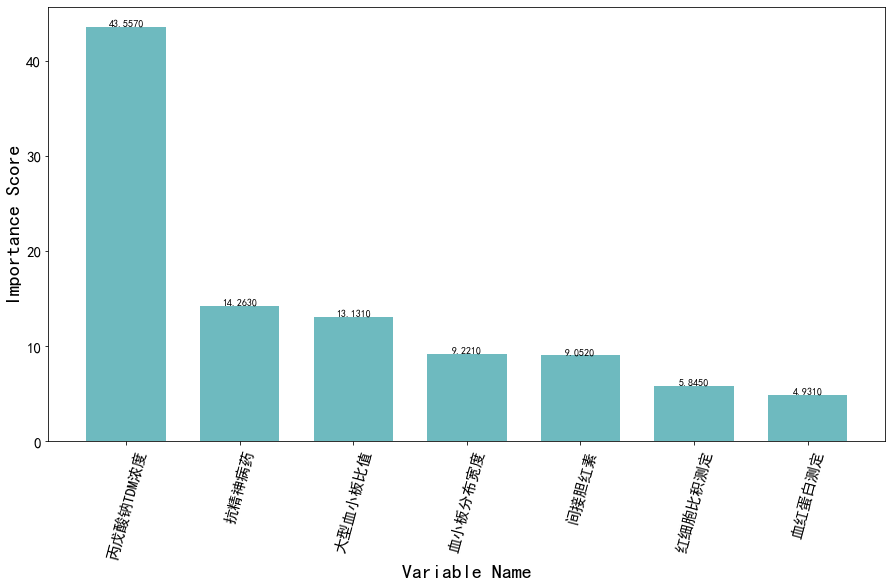

In [263]:
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  ##绘图显示中文
mpl.rcParams['axes.unicode_minus'] = False

from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import rc

names = df_importance['特征']
index = np.arange(len(names))
plt.figure(figsize=(15, 8))
plt.bar(df_importance['特征'], df_importance['重要性评分'], width=0.7,
        color=(0.42941176470588235, 0.7294117647058823, 0.7490196078431373), tick_label=names)
plt.xticks(rotation=75)
# 设置坐标刻度值的大小
plt.tick_params(labelsize=15)

plt.ylabel('Importance Score',fontsize=20)
plt.xlabel('Variable Name',fontsize=20)
for a, b in zip(index, df_importance['重要性评分']):
    plt.text(a, b + 0.002, '%.4f' % b, ha='center', va='bottom', fontsize=10)
# plt.title('重要变量得分柱形图')
# plt.show()

### 散点图

In [51]:
# 判断文件路径是否存在，如果不存在则创建该路径
def mkdir(path):
    folder = os.path.exists(path)
    if not folder:  # 判断是否存在文件夹如果不存在则创建为文件夹
        os.makedirs(path)  # makedirs 创建文件时如果路径不存在会创建这个路径

In [ ]:
# 画图
print('-----------------------画图---------------------------')
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  ##绘图显示中文
mpl.rcParams['axes.unicode_minus'] = False

from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import rc
rc('mathtext', default='regular')

# 散点图
# axis设置坐标轴的范围
# plt.axis([-20, 20, 0, 200])
# x为x轴中坐标x的值，y为y轴中坐标y的值，x与y都是长度相同的数组序列，color为点的颜色，marker为散点的形状，
# 折线图刻度调小，要不然点都堆到一块了
ax = plt.gca()
ax.set_xlim(0,10)
ax.set_ylim(0,10)
# plt.scatter(range(len(test_y)),test_y,c='r')
plt.scatter(test_y,predictions,c='b')
# 红色参照线
plt.plot(list(range(test_y.shape[0])), list(range(test_y.shape[0])),color='r')
# plt.plot(list(range(30)), list(range(30)),color='r')
plt.xlabel('Number of Events(unit)')
plt.ylabel('MTX Bone Suppression')

In [52]:
# plt.show()
# 判断图片保存路径是否存在，否则创建
jpg_path = project_path + "/jpg"
mkdir(jpg_path)
plt.savefig(jpg_path + "/他克莫司血药浓度测试集散点图v2.0.jpg", dpi=300)
plt.clf()  # 删除前面所画的图

-----------------------画图---------------------------


<Figure size 432x288 with 0 Axes>

### AUC曲线

In [56]:
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  ##绘图显示中文
mpl.rcParams['axes.unicode_minus'] = False

from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import rc

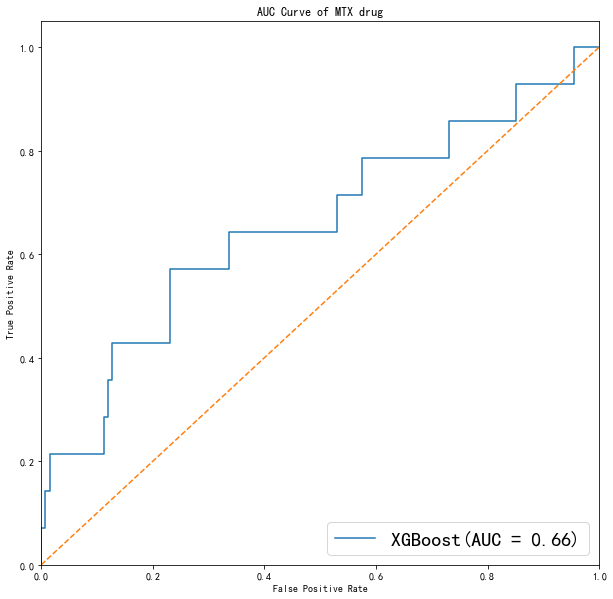

In [87]:
plt.figure(figsize=(10,10))

# plt.plot(logistic_fpr, logistic_tpr,label='LogisticRegression(AUC = %0.2f)' % logistic_auc) 
# plt.plot(rf_fpr, rf_tpr,label='RandomForest(AUC = %0.2f)' % rf_auc) 
plt.plot(xgb_fpr, xgb_tpr,label='XGBoost(AUC = %0.2f)' % xgb_auc) 
# plt.plot(ann_fpr, ann_tpr,label='ANN(AUC = %0.2f)' % ann_auc) 

plt.plot([0, 1], [0, 1],linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC Curve of MTX drug')
plt.legend(loc="lower right", fontsize=20)
plt.show()

### precision曲线

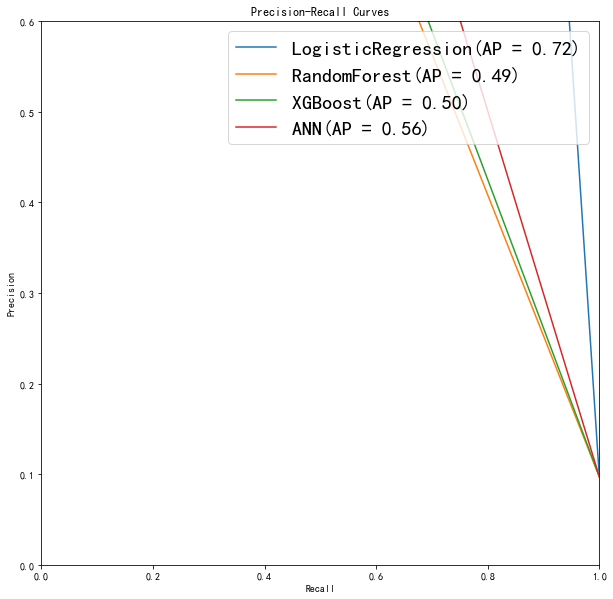

In [57]:
plt.figure(figsize=(10,10))

plt.plot(logistic_recall, logistic_precision, label='LogisticRegression(AP = %0.2f)' % logistic_ap)
plt.plot(rf_recall, rf_precision,label='RandomForest(AP = %0.2f)' % rf_ap) 
plt.plot(xgb_recall, xgb_precision,label='XGBoost(AP = %0.2f)' % xgb_ap) 
plt.plot(ann_recall, ann_precision,label='ANN(AP = %0.2f)' % ann_ap) 
         
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 0.6])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend(loc="upper right", fontsize=20)
plt.show()

### SHAP图

In [292]:
?shap.initjs() 

Object `shap.initjs() ` not found.


In [274]:
# SHAP图
from pylab import mpl
from matplotlib import pyplot as plt
mpl.rcParams['font.sans-serif'] = ['SimHei']  ##绘图显示中文
mpl.rcParams['axes.unicode_minus'] = False
from matplotlib import rc
rc('mathtext', default='regular')

import catboost,xgboost
import shap
shap.initjs()  # notebook环境下，加载用于可视化的JS代码
# CatBoost模型
cat_model=catboost.CatBoostClassifier(iterations=300, 
                                      learning_rate=0.2, 
                                      depth=6,
                                      l2_leaf_reg=2,
                                      subsample=1,
                                      loss_function='CrossEntropy',
                                      random_state=3)
cat_model.fit(tran_x_sm, tran_y_sm)

explainer = shap.TreeExplainer(cat_model)
shap_values = explainer.shap_values(tran_x_sm)  # 传入特征矩阵X，计算SHAP值
# print(shap_values)

0:	learn: 0.5188530	total: 1.29ms	remaining: 386ms
1:	learn: 0.4002966	total: 2.49ms	remaining: 371ms
2:	learn: 0.3362672	total: 3.51ms	remaining: 348ms
3:	learn: 0.2942421	total: 4.53ms	remaining: 335ms
4:	learn: 0.2661101	total: 5.49ms	remaining: 324ms
5:	learn: 0.2465209	total: 6.62ms	remaining: 324ms
6:	learn: 0.2159868	total: 7.77ms	remaining: 325ms
7:	learn: 0.1935808	total: 9.85ms	remaining: 359ms
8:	learn: 0.1837755	total: 10.8ms	remaining: 348ms
9:	learn: 0.1717959	total: 11.8ms	remaining: 343ms
10:	learn: 0.1657356	total: 12.8ms	remaining: 337ms
11:	learn: 0.1560859	total: 13.8ms	remaining: 331ms
12:	learn: 0.1486051	total: 14.8ms	remaining: 327ms
13:	learn: 0.1413621	total: 15.8ms	remaining: 323ms
14:	learn: 0.1353995	total: 16.8ms	remaining: 319ms
15:	learn: 0.1323056	total: 17.8ms	remaining: 315ms
16:	learn: 0.1285587	total: 18.8ms	remaining: 312ms
17:	learn: 0.1275749	total: 19.3ms	remaining: 302ms
18:	learn: 0.1207472	total: 20.3ms	remaining: 300ms
19:	learn: 0.1161276	t

In [275]:
tran_x_sm=tran_x_sm.rename(columns={'test_result':'丙戊酸钠TDM浓度'})

In [279]:
# summarize the effects of all the features
shap.summary_plot(shap_values, tran_x_sm,plot_size=(12,8))

TypeError: summary_legacy() got an unexpected keyword argument 'label'

In [215]:
# 保存各个变量的shape值的和
df_shap_values=pd.DataFrame(shap_values)
shap_list=[]
shap_pos_list=[]
patient_pos_list=[]
shap_neg_list=[]
patient_neg_list=[]

for j in range(df_shap_values.shape[1]):
    temp=df_shap_values.iloc[:,j]
    df_temp=pd.DataFrame(data={'values':temp})
    # 正shap值
    df_shap_pos=df_temp[df_temp['values']>=0]
    shap_pos_list.append(df_shap_pos.values.sum())
    # 正shap患者数
    patient_pos_list.append(df_shap_pos.shape[0])
    # 负shap值
    df_shap_neg=df_temp[df_temp['values']<0]
    shap_neg_list.append(df_shap_neg.values.sum())
    # 负sahp患者数
    patient_neg_list.append(df_shap_neg.shape[0])
    # shap和
    shap_sum = temp.sum()
    shap_sum = round(shap_sum, 2)
    shap_list.append(shap_sum)

df_shap = pd.DataFrame({'features':list(tran_x.columns),
                        'shap值':shap_list,
                        '正患者数':patient_pos_list,
                       'shap_pos':shap_pos_list,
                        '负患者数':patient_neg_list,
                       'shap_neg':shap_neg_list})
df_shap = df_shap.sort_values(by=['shap值'], ascending=False)
df_shap = df_shap.reset_index(drop=True)

In [216]:
df_shap_values

,0,1,2,3,4,5,6
0,-3.527783,-1.090851,-1.034997,0.087954,-0.581601,0.547757,0.369647
1,3.243098,-0.612253,0.089189,0.278665,1.630616,-0.636880,0.852253
2,1.200542,-1.393804,-1.202352,-0.446819,-2.788330,0.164188,0.415602
3,3.573060,1.419378,1.797757,0.215332,0.155131,0.424182,0.249450
4,-6.682126,-1.558103,0.115765,-0.121585,-0.726927,-1.067822,0.179475
...,...,...,...,...,...,...,...
211,3.902229,1.658195,0.385225,0.182047,-0.168127,-0.101679,-0.784153
212,3.391577,-0.386349,-0.113491,0.540007,2.227995,0.652755,0.693370
213,2.517385,2.067309,0.217926,0.622965,-0.820690,0.414863,0.943043
214,3.288341,0.994792,0.326135,0.433047,1.832412,0.381370,0.792719


In [150]:
writer = pd.ExcelWriter(project_path + '/data/result/df_27变量_shap值排序.xlsx')
df_shap.to_excel(writer)
writer.save()

### tabnet mask graph

In [299]:
from pytorch_tabnet.tab_model import TabNetClassifier, TabNetRegressor
TabNet_model = TabNetClassifier()  #TabNetRegressor()
tran_x_x, tran_x_valid, tran_y_y, tran_y_valid = train_test_split(tran_x_sm, tran_y_sm, test_size=0.1, random_state=3)

TabNet_model.fit(X_train=tran_x_x.to_numpy(),  
        y_train=tran_y_y.to_numpy(), 
        eval_set=[(tran_x_valid.to_numpy(), tran_y_valid.to_numpy())], 
        eval_name=['train'], 
        eval_metric=['auc'],
        max_epochs=100,
        patience=15,
        batch_size=128,
        virtual_batch_size=15,
        num_workers=0,
        drop_last=False)

Device used : cpu
epoch 0  | loss: 0.75528 | train_auc: 0.63881 |  0:00:00s
epoch 1  | loss: 0.59836 | train_auc: 0.92063 |  0:00:00s
epoch 2  | loss: 0.56821 | train_auc: 0.91119 |  0:00:00s
epoch 3  | loss: 0.50365 | train_auc: 0.96853 |  0:00:01s
epoch 4  | loss: 0.45512 | train_auc: 0.94126 |  0:00:01s
epoch 5  | loss: 0.41852 | train_auc: 0.92727 |  0:00:01s
epoch 6  | loss: 0.43255 | train_auc: 0.94441 |  0:00:01s
epoch 7  | loss: 0.40222 | train_auc: 0.94545 |  0:00:02s
epoch 8  | loss: 0.36702 | train_auc: 0.91993 |  0:00:02s
epoch 9  | loss: 0.35444 | train_auc: 0.96294 |  0:00:02s
epoch 10 | loss: 0.36125 | train_auc: 0.97343 |  0:00:02s
epoch 11 | loss: 0.3187  | train_auc: 0.97203 |  0:00:02s
epoch 12 | loss: 0.28125 | train_auc: 0.97098 |  0:00:03s
epoch 13 | loss: 0.2984  | train_auc: 0.98427 |  0:00:03s
epoch 14 | loss: 0.27376 | train_auc: 0.98147 |  0:00:03s
epoch 15 | loss: 0.23633 | train_auc: 0.97028 |  0:00:03s
epoch 16 | loss: 0.24844 | train_auc: 0.97063 |  0:00:

In [211]:
explain_matrix,masks=TabNet_model.explain(tran_x_sm.to_numpy())

AttributeError: 'CatBoostClassifier' object has no attribute 'explain'

NameError: name 'explain_matrix' is not defined

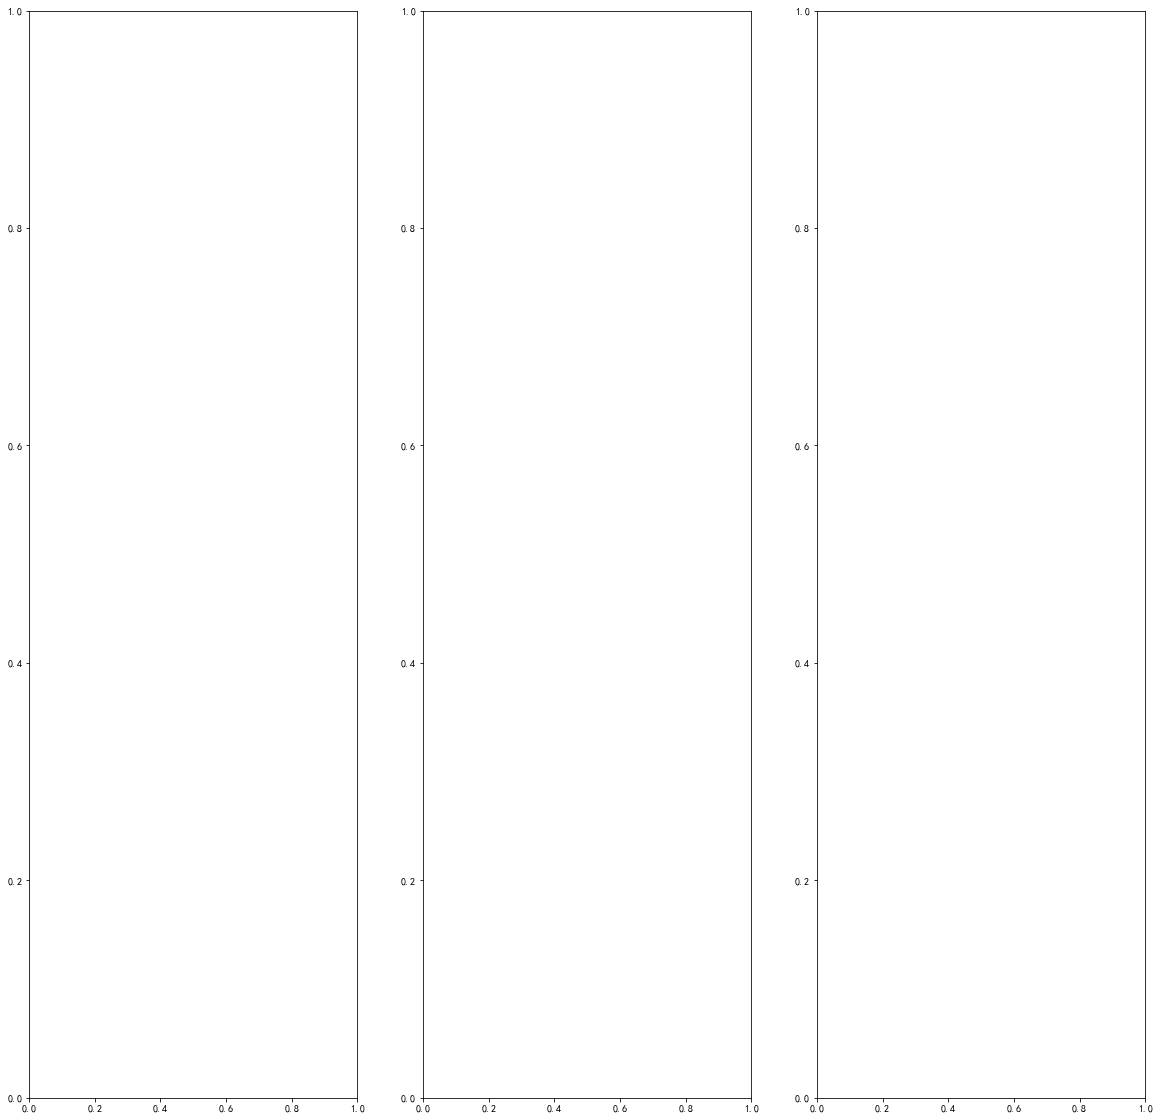

In [212]:
from matplotlib import pyplot as plt
# fig = plt.figure(figsize=(40,40))
# ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
# plt.yticks(np.arange(0, len(explain_matrix), 1.0))
# plt.xticks(np.arange(0, len(explain_matrix[0]), 1.0))
# ax.set_xticklabels(tran_x_sm.columns, rotation=75)
# plt.ylabel('Sample Number')
# plt.xlabel('Variable')
# # plt.imshow(explain_matrix[:30])  # 显示30个

fig, axs = plt.subplots(1, 3, figsize=(20,20))
for i in range(3):
    axs[i].set_yticks(np.arange(0, len(explain_matrix), 1.0))  # 设置左边间距
    axs[i].set_xticks(np.arange(0, len(explain_matrix[0]), 2.0))
    axs[i].set_ylabel('Sample Number',size=20)
    axs[i].set_xlabel('Variable',size=20)
    # 设置坐标刻度值的大小
    axs[i].tick_params(labelsize=15)
    axs[i].imshow(masks[i][:30])
    axs[i].set_title(f"mask {i}")
    axs[i].set_xticklabels(tran_x_sm.columns[::2], rotation=90)

In [351]:
tran_x_sm.columns

Index(['单核细胞绝对值', '异甘草酸镁', '谷草转氨酶(干式)', '甘草酸苷', '单核细胞百分比', '淋巴细胞百分比',
       '乳酸脱氢酶(干式)', '托烷司琼', '中性细胞绝对值', '嗜酸性细胞绝对值', '谷胱甘肽', '红细胞', '嗜酸性细胞百分比',
       '多烯磷脂酰', '嗜碱性细胞百分比', 'age', 'gender', 'RBC平均容量', 'MTX_tdm_72h',
       '白蛋白(干式)', '中性细胞百分比', 'MTX_tdm_48h', '总蛋白(干式)', '淋巴细胞绝对值', '吸烟史',
       '肌酐(干式)', 'MTX_tdm_24h', '日剂量', '长春新碱', 'RBC血红浓度'],
      dtype='object')